In [2]:
import matplotlib
%matplotlib inline
import numpy as np

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC1')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()

dataObject.setLowerBound([0.5, 0.5])
dataObject.setUpperBound([1.5, 1.5])
lowerBound = [0.3, -1.1]
upperBound = [0.35, -1.05]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC1.txt
Idx *** 0
[[0.3494713450393971, -1.0718255686982232]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09033285905735672
Best robustness -0.0029276465095827153
Final distance 0.004844885812634466
Final simulation: 3
Time taken: 0.730675220489502
Idx *** 1
[[0.3442168530228813, -1.0793268000134522]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.00817928064651164
Starting distance is very less 
Best robustness -0.01064325448088127
Final distance 0.00817928064651164
Final simul

Best robustness -0.018917146383868044
Final distance 0.006614746568573026
Final simulation: 3
Time taken: 0.7404296398162842
Idx *** 6
[[0.31781891890545283, -1.0888134554903504]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25455934601453306
Best robustness -0.0068652789340988285
Final distance 0.05114499857894873
Final simulation: 2
Time taken: 0.44603466987609863
Idx *** 7
[[0.3218904933988098, -1.060379098992528]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03802555787899501
Best robustness -0.011741614053819571
Final distance 0.03802555787899501
Fina

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.00641134189116066
Starting distance is very less 
Best robustness -0.019647065939489894
Final distance 0.00641134189116066
Final simulation: 1
Time taken: 0.0002434253692626953
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 10
[[0.31507176419426525, -1.090901367597696]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04398901795237008
*********** Initial sample falsified ************
Best robustness -0.0029744120404273655
Final distance 0.04398901795237008
Final simulation: 1
Time taken: 0.0001685619354248047
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 10
[[0.3059116934821088, -1.0552958600300675]]
/

[[0.34357471284186186, -1.0820456334481556]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.055578536420985224
Best robustness -0.009073460440220837
Final distance 0.055578536420985224
Final simulation: 2
Time taken: 0.3580663204193115
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 19
[[0.3133075912763968, -1.0816804255120354]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0353718500908755
*********** Initial sample falsified ************
Best robustness -0.0020590334237255425
Final distance 0.0353718500908755
Final simulation: 1
Time taken: 0.0003454685

[[0.30666428991407585, -1.0884198522216357]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0652605222400827
Best robustness -0.00982793014960881
Final distance 0.0652605222400827
Final simulation: 2
Time taken: 0.37720608711242676
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 21
[[0.3324753333528906, -1.059196260512565]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08260697974772956
Best robustness -0.007501537057289953
Final distance 0.02326537940776929
Final simulation: 2
Time taken: 0.35105419158935547
Idx *** 22
[[0.34246310278187964, -1.078495123

Best robustness -0.0008132171650091502
Final distance 0.039092324715451
Final simulation: 2
Time taken: 0.40583300590515137
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 24
[[0.3444376593208683, -1.0592644719309408]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.33180764596029566
Best robustness -0.006034915263694762
Final distance 0.0153706015049419
Final simulation: 3
Time taken: 0.7119061946868896
Idx *** 25
[[0.3227167831577788, -1.0565862805335449]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.30610752092737203
Best robustness -0.0127968276626637

Best robustness -0.021744543581001974
Final distance 0.017633696929267514
Final simulation: 3
Time taken: 0.6688413619995117
Idx *** 31
[[0.3168760571834932, -1.0783183360859863]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15395464436355044
Best robustness -0.009913214212377175
Final distance 0.11651923292877049
Final simulation: 2
Time taken: 0.36906933784484863
Idx *** 32
[[0.3295096210988532, -1.0530482012885165]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14093437985670249
Best robustness -0.007001984750811985
Final distance 0.029854904212084307
Fi

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17117562309722315
Best robustness -0.011565355388202359
Final distance 0.0015333033096482569
Final simulation: 3
Time taken: 0.6379876136779785
Idx *** 37
[[0.3122661739292632, -1.079490409821683]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02088773452913501
*********** Initial sample falsified ************
Best robustness -0.007834660829601103
Final distance 0.02088773452913501
Final simulation: 1
Time taken: 0.00036978721618652344
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 37
[[0.3017327302794494, -

Best robustness -0.030557626861596077
Final distance 0.10575797532723753
Final simulation: 2
Time taken: 0.34848523139953613
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 39
[[0.34230092219901265, -1.0699280618553764]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.014771507005112584
Starting distance is very less 
Best robustness -0.0099543452204931
Final distance 0.014771507005112584
Final simulation: 1
Time taken: 0.00015020370483398438
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 39
[[0.30064322434412316, -1.092441766778887]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction

Best robustness -0.004562566438541138
Final distance 0.005933085127503309
Final simulation: 2
Time taken: 0.33716416358947754
Idx *** 42
[[0.3461871128611389, -1.070677164963517]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22866377428081494
Best robustness -0.0016596125434630848
Final distance 0.0025909584665214243
Final simulation: 3
Time taken: 0.6396646499633789
Idx *** 43
[[0.33422872162302253, -1.0704204829246364]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.00988724412036043
Starting distance is very less 
Best robustness -0.008662671063401628
Fin

[[0.3104077065861721, -1.0804247662546218]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19893086812433405
Best robustness -0.010307812467896416
Final distance 0.10982445295177878
Final simulation: 2
Time taken: 0.3455197811126709
Idx *** 47
[[0.33033551538223704, -1.0722986826016683]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.015086761639136128
Starting distance is very less 
Best robustness -0.022012369059678794
Final distance 0.015086761639136128
Final simulation: 1
Time taken: 0.00016570091247558594
** either f_iter is 1 or rel_dist is 1.0 **
Idx **

Best robustness -0.026263263658131142
Final distance 0.08224917831228565
Final simulation: 2
Time taken: 0.3994605541229248
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 49
[[0.3141309956306336, -1.0537974800277214]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02659520149096624
*********** Initial sample falsified ************
Best robustness -1.4605099927234022e-06
Final distance 0.02659520149096624
Final simulation: 1
Time taken: 0.00014781951904296875
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 49
[[0.3321746421543045, -1.0558824180930513]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_fac

[[0.3084901837180736, -1.0876364927981117]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17751136300005757
Best robustness -0.010193193540031065
Final distance 0.1266278811156686
Final simulation: 2
Time taken: 0.34640049934387207
Idx *** 54
[[0.30642715885709776, -1.0874815399051956]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01908534826304028
Starting distance is very less 
Best robustness -0.015448712364931172
Final distance 0.01908534826304028
Final simulation: 1
Time taken: 0.0004737377166748047
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 5

[[0.34298209707778937, -1.0742813060012628]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12360277991250142
Best robustness -0.0044290716608224034
Final distance 0.02091725786232625
Final simulation: 2
Time taken: 0.34845542907714844
Idx *** 59
[[0.32522495028503734, -1.0557386004511864]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01822382493430687
Starting distance is very less 
Best robustness 0.08092415630698313
Final distance 0.01822382493430687
Final simulation: 1
Time taken: 0.000286102294921875
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 5

Best robustness -0.0018182271969700015
Final distance 0.04436234865397818
Final simulation: 2
Time taken: 0.3393361568450928
Idx *** 63
[[0.3031557690181571, -1.0715522821805628]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02464177371000561
*********** Initial sample falsified ************
Best robustness -0.004190103826976599
Final distance 0.02464177371000561
Final simulation: 1
Time taken: 0.00012874603271484375
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 63
[[0.31962942604317823, -1.0950633731083261]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance

[[0.3383832946059907, -1.087348619594728]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03242925473042567
Best robustness -0.0085287349789272
Final distance 0.018366425726314972
Final simulation: 2
Time taken: 0.4092569351196289
Idx *** 65
[[0.33685835017339044, -1.0743430942231136]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02792889719268835
Best robustness -0.009617841763934043
Final distance 0.02792889719268835
Final simulation: 2
Time taken: 0.3232154846191406
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 65
[[0.3467454720567504, -1.0845488440

Best robustness -0.009682634645228727
Final distance 0.1336275615386785
Final simulation: 2
Time taken: 0.3788933753967285
Idx *** 67
[[0.304584197829477, -1.0797518804709594]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.044188739730698395
Best robustness -0.02668134245029241
Final distance 0.044188739730698395
Final simulation: 2
Time taken: 0.3348057270050049
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 67
[[0.30219611683860176, -1.089667878709392]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07931066734735896
Best robustness -0.0260852117021181

[[0.3104299241500299, -1.0778557149131065]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.019020653218203003
Starting distance is very less 
Best robustness -0.007242483376305786
Final distance 0.019020653218203003
Final simulation: 1
Time taken: 0.00016450881958007812
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 68
[[0.31801461237577566, -1.075693118368663]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0036794175781698574
Starting distance is very less 
Best robustness -0.02155387341032028
Final distance 0.0036794175781698574
Final simulation: 1
Tim

[[0.32049230469261797, -1.0603408358358823]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03545902479439764
Best robustness -0.007164883078370432
Final distance 0.03545902479439764
Final simulation: 2
Time taken: 0.346637487411499
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 71
[[0.3116368602847508, -1.0794349181047247]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11412608110477143
Best robustness -0.0031178513939990604
Final distance 0.11412608110477143
Final simulation: 2
Time taken: 0.31761622428894043
** either f_iter is 1 or rel_dist is 1.0 **

Best robustness -0.02117452436470668
Final distance 0.0684183633762784
Final simulation: 2
Time taken: 0.31757616996765137
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 73
[[0.34559793868260086, -1.0785119174001614]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1022033765893407
Best robustness -0.010952074720925686
Final distance 0.01834243614670177
Final simulation: 2
Time taken: 0.3372836112976074
Idx *** 74
[[0.31427331084989485, -1.054307343354157]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.011840607451944755
Starting distance is very less 
Be

Best robustness -0.005341180884496921
Final distance 0.09640509300359439
Final simulation: 2
Time taken: 0.3063325881958008
Idx *** 77
[[0.3036408075372688, -1.0991309006199668]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07050796726114533
Best robustness -0.010489584068716251
Final distance 0.032420798949758516
Final simulation: 2
Time taken: 0.341625452041626
Idx *** 78
[[0.30764749377544853, -1.0787024782405374]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0128805175637708
Starting distance is very less 
Best robustness -0.018878397447725737
Final di

[[0.3453557806269462, -1.054256957282887]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.017101210453975172
Starting distance is very less 
Best robustness -0.010701751499645196
Final distance 0.017101210453975172
Final simulation: 1
Time taken: 0.00012135505676269531
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 79
[[0.30310946401212585, -1.0845397120208393]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09899936512953286
Best robustness -0.024514353099691466
Final distance 0.09899936512953286
Final simulation: 2
Time taken: 0.3597590923309326
** eith

Best robustness -0.0033391152084623066
Final distance 0.031624659700229055
Final simulation: 2
Time taken: 0.3423042297363281
Idx *** 82
[[0.3359907188634887, -1.0554076405964816]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07250702219919675
Best robustness -0.003354244426833075
Final distance 0.015865693905858888
Final simulation: 2
Time taken: 0.3540477752685547
Idx *** 83
[[0.30621886466839604, -1.056802499726164]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03820363561573088
Best robustness -0.019416271633181936
Final distance 0.03820363561573088
Fi

Best robustness -0.003724001966514956
Final distance 0.09692593546168159
Final simulation: 2
Time taken: 0.3710057735443115
Idx *** 88
[[0.31898935570048786, -1.0797573473408244]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
76
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.105790293511948
Best robustness -0.0014573672177069508
Final distance 0.105790293511948
Final simulation: 2
Time taken: 0.33153462409973145
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 88
[[0.321836895305458, -1.0833132418449303]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.012706127610215308
Starting distance is very less 
Bes

Best robustness -0.020933618715420044
Final distance 0.05164483177029813
Final simulation: 2
Time taken: 0.3893153667449951
Idx *** 92
[[0.33671936320665585, -1.0803000420336097]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.033901648327934804
Best robustness -0.0007002096588685225
Final distance 0.033901648327934804
Final simulation: 2
Time taken: 0.3365209102630615
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 92
[[0.318094732988867, -1.0986560227071949]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
77
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05928798069259011
Best robustness -0.025650137897

[[0.3357134610157347, -1.0741277750827372]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
76
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01774436167513616
Starting distance is very less 
Best robustness -0.003999806274673112
Final distance 0.01774436167513616
Final simulation: 1
Time taken: 0.0007255077362060547
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 93
[[0.3360186373315374, -1.0515507811280302]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02273956096424216
Best robustness -0.0014944082464375397
Final distance 0.02273956096424216
Final simulation: 2
Time taken: 0.37924885749816895
** eithe

Best robustness -0.009327243328916768
Final distance 0.011490513846812673
Final simulation: 3
Time taken: 0.7143895626068115
Idx *** 96
[[0.3235721565535215, -1.0958763198475021]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06995260670458517
Best robustness -0.0036310797434356834
Final distance 0.06995260670458517
Final simulation: 2
Time taken: 0.4193916320800781
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 96
[[0.3272768846818514, -1.0555541201894676]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17319699172398098
Best robustness -0.0007316016771

Best robustness -0.02349327096489162
Final distance 0.014800068729453811
Final simulation: 3
Time taken: 0.630255937576294
Idx *** 100
[[0.3344310523390933, -1.0869114341005792]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.059092048406387855
Best robustness -0.00837091101822679
Final distance 0.059092048406387855
Final simulation: 2
Time taken: 0.382016658782959
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 100
[[0.33494111852297714, -1.0776799734392344]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
77
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.016777351643045488
Starting distance is very less 

Best robustness -0.007087329093166617
Final distance 0.11299489730675426
Final simulation: 2
Time taken: 0.3816666603088379
Idx *** 109
[[0.34710037446387015, -1.0619042545748574]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02354781735705261
Best robustness -0.0010817618149550068
Final distance 0.02354781735705261
Final simulation: 2
Time taken: 0.3762645721435547
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 109
[[0.30988296757464395, -1.0929671844106401]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.031148777597433962
*********** Initial sample f

[[0.3490932098271033, -1.0695459428227718]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.006398691681658681
Starting distance is very less 
Best robustness -0.007083070068540864
Final distance 0.006398691681658681
Final simulation: 1
Time taken: 0.00018835067749023438
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 111
[[0.30362136940235335, -1.0712723981675634]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15433087836345996
Best robustness -0.003330106809441402
Final distance 0.13696866196258042
Final simulation: 2
Time taken: 0.40578603744506836
Idx 

Best robustness -0.0026928028702687956
Final distance 0.020324477304872947
Final simulation: 3
Time taken: 0.7682874202728271
Idx *** 115
[[0.32807564601448536, -1.073247313446676]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2894027772814307
Best robustness -0.0072118147873896365
Final distance 0.02099542740997762
Final simulation: 3
Time taken: 0.6929609775543213
Idx *** 116
[[0.3396523155105835, -1.0816609359226108]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.010737529143354463
Starting distance is very less 
Best robustness -0.010831500886492484
Fin

[[0.3038297715265564, -1.0933324840541527]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.39857878378906175
Best robustness -0.027836741346221883
Final distance 0.056130405576621904
Final simulation: 3
Time taken: 0.708460807800293
Idx *** 121
[[0.31043746600455485, -1.0685075397447905]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.015399211407120332
Starting distance is very less 
Best robustness -0.013766890407390542
Final distance 0.015399211407120332
Final simulation: 1
Time taken: 0.00014662742614746094
** either f_iter is 1 or rel_dist is 1.0 **
Idx *

Best robustness -0.012898716608999994
Final distance 0.03737666764605383
Final simulation: 2
Time taken: 0.3923985958099365
Idx *** 125
[[0.340363053285298, -1.0912560917267162]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3466058650907109
Best robustness -0.001954598678407582
Final distance 0.009760986171406598
Final simulation: 3
Time taken: 0.80899977684021
Idx *** 126
[[0.3188869171952916, -1.0752915887528605]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04326221547394884
Best robustness -0.009360266996177702
Final distance 0.04326221547394884
Final 

[[0.3149499760395956, -1.0534727985009213]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01490726060999809
Starting distance is very less 
Best robustness -0.029128556064372868
Final distance 0.01490726060999809
Final simulation: 1
Time taken: 0.0001850128173828125
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 129
[[0.3130214122799353, -1.0807790704210691]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.011030340934982926
Starting distance is very less 
Best robustness -0.015154026922071406
Final distance 0.011030340934982926
Final simulation: 1
Time t

Best robustness -0.022705295211312593
Final distance 0.01296625199800943
Final simulation: 3
Time taken: 1.119826078414917
Idx *** 132
[[0.3497011099518017, -1.0873409376278642]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11354829723982217
Best robustness -0.009000027770083463
Final distance 0.06353032195151134
Final simulation: 2
Time taken: 0.4402613639831543
Idx *** 133
[[0.3396959463089586, -1.0750987712064575]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04429708512699419
Best robustness -0.0031895251847242623
Final distance 0.012834993362826157
Fi

[[0.3309987684060397, -1.082948068474681]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.010083003396079574
Starting distance is very less 
Best robustness -0.004894570884638183
Final distance 0.010083003396079574
Final simulation: 1
Time taken: 0.00015044212341308594
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 135
[[0.3303905167896868, -1.0750230400556293]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27061153332911037
Best robustness -0.005373480576870315
Final distance 0.06279711914007152
Final simulation: 3
Time taken: 0.6950092315673828
Idx ***

Best robustness -0.02351849637952813
Final distance 0.029613304689267955
Final simulation: 2
Time taken: 0.39440035820007324
Idx *** 137
[[0.33650951991156675, -1.0892540842249983]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11673585339425077
Best robustness -0.008969609273484946
Final distance 0.005477962524394559
Final simulation: 2
Time taken: 0.37520313262939453
Idx *** 138
[[0.3392549757595839, -1.0794904383444754]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10120846964049911
Best robustness -0.004977057818153829
Final distance 0.08147022659336031

Best robustness -0.005024945283085669
Final distance 0.0792037021877359
Final simulation: 2
Time taken: 0.39272475242614746
Idx *** 141
[[0.32981342553108234, -1.0755703132229215]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12988194384161642
Best robustness -0.00021413113188328836
Final distance 0.10416379156626197
Final simulation: 2
Time taken: 0.3751251697540283
Idx *** 142
[[0.33908909967538375, -1.0977455589056817]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17617464058362725
Best robustness -0.016970217395392728
Final distance 0.03228254661608790

Best robustness -0.007423909042044263
Final distance 0.011653778954563692
Final simulation: 3
Time taken: 0.7121295928955078
Idx *** 145
[[0.34217372551534236, -1.0760863750749703]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.018379977047428983
Starting distance is very less 
Best robustness -0.024423621462425715
Final distance 0.018379977047428983
Final simulation: 1
Time taken: 0.00013327598571777344
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 145
[[0.3292421968051482, -1.0848875739278585]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0125501645

[[0.3296516493703534, -1.0955832943112194]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.018860199986579097
Starting distance is very less 
Best robustness -0.0015853636076204602
Final distance 0.018860199986579097
Final simulation: 1
Time taken: 0.0001468658447265625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 148
[[0.3070636068992085, -1.0820682368737202]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20487837191760278
Best robustness -0.015940500957919712
Final distance 0.04603643311442481
Final simulation: 2
Time taken: 0.37584495544433594
Idx *

[[0.3224114841578376, -1.0729111824057809]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03487534584955107
*********** Initial sample falsified ************
Best robustness -0.0003738145929756964
Final distance 0.03487534584955107
Final simulation: 1
Time taken: 0.0003299713134765625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 150
[[0.33463055033078726, -1.0981896367966666]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.012988447416091653
Starting distance is very less 
Best robustness -0.002451190142653381
Final distance 0.012988447416091653
Final 

[[0.3261625511307645, -1.0794127456823293]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4568554471334748
Best robustness -0.006770188893674256
Final distance 0.023238247929778796
Final simulation: 3
Time taken: 0.920527458190918
Idx *** 155
[[0.32889144368404427, -1.0839271637969812]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.028378178457422847
*********** Initial sample falsified ************
Best robustness -0.006060667593707159
Final distance 0.028378178457422847
Final simulation: 1
Time taken: 0.0002079010009765625
** either f_iter is 1 or rel_dist

Best robustness -0.01556425898499425
Final distance 0.01930394546737071
Final simulation: 2
Time taken: 0.3396720886230469
Idx *** 156
[[0.30373596589812185, -1.0618140806792475]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.016074726824509767
Starting distance is very less 
Best robustness -0.005999542735057872
Final distance 0.016074726824509767
Final simulation: 1
Time taken: 0.00015735626220703125
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 156
[[0.3471852176745197, -1.081137649939739]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0679773831950

[[0.3478021375957102, -1.0739476814474576]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.015817340369435925
Starting distance is very less 
Best robustness -0.0077183486729697215
Final distance 0.015817340369435925
Final simulation: 1
Time taken: 0.00017595291137695312
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 161
[[0.34591908115861764, -1.0949991484410317]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5113068414283505
Best robustness -0.006470929620440824
Final distance 0.027360371462696362
Final simulation: 3
Time taken: 0.7256147861480713
Idx 

Best robustness -0.02347852507256104
Final distance 0.009905522970411406
Final simulation: 3
Time taken: 0.7757596969604492
Idx *** 164
[[0.3153540389900512, -1.0741734036444455]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01398986819397062
Starting distance is very less 
Best robustness -0.007982271127175533
Final distance 0.01398986819397062
Final simulation: 1
Time taken: 0.00021314620971679688
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 164
[[0.3289852607457408, -1.0944352448635941]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09158825836002

Best robustness -0.010294257095931514
Final distance 0.03486975299068259
Final simulation: 2
Time taken: 0.40386509895324707
Idx *** 167
[[0.3468283993660401, -1.0637146915563036]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.008991564969472324
Starting distance is very less 
Best robustness -0.002628536691782757
Final distance 0.008991564969472324
Final simulation: 1
Time taken: 0.00015091896057128906
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 167
[[0.34374956544227897, -1.0820181948610685]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0168882318

Best robustness -0.007136684049701747
Final distance 0.009706345981586323
Final simulation: 2
Time taken: 0.3657715320587158
Idx *** 171
[[0.3419024113584674, -1.0599749001724]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
76
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.005637090136444394
Starting distance is very less 
Best robustness -0.010683223558802024
Final distance 0.005637090136444394
Final simulation: 1
Time taken: 0.0002753734588623047
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 171
[[0.3468243734991817, -1.089953664078158]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0568758310525714

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23026622785734344
Best robustness -0.004041415407335214
Final distance 0.08905018784465188
Final simulation: 2
Time taken: 0.37804436683654785
Idx *** 175
[[0.3464280682902142, -1.0782751645054975]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.009015041319739162
Starting distance is very less 
Best robustness -0.0004767930623582606
Final distance 0.009015041319739162
Final simulation: 1
Time taken: 0.00029850006103515625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 175
[[0.3368493932151971, -1.08585098186

Best robustness -0.0049803819607810995
Final distance 0.09368247362669682
Final simulation: 2
Time taken: 0.37464213371276855
Idx *** 179
[[0.3364156115391122, -1.068395500987245]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.004011659156153055
Starting distance is very less 
Best robustness -0.005344678374388734
Final distance 0.004011659156153055
Final simulation: 1
Time taken: 0.0002460479736328125
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 179
[[0.31431310346956604, -1.091438782875529]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.088433544502

Best robustness -0.002747400866782046
Final distance 0.04607623733833302
Final simulation: 2
Time taken: 0.3586766719818115
Idx *** 181
[[0.30514633558383475, -1.0540087768087882]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04398577452051553
*********** Initial sample falsified ************
Best robustness -0.013780945638793118
Final distance 0.04398577452051553
Final simulation: 1
Time taken: 0.0003502368927001953
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 181
[[0.31631052350771066, -1.0689335711284442]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distanc

[[0.33949517074317237, -1.094568590027303]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.027731000785061927
*********** Initial sample falsified ************
Best robustness -0.002221489476828875
Final distance 0.027731000785061927
Final simulation: 1
Time taken: 0.0001666545867919922
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 185
[[0.3212982583644309, -1.0879341124516695]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3776598325325319
Best robustness -0.020542777492034592
Final distance 0.008725023999499431
Final simulation: 3
Time taken: 0.686574

Best robustness -0.015510807994637554
Final distance 0.07720945448130861
Final simulation: 2
Time taken: 0.39104747772216797
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 188
[[0.3298450589059652, -1.0854693946850462]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08527591010591438
Best robustness -0.011440405820786703
Final distance 0.01003813193748151
Final simulation: 2
Time taken: 0.3802211284637451
Idx *** 189
[[0.33764069055283497, -1.0561754204227927]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04511207082637198
Best robustness -0.00801540063

Best robustness -0.01017465721297861
Final distance 0.07524349035019262
Final simulation: 2
Time taken: 0.3320305347442627
Idx *** 192
[[0.31300110859587366, -1.053142924194572]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.079785083110387
Best robustness -0.0016737832582198742
Final distance 0.003437019457835366
Final simulation: 2
Time taken: 0.3959770202636719
Idx *** 193
[[0.3215981029257587, -1.0743959054470384]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08658790248168038
Best robustness -0.015165708170156167
Final distance 0.08658790248168038
Fina

Best robustness -0.010154630629161276
Final distance 0.027441843042472474
Final simulation: 2
Time taken: 0.3347165584564209
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 194
[[0.33321270386011664, -1.0935648453603612]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
77
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.006072598747302816
Starting distance is very less 
Best robustness -0.013789007288242783
Final distance 0.006072598747302816
Final simulation: 1
Time taken: 0.000141143798828125
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 194
[[0.3463892717106455, -1.0626810202348183]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correcti

Best robustness -0.006229832579313144
Final distance 0.019213202787171427
Final simulation: 3
Time taken: 0.6114606857299805
Idx *** 198
[[0.3288058439520535, -1.087691581545559]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.010161437637551698
Starting distance is very less 
Best robustness -0.025655787552432696
Final distance 0.010161437637551698
Final simulation: 1
Time taken: 0.00013256072998046875
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 198
[[0.31590603877260803, -1.0896031944559954]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.28819649844

[[0.3181243419837551, -1.050065848794061]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15058837710952905
Best robustness -0.0034479835493324007
Final distance 0.004920851952479801
Final simulation: 3
Time taken: 0.6031363010406494
Idx *** 201
[[0.3274614457854497, -1.0731527637597666]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.47006958726359327
Best robustness -0.006081851031800867
Final distance 0.022784480764693072
Final simulation: 3
Time taken: 0.631476879119873
Idx *** 202
[[0.32947974742621744, -1.0767844071159405]]
/home/manishg/Research/NExG//e

[[0.3070275825424766, -1.0512134293713322]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3430763221365264
Best robustness -0.019350605716309532
Final distance 0.025188573209811927
Final simulation: 3
Time taken: 0.6126906871795654
Idx *** 204
[[0.34010988255162444, -1.0939087612729586]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22955857758605253
Best robustness -0.00558933838157738
Final distance 0.019767740747582932
Final simulation: 2
Time taken: 0.33359599113464355
Idx *** 205
[[0.3304405451297205, -1.0888503124783158]]
/home/manishg/Research/NExG//e

Best robustness -0.011144555162249437
Final distance 0.10921457183299535
Final simulation: 2
Time taken: 0.35874366760253906
Idx *** 207
[[0.3240557365872631, -1.0918224188590204]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08078671192701209
Best robustness -0.016822301211557367
Final distance 0.04445451405960843
Final simulation: 2
Time taken: 0.8274874687194824
Idx *** 208
[[0.31314520219330594, -1.087161843103427]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17593822737081216
Best robustness -0.022733741563876142
Final distance 0.014140979014647902
F

Best robustness -0.012063858440350017
Final distance 0.07536308760239795
Final simulation: 2
Time taken: 0.3523416519165039
Idx *** 211
[[0.30164184887208734, -1.0590070940476657]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.011273712841509164
Starting distance is very less 
Best robustness -0.016040858495822374
Final distance 0.011273712841509164
Final simulation: 1
Time taken: 0.00012636184692382812
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 211
[[0.33296714126055144, -1.0778521861383716]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0489758430

[[0.3374387260059404, -1.0755295858328207]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
76
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01577848841619858
Starting distance is very less 
Best robustness -0.004423934958415421
Final distance 0.01577848841619858
Final simulation: 1
Time taken: 0.000217437744140625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 212
[[0.32174491029902635, -1.0859921061803417]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02806187884488261
*********** Initial sample falsified ************
Best robustness -0.002881454426995278
Final distance 0.02806187884488261
Final simu

[[0.30559563129928363, -1.0743969068549435]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.033680456469336886
*********** Initial sample falsified ************
Best robustness -0.00020987832864183265
Final distance 0.033680456469336886
Final simulation: 1
Time taken: 0.00015091896057128906
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 213
[[0.3256244341456399, -1.0723384000438283]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.038370386077222735
Best robustness -0.002935077270771358
Final distance 0.038370386077222735
Final simulation: 2
Time taken: 0.

[[0.3081821975793988, -1.072296798479999]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
77
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.026853219185160457
*********** Initial sample falsified ************
Best robustness -0.004997042672896468
Final distance 0.026853219185160457
Final simulation: 1
Time taken: 0.00016164779663085938
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 217
[[0.3126033001859272, -1.0717789939347786]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1300708731321756
Best robustness -0.009895693081623524
Final distance 0.0903317324668834
Final simulation: 2
Time taken: 0.33711695

Best robustness -0.019857284736957304
Final distance 0.04363674785770046
Final simulation: 3
Time taken: 0.7027721405029297
Idx *** 221
[[0.3445477581006329, -1.0891892786639512]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.010777748849298845
Starting distance is very less 
Best robustness -0.015164414821186467
Final distance 0.010777748849298845
Final simulation: 1
Time taken: 0.0010497570037841797
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 221
[[0.3278966615856594, -1.0998440880101474]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0814057895541

Best robustness -0.011259062707101586
Final distance 0.05535879786812766
Final simulation: 2
Time taken: 0.3606119155883789
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 223
[[0.31417483756746906, -1.0680193216485896]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.005592299855881116
Starting distance is very less 
Best robustness -0.022332829017610023
Final distance 0.005592299855881116
Final simulation: 1
Time taken: 0.0002593994140625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 223
[[0.3058607135927453, -1.0900818998498416]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction 

[[0.31995782307407045, -1.0980533139093047]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.025880967273765425
*********** Initial sample falsified ************
Best robustness -0.007529843934020342
Final distance 0.025880967273765425
Final simulation: 1
Time taken: 0.00017881393432617188
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 224
[[0.30331562657963695, -1.0871796060859305]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.029343267907117495
*********** Initial sample falsified ************
Best robustness -0.007098122576796206
Final distance 0.0293

[[0.3213132287303414, -1.0733878046246295]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4194438951229845
Best robustness -0.017533996654935546
Final distance 0.013954834325488085
Final simulation: 3
Time taken: 0.7127518653869629
Idx *** 228
[[0.3443795310140201, -1.0981023506983523]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21250470974465424
Best robustness -0.010453871053327957
Final distance 0.03948857151277906
Final simulation: 2
Time taken: 0.3725261688232422
Idx *** 229
[[0.320577057834322, -1.0918959919943914]]
/home/manishg/Research/NExG//eval

Best robustness -0.01191482051654913
Final distance 0.034500895123862924
Final simulation: 2
Time taken: 0.3696939945220947
Idx *** 233
[[0.34003343670610886, -1.074234799477777]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09266249063367338
Best robustness -0.008336566818371693
Final distance 0.017257854493109598
Final simulation: 2
Time taken: 0.3440980911254883
Idx *** 234
[[0.34062340830467674, -1.074560811921562]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02416306282131866
*********** Initial sample falsified ************
Best robustness -0.023261

Best robustness -0.017024982142910705
Final distance 0.011051315590800427
Final simulation: 2
Time taken: 0.3615391254425049
Idx *** 237
[[0.34315298981263304, -1.0995777176487864]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17032820253253012
Best robustness -0.007208297018975907
Final distance 0.023909911574026593
Final simulation: 2
Time taken: 0.3755483627319336
Idx *** 238
[[0.322496436479374, -1.0875532552945881]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1855121548510603
Best robustness -0.008467701372688874
Final distance 0.03532985507614228
Fi

[[0.334003024288605, -1.0978828873528392]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0026852443797833903
Starting distance is very less 
Best robustness -0.018519785938355182
Final distance 0.0026852443797833903
Final simulation: 1
Time taken: 0.0002994537353515625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 242
[[0.34780050728276124, -1.087711757765679]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.019595703925656318
Starting distance is very less 
Best robustness 0.11338326267927235
Final distance 0.019595703925656318
Final simulation: 1
Time 

[[0.3495888235868119, -1.077798924333758]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03419219957116231
Best robustness -0.009100595849942883
Final distance 0.03419219957116231
Final simulation: 2
Time taken: 0.3928384780883789
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 248
[[0.34853227487535376, -1.08506602731342]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC1_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.36220785410914513
Best robustness -0.004971260849303882
Final distance 0.009773181866961576
Final simulation: 3
Time taken: 0.6804630756378174
Idx *** 249
[[0.30071817887025803, -1.0635744

In [6]:
import matplotlib
%matplotlib inline
import numpy as np

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC2')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

dataObject.setLowerBound([0.8, 0.9])
dataObject.setUpperBound([1.2, 1.2])
lowerBound = [1.5, 0.2]
upperBound = [1.55, 0.25]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC2.txt
Idx *** 0
[[1.5253007828816978, 0.20123229020941857]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.016549806415384484
Starting distance is very less 
Best robustness -0.007196960790486762
Final distance 0.016549806415384484
Final simulation: 1
Time taken: 0.0005028247833251953
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 0
[[1.537909141755747, 0.21009378088019087]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22227805959387598
Best robustness -0.00129628020872521

[[1.5418962077717866, 0.22905141246551622]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0943664535953269
Best robustness -0.0026598213525308445
Final distance 0.007884500200778027
Final simulation: 2
Time taken: 0.8040518760681152
Idx *** 7
[[1.521994331827525, 0.21928345894214774]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.015170193944710857
Starting distance is very less 
Best robustness -0.005945311784689267
Final distance 0.015170193944710857
Final simulation: 1
Time taken: 0.00031304359436035156
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 

[[1.5198881698090692, 0.22985673966387624]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07536832067119174
Best robustness -0.004364854959221842
Final distance 0.006883453825651194
Final simulation: 2
Time taken: 0.6834969520568848
Idx *** 12
[[1.5478591005836349, 0.22799281732933402]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.034382156392681155
Best robustness -0.0019605749738722533
Final distance 0.006308883795163455
Final simulation: 5
Time taken: 2.8567264080047607
Idx *** 13
[[1.5296795381188908, 0.23425829639642023]]
/home/manishg/Research/NExG//e

[[1.5101274231059683, 0.24092123957259312]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27588069010522326
Best robustness -0.004835656100458385
Final distance 0.028105530427894234
Final simulation: 2
Time taken: 0.7345521450042725
Idx *** 20
[[1.5338652150823715, 0.21093256324402368]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11992277511247644
Best robustness -0.009375318755830947
Final distance 0.008267768396117243
Final simulation: 2
Time taken: 0.6371548175811768
Idx *** 21
[[1.542887297160045, 0.2004574270937888]]
/home/manishg/Research/NExG//eval-

Best robustness -0.006228062393875106
Final distance 0.004639128980235925
Final simulation: 3
Time taken: 1.3513579368591309
Idx *** 27
[[1.5355678587452413, 0.21671385890365963]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14671634503150793
Best robustness -0.002351633807045117
Final distance 0.010932218646942061
Final simulation: 2
Time taken: 0.7804646492004395
Idx *** 28
[[1.5211046445405405, 0.245471857627636]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2222119562632326
Best robustness -0.013535894914235375
Final distance 0.013550288163973084
Final

[[1.5433688930240679, 0.22158237820373292]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01594731371831512
Starting distance is very less 
Best robustness 0.06001406359024175
Final distance 0.01594731371831512
Final simulation: 1
Time taken: 0.00063323974609375
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 33
[[1.5167362562612106, 0.24257922592670852]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16017366534342398
Best robustness -0.00140429208589829
Final distance 0.017258606724171868
Final simulation: 2
Time taken: 0.8247153759002686
Idx *** 34
[[1

Best robustness -0.0011867480176789846
Final distance 0.006509576232852252
Final simulation: 2
Time taken: 0.8195312023162842
Idx *** 39
[[1.515735359746155, 0.2007094335166475]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06384614610989503
Best robustness -0.00032658408584973486
Final distance 0.010375715466455573
Final simulation: 2
Time taken: 0.7853069305419922
Idx *** 40
[[1.531407648527845, 0.21762454759366856]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03961900760648125
*********** Initial sample falsified ************
Best robustness -0.0021115

Best robustness -0.001192208704087927
Final distance 0.00927826079876649
Final simulation: 2
Time taken: 0.6975481510162354
Idx *** 47
[[1.5204192117768651, 0.20128327195242693]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2006002629125188
Best robustness -0.013740581822685755
Final distance 0.013727095025052437
Final simulation: 2
Time taken: 0.7771062850952148
Idx *** 48
[[1.5464231457001096, 0.24135415864173235]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.021353430991949716
Best robustness -0.0013149300094243976
Final distance 0.002350606620922347
Fi

Best robustness -0.01337054570312643
Final distance 0.01603203366878945
Final simulation: 2
Time taken: 0.7122035026550293
Idx *** 54
[[1.52840203790289, 0.21066301707539295]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17705491196421252
Best robustness -0.005225606118170828
Final distance 0.012421068074640806
Final simulation: 2
Time taken: 0.6604657173156738
Idx *** 55
[[1.5356152386294966, 0.20273548902169133]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1104219071730234
Best robustness -0.0065668024890626064
Final distance 0.024367316093268705
Final 

Best robustness -0.008683326293955712
Final distance 0.004779418120502263
Final simulation: 2
Time taken: 0.6745734214782715
Idx *** 61
[[1.536662650618858, 0.2034606783514706]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19728617923641123
Best robustness -0.00026514049037854037
Final distance 0.004725329018531664
Final simulation: 3
Time taken: 1.3494172096252441
Idx *** 62
[[1.5009744669601663, 0.2145795725604783]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09559116794319428
Best robustness -0.010273220965860308
Final distance 0.01566786405586638
Fina

Best robustness -0.004521988483301431
Final distance 0.0035131370220905325
Final simulation: 3
Time taken: 1.3546533584594727
Idx *** 69
[[1.5429762994203795, 0.21584643879818713]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.037511586903376
*********** Initial sample falsified ************
Best robustness -0.009994187249457803
Final distance 0.037511586903376
Final simulation: 1
Time taken: 0.0001552104949951172
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 69
[[1.5122916089267917, 0.21676023862559393]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1

Best robustness -0.002040883359006873
Final distance 0.01701441358026223
Final simulation: 3
Time taken: 1.3813247680664062
Idx *** 78
[[1.5187756506015613, 0.22336485838353978]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05727897274713223
Best robustness -0.010809285437607424
Final distance 0.004983154763340418
Final simulation: 2
Time taken: 0.7249040603637695
Idx *** 79
[[1.5231875176037788, 0.23827534689247873]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11956358370482484
Best robustness -0.00955166225855597
Final distance 0.008929543104669107
Fina

Best robustness -0.008913472248428256
Final distance 0.013112087596689193
Final simulation: 2
Time taken: 0.7109560966491699
Idx *** 84
[[1.5455874199309918, 0.22061798537393204]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.055484328816830686
Best robustness -0.0013518419651888935
Final distance 0.0029633181026994665
Final simulation: 2
Time taken: 0.6918110847473145
Idx *** 85
[[1.5347957581908567, 0.22839298565457322]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18942926597852902
Best robustness -0.001538875963489339
Final distance 0.016580143859206316

Best robustness -0.0023648072451172286
Final distance 0.01508451264396087
Final simulation: 2
Time taken: 0.7078132629394531
Idx *** 91
[[1.5230313649081164, 0.2329742599966261]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0360660645370583
Best robustness -0.004857034806843186
Final distance 0.0025335728343130522
Final simulation: 2
Time taken: 0.6498055458068848
Idx *** 92
[[1.5138531734845126, 0.2365978760316802]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12906260964498714
Best robustness -0.0010885264810356066
Final distance 0.011008481716810039
Fin

[[1.533734136979239, 0.20288731709847865]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21646500404258814
Best robustness -0.0031336226279026214
Final distance 0.01992474243863786
Final simulation: 2
Time taken: 0.6856086254119873
Idx *** 98
[[1.522620510023285, 0.23641632845434263]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14001274311198977
Best robustness -0.009384504263679871
Final distance 0.010407249220648408
Final simulation: 2
Time taken: 0.6787676811218262
Idx *** 99
[[1.5228767964713814, 0.20938610596122492]]
/home/manishg/Research/NExG//eval-

Best robustness -0.0012962021986755168
Final distance 0.028659381552071317
Final simulation: 2
Time taken: 0.702256441116333
Idx *** 104
[[1.5228594142246599, 0.20978303748913857]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3016836290148581
Best robustness -0.005552493883277387
Final distance 0.026103664312393648
Final simulation: 2
Time taken: 0.7464485168457031
Idx *** 105
[[1.535572023359906, 0.22031189928537775]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17275392088643593
Best robustness -0.001938383557453266
Final distance 0.001249533058966969
Fi

Best robustness -0.0025720080908588905
Final distance 0.0009741724496072346
Final simulation: 3
Time taken: 1.3564403057098389
Idx *** 111
[[1.5270222861923521, 0.2371688587881414]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07818705825088229
Best robustness -0.011403125267490988
Final distance 0.005468880870828445
Final simulation: 2
Time taken: 0.785719633102417
Idx *** 112
[[1.5470596823062484, 0.2216594689572945]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06292655490788883
Best robustness -0.0026422768634455363
Final distance 0.006941560318616496


Best robustness -0.005638475618102934
Final distance 0.008076061986868542
Final simulation: 3
Time taken: 1.414980411529541
Idx *** 119
[[1.5183418552639372, 0.2077587955855107]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09509586979542028
Best robustness -0.00224141321425822
Final distance 0.03168849423248327
Final simulation: 2
Time taken: 1.062556266784668
Idx *** 120
[[1.5317149645737664, 0.22671965129579957]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04719675415230016
Best robustness -0.013724828770091346
Final distance 0.010454265520925926
Final

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20324884881296018
Best robustness -0.012408215022940677
Final distance 0.015926373513940488
Final simulation: 2
Time taken: 0.7347564697265625
Idx *** 128
[[1.503651166048881, 0.23748705378938154]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14034849512640332
Best robustness -0.011764359379503514
Final distance 0.006946931292444339
Final simulation: 2
Time taken: 0.7253434658050537
Idx *** 129
[[1.5418977050512959, 0.22585433615892903]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherB

Best robustness -0.006436852864010523
Final distance 0.013278088869043742
Final simulation: 2
Time taken: 0.6659612655639648
Idx *** 135
[[1.5494281621688786, 0.23001031444809103]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.016870210143270708
Starting distance is very less 
Best robustness -0.0069366072538702694
Final distance 0.016870210143270708
Final simulation: 1
Time taken: 0.00014829635620117188
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 135
[[1.545130598510491, 0.2228410530446029]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.010775912905

Best robustness -0.005633123772107229
Final distance 0.024522447132405763
Final simulation: 2
Time taken: 0.7307207584381104
Idx *** 141
[[1.5410785041336736, 0.2207515208119287]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.027622183783299635
*********** Initial sample falsified ************
Best robustness -0.0029991856444081533
Final distance 0.027622183783299635
Final simulation: 1
Time taken: 0.00019741058349609375
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 141
[[1.5394494363940592, 0.23488711301541157]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dista

Best robustness -0.0133975412045792
Final distance 0.005696791808788293
Final simulation: 2
Time taken: 0.6951234340667725
Idx *** 148
[[1.5006743043301392, 0.23338414916878605]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2093304650228105
Best robustness -0.012335254301884424
Final distance 0.022080085918398117
Final simulation: 2
Time taken: 0.7305097579956055
Idx *** 149
[[1.53565852755886, 0.21235513539981285]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15886896857251592
Best robustness -0.0020918444840641315
Final distance 0.01173258074203989
Final

Best robustness -0.00804502883133107
Final distance 0.013693981114388413
Final simulation: 2
Time taken: 0.7083182334899902
Idx *** 155
[[1.5366284395206748, 0.22772844114704419]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23703609411922072
Best robustness -0.007965480746108422
Final distance 0.0023135296076250414
Final simulation: 3
Time taken: 1.3428399562835693
Idx *** 156
[[1.5184781944279322, 0.21867384174723684]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27643523650596735
Best robustness -0.006245276139885014
Final distance 0.02802994173711428
F

Best robustness -0.004956501097912902
Final distance 0.008623256106488515
Final simulation: 2
Time taken: 0.702742338180542
Idx *** 163
[[1.5445696119238725, 0.2223101094353035]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14793752835116913
Best robustness -0.0005664296608109132
Final distance 0.0011670500766970068
Final simulation: 3
Time taken: 1.4697704315185547
Idx *** 164
[[1.531121323768635, 0.20011165873467374]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2693523916349085
Best robustness -0.004374919438664249
Final distance 0.017216095621520842
Fi

Best robustness -0.00962448175492181
Final distance 0.0012444510199983922
Final simulation: 2
Time taken: 0.7079713344573975
Idx *** 170
[[1.5019818368885345, 0.2425489652272523]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06708576605692736
Best robustness -0.005910064274351923
Final distance 0.004187590230894558
Final simulation: 2
Time taken: 1.0755326747894287
Idx *** 171
[[1.5119184042064426, 0.21650744222430868]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19969505727920997
Best robustness -0.0064283603409245604
Final distance 0.01759366376567351
F

Best robustness -0.004925335373392736
Final distance 0.007114143086246162
Final simulation: 2
Time taken: 0.6553106307983398
Idx *** 177
[[1.5401542506026464, 0.21583173692658544]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17774607568182993
Best robustness -0.0038515537358534413
Final distance 0.00269138837110869
Final simulation: 3
Time taken: 1.8890819549560547
Idx *** 178
[[1.5170519472031743, 0.20157231875770307]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20005075317181098
Best robustness -0.002405512312008029
Final distance 0.032573685478493354


Best robustness -0.008489912284818102
Final distance 0.006557427636613127
Final simulation: 3
Time taken: 1.8191280364990234
Idx *** 184
[[1.5327553134285696, 0.23912553740987702]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.029042333753991158
Best robustness -0.004674841771504373
Final distance 0.008715271476292778
Final simulation: 2
Time taken: 0.6564514636993408
Idx *** 185
[[1.5392188540362974, 0.2047427646536946]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22768254831517082
Best robustness -4.377034977043337e-05
Final distance 0.018990479186796468

Best robustness -0.0002820881183362989
Final distance 0.011119966321638784
Final simulation: 2
Time taken: 0.7238674163818359
Idx *** 191
[[1.5334031755574984, 0.22622741401477434]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1548026716452791
Best robustness -0.005807447089805962
Final distance 0.013271823421979627
Final simulation: 2
Time taken: 0.7300777435302734
Idx *** 192
[[1.5003252456485825, 0.21315631684157055]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.31560863477589246
Best robustness -0.005400358003159106
Final distance 0.02858660172097525
F

Best robustness -7.331086663708852e-05
Final distance 0.00032020397642250803
Final simulation: 4
Time taken: 2.3865365982055664
Idx *** 197
[[1.5033338505046487, 0.24091007388783556]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.060406201562227396
Best robustness -0.009664309671754606
Final distance 0.003826072728901568
Final simulation: 2
Time taken: 0.7425441741943359
Idx *** 198
[[1.5245952951411181, 0.241749965915265]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0800046105029773
Best robustness -0.005590535180201972
Final distance 0.009237931101497666

Best robustness -0.008715673488164516
Final distance 0.006429021939595441
Final simulation: 2
Time taken: 0.6980888843536377
Idx *** 206
[[1.543587893402481, 0.20978631834022668]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04949203110631967
*********** Initial sample falsified ************
Best robustness -0.004767319649745638
Final distance 0.04949203110631967
Final simulation: 1
Time taken: 0.0001914501190185547
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 206
[[1.5030750461661446, 0.21680514331122241]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance:

Best robustness -0.0007649249098228283
Final distance 0.008911332632874877
Final simulation: 2
Time taken: 0.765965461730957
Idx *** 212
[[1.5369450683885615, 0.24679806528815978]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2466735184067026
Best robustness -0.003274625376893575
Final distance 0.001472570454291638
Final simulation: 3
Time taken: 1.3281736373901367
Idx *** 213
[[1.5489804977536918, 0.2350492973990433]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.027281982877246178
*********** Initial sample falsified ************
Best robustness -0.003220

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3067882788881844
Best robustness -0.0016013827536403014
Final distance 0.002691284369031083
Final simulation: 3
Time taken: 1.4803321361541748
Idx *** 221
[[1.509881675632212, 0.23624109306998556]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.245074532034788
Best robustness -0.008961488616112206
Final distance 0.025819231758994917
Final simulation: 2
Time taken: 0.669689416885376
Idx *** 222
[[1.510453207853578, 0.21280143128184875]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBench

Best robustness -0.012493272293759489
Final distance 0.016856406287715963
Final simulation: 2
Time taken: 0.6658411026000977
Idx *** 226
[[1.509190505541796, 0.20154779125808092]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.33825269059717994
Best robustness -0.007674672196640531
Final distance 0.023943514393749428
Final simulation: 2
Time taken: 0.6389012336730957
Idx *** 227
[[1.5006093815965726, 0.22927814441983718]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.014719507916960861
Starting distance is very less 
Best robustness -0.006326811535391719
Fina

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.027068403887847266
Best robustness -0.008801384264325723
Final distance 0.003102148612350265
Final simulation: 2
Time taken: 0.7461919784545898
Idx *** 235
[[1.5010035440852645, 0.22929448862897883]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17676603084457207
Best robustness -0.002180815046660678
Final distance 0.018084823067692178
Final simulation: 2
Time taken: 0.7286090850830078
Idx *** 236
[[1.5056670158623242, 0.23285703947332387]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_Othe

Best robustness -0.005650832991068944
Final distance 0.01697002675112847
Final simulation: 2
Time taken: 0.7074542045593262
Idx *** 241
[[1.53700153500726, 0.24749729924860334]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14940996172032295
Best robustness -0.00215956276678983
Final distance 0.0013560625531451526
Final simulation: 3
Time taken: 1.3442370891571045
Idx *** 242
[[1.503235411949724, 0.2447957478057309]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12536898792067488
Best robustness -0.003270305161910736
Final distance 0.013063061990515941
Final

Best robustness -0.004843935488665574
Final distance 0.007577451583566837
Final simulation: 2
Time taken: 0.6033661365509033
Idx *** 246
[[1.5432612247129451, 0.20472751708063108]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.31293576620641383
Best robustness -0.006816399273320367
Final distance 0.0040901071863584494
Final simulation: 3
Time taken: 1.633650302886963
Idx *** 247
[[1.5098205428021556, 0.2332240684959462]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1815374777161829
Best robustness -0.011857164118696611
Final distance 0.0135328234213785
Fina

In [1]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC3')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

dataObject.setLowerBound([0.4, 0.4])
dataObject.setUpperBound([1.2, 1.2])
lowerBound = [0.3, 0.00]
upperBound = [0.4, 0.1]

evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.8, 1.0]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC3.txt
Idx *** 0
[[0.33508461050744026, 0.06864249579219715]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05304390087913344
*********** Initial sample falsified ************
Best robustness -0.02784088796755413
Final distance 0.05304390087913344
Final simulation: 1
Time taken: 0.00024127960205078125
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 0
[[0.3459923474301221, 0.0437000735438045]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23116854036201018
Best robustness -0.

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
96
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04770909229520297
*********** Initial sample falsified ************
Best robustness -0.00010226051453904317
Final distance 0.04770909229520297
Final simulation: 1
Time taken: 0.00014400482177734375
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 9
[[0.3787795685259173, 0.050428129310337404]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1329475190979935
Setting new time step to 98
Best robustness -0.0008027799331035701
Final distance 0.014860319677681026
Final simulation: 7
Time taken: 0.842545747756958
Idx *

[[0.322052771781457, 0.03899235284868083]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07454735040406035
*********** Initial sample falsified ************
Best robustness -0.0005248565813958939
Final distance 0.07454735040406035
Final simulation: 1
Time taken: 0.00016045570373535156
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 16
[[0.3563292028444394, 0.08878255423592758]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2466382625520737
Setting new time step to 98
Best robustness -0.05381009448804016
Final distance 0.02710455327823765
Final simulation

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.011841382687890626
Starting distance is very less 
Best robustness -0.04588162127347606
Final distance 0.011841382687890626
Final simulation: 1
Time taken: 0.00016355514526367188
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 22
[[0.34105696584982637, 0.09421669904188772]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.017359559446050055
Starting distance is very less 
Best robustness -0.02248616683148527
Final distance 0.017359559446050055
Final simulation: 1
Time taken: 0.0001251697540283203
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 22
[[0.35032651525810377, 0.04176351414705273]]
/home/manishg/R

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13063228119829828
Best robustness -0.0006268966734532255
Final distance 0.04129216262371097
Final simulation: 3
Time taken: 0.32355451583862305
Idx *** 29
[[0.3897734037820768, 0.07587677788428099]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
94
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15631848799114684
Setting new time step to 98
Best robustness -0.0005203113578122198
Final distance 0.0034385812997195474
Final simulation: 6
Time taken: 0.7527856826782227
Idx *** 30
[[0.3648579939781237, 0.014093910061307668]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22927467426170314
Best robustness -0.06241261882299043
Final distance 0.02630326223602172
Final simulation: 2
Time taken: 0.17400455474853516
Idx *** 37
[[0.36305556978490616, 0.03792513292906674]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
97
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.035112800765083246
*********** Initial sample falsified ************
Best robustness -0.013964729876932647
Final distance 0.035112800765083246
Final simulation: 1
Time taken: 0.00019073486328125
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 37
[[0.3220882282639979, 0.

[[0.3407456251301577, 0.014918316698823032]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10426323173913632
Best robustness -0.022685241680397802
Final distance 0.05264226246712367
Final simulation: 2
Time taken: 0.18166589736938477
Idx *** 44
[[0.38838751347332195, 0.049863363450746934]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.027316978737754627
*********** Initial sample falsified ************
Best robustness -0.0010179166992588806
Final distance 0.027316978737754627
Final simulation: 1
Time taken: 0.00014591217041015625
** either f_iter is 1 or rel

Best robustness -0.0334018574689689
Final distance 0.012330188933056162
Final simulation: 3
Time taken: 0.3064122200012207
Idx *** 51
[[0.3187708509683258, 0.06780896606272255]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03539500080242869
Best robustness -0.0013576854071783023
Final distance 0.0022431966719319795
Final simulation: 2
Time taken: 0.17075777053833008
Idx *** 52
[[0.36376633607663694, 0.06964323252621259]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1351099710167908
Best robustness -0.0008222636965012353
Final distance 0.048434104334237095


[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07441850359964651
*********** Initial sample falsified ************
Best robustness -0.017499258188529487
Final distance 0.07441850359964651
Final simulation: 1
Time taken: 0.00021195411682128906
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 59
[[0.3681402989641067, 0.01657514205346211]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
95
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.038466323891432064
Best robustness -0.003770602742163842
Final distance 0.01796817803493925
Final simulation: 2
Time taken: 0.19214391708374023
Idx *** 60
[[0.3622098349475449, 0.06182385684904528]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenc

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22507090576642189
Setting new time step to 80
Best robustness -0.000925223642994577
Final distance 0.04304618458613881
Final simulation: 3
Time taken: 0.34858226776123047
Idx *** 66
[[0.31486445396372703, 0.09808388784226586]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11795942565845856
*********** Initial sample falsified ************
Best robustness -0.0006088770067532723
Final distance 0.11795942565845856
Final simulation: 1
Time taken: 0.0001361370086669922
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 66
[[0.3592815623968496, 0.027254268242081905]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/

Best robustness -0.0009656729578200185
Final distance 0.01745188711434857
Final simulation: 3
Time taken: 0.4002854824066162
Idx *** 72
[[0.32633458693263345, 0.023594916174824333]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09058865287548061
Best robustness -0.04261607602515349
Final distance 0.015484807837173575
Final simulation: 2
Time taken: 0.20121431350708008
Idx *** 73
[[0.34220041290156117, 0.0029404788266753526]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0797820400900937
Best robustness -0.04322370888990573
Final distance 0.012426509363330833

[[0.31145705170108434, 0.018813747704900064]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1385219131519773
Best robustness -0.05988239917361363
Final distance 0.01218792915273221
Final simulation: 2
Time taken: 0.16551494598388672
Idx *** 81
[[0.35650076807001857, 0.009091067156595035]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.012329510863338182
Starting distance is very less 
Best robustness -0.036838401463928416
Final distance 0.012329510863338182
Final simulation: 1
Time taken: 0.00013136863708496094
** either f_iter is 1 or rel_dist is 1.0 **
Idx 

[[0.3016485918665803, 0.04734248332526353]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.053334722379493514
Best robustness -0.02309855861346588
Final distance 0.010599434657443313
Final simulation: 2
Time taken: 0.16680383682250977
Idx *** 87
[[0.31543539309282387, 0.028708137902627863]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08559553401165731
Best robustness -0.04173952488065563
Final distance 0.014940118001623473
Final simulation: 3
Time taken: 0.3227570056915283
Idx *** 88
[[0.35090223859391567, 0.005123861741724756]]
/home/manishg/Research/NExG/

[[0.36634144834409565, 0.03266443229467188]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1552032604911533
Best robustness -0.00042613352062925713
Final distance 0.027201898078149992
Final simulation: 3
Time taken: 0.4378492832183838
Idx *** 92
[[0.3255731940055128, 0.09879828034193043]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20745946665563894
Setting new time step to 91
Best robustness -0.0004268574627052102
Final distance 0.024423668687891035
Final simulation: 3
Time taken: 0.3231205940246582
Idx *** 93
[[0.3378971285540957, 0.02807524129771856]]
/

Best robustness -0.016462271261977524
Final distance 0.04248233784175657
Final simulation: 2
Time taken: 0.1729717254638672
Idx *** 101
[[0.32782543390849284, 0.09687608764508598]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08788176235443562
*********** Initial sample falsified ************
Best robustness -0.005632564847081911
Final distance 0.08788176235443562
Final simulation: 1
Time taken: 0.00013065338134765625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 101
[[0.3000885380766787, 0.07078304083213474]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distanc

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.30455586473251295
Best robustness -0.0007388328463900362
Final distance 0.10063151485883691
Final simulation: 2
Time taken: 0.17567110061645508
Idx *** 108
[[0.35424649727206536, 0.09590209436338228]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.036011181619236735
*********** Initial sample falsified ************
Best robustness -0.03660050302107398
Final distance 0.036011181619236735
Final simulation: 1
Time taken: 0.00014281272888183594
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 108
[[0.36737679774586307, 0.09316293789439285]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_Othe

Setting new time step to 80
Setting new time step to 98
Best robustness 0.02780999380583743
Final distance 0.01725226445926082
Final simulation: 51
Time taken: 7.608996391296387
Idx *** 115
[[0.38934144590059255, 0.043578112940840824]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.051157760331959415
*********** Initial sample falsified ************
Best robustness -0.017107386749794187
Final distance 0.051157760331959415
Final simulation: 1
Time taken: 0.0002856254577636719
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 115
[[0.33979077020558573, 0.07136129423595121]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** pa

Best robustness -0.0004700345389999777
Final distance 0.027220835513622955
Final simulation: 2
Time taken: 0.17405939102172852
Idx *** 122
[[0.30402846678387674, 0.08809511062783215]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14410730793058837
Best robustness -0.01451742791143154
Final distance 0.056919118588394206
Final simulation: 2
Time taken: 0.17859864234924316
Idx *** 123
[[0.3034596887548673, 0.09547271020703063]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.041300234418089915
Best robustness -0.002156423362820764
Final distance 0.032369345553491

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.145720430358296
Best robustness -0.0056132805572816635
Final distance 0.04531521274178058
Final simulation: 2
Time taken: 0.1791520118713379
Idx *** 131
[[0.3232723419356148, 0.06548818889606009]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13513248886583265
Best robustness -0.026637823476582168
Final distance 0.04385319389887455
Final simulation: 2
Time taken: 0.1737048625946045
Idx *** 132
[[0.33016068913776814, 0.05349140993889767]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11611376570324258
Best robustness -3.930757438680432e-05
Final distance 0.0620792077200999
Final simulation: 2
Time taken: 0.16386103630065918
Idx *** 139
[[0.38693026650369644, 0.05808362759662881]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07156120326241483
Best robustness -0.0003027615299945885
Final distance 0.01906203260312765
Final simulation: 2
Time taken: 0.17868876457214355
Idx *** 140
[[0.3515273110669338, 0.0534730468426333]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05801262879432589
*********** Initial sample falsified ************
Best robustness -0.014891348581166364
Final distance 0.05801262879432589
Final simulation: 1
Time taken: 0.00012159347534179688
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 146
[[0.3571751001053268, 0.008195721818658241]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06714348214877339
Best robustness -0.014722645055773698
Final distance 0.012481682234135498
Final simulation: 2
Time taken: 0.36642885208129883
Idx *** 147
[[0.3626680058249436, 0.03518587922225263]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherB

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13250006227050873
Best robustness -0.0007342424136573822
Final distance 0.05291948359612586
Final simulation: 2
Time taken: 0.1813945770263672
Idx *** 153
[[0.3761318668125069, 0.09827883780766898]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1478334988590776
Best robustness -0.0005306374714891815
Final distance 0.06280599968845693
Final simulation: 3
Time taken: 0.311460018157959
Idx *** 154
[[0.3796440798889311, 0.02668426003937421]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBe

Setting new time step to 98
Best robustness -0.017685599600216928
Final distance 0.004133208457510494
Final simulation: 12
Time taken: 1.71696138381958
Idx *** 163
[[0.3802067671905511, 0.09826294857054643]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08731881543618943
*********** Initial sample falsified ************
Best robustness -0.02804069318095198
Final distance 0.08731881543618943
Final simulation: 1
Time taken: 0.0005998611450195312
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 163
[[0.36213756870568264, 0.027423075955634237]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correcti

Best robustness -0.005777382160459754
Final distance 0.07834327236264588
Final simulation: 2
Time taken: 0.2072277069091797
Idx *** 170
[[0.332074103655059, 0.04820126923934148]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.012493743403954215
Starting distance is very less 
Best robustness -0.05426409084741145
Final distance 0.012493743403954215
Final simulation: 1
Time taken: 0.00012230873107910156
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 170
[[0.30278340496189465, 0.03519340330051436]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0359871161375

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.038584656572875874
*********** Initial sample falsified ************
Best robustness -0.02832687799503522
Final distance 0.038584656572875874
Final simulation: 1
Time taken: 0.000125885009765625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 175
[[0.3536356649741104, 0.03715319462729238]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
97
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06272615155593297
*********** Initial sample falsified ************
Best robustness -0.007008746522312204
Final distance 0.06272615155593297
Final simulation: 1
Time taken: 0.00013208389282226562
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 175
[[0.3358767392987953, 0.0

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20123217068952126
Best robustness -0.05729289028727225
Final distance 0.020055281597698885
Final simulation: 2
Time taken: 0.1616053581237793
Idx *** 183
[[0.38667123440084966, 0.030631579291145017]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19097970403806688
Best robustness -0.019094168639701897
Final distance 0.03621661862640085
Final simulation: 2
Time taken: 0.1873483657836914
Idx *** 184
[[0.39692120363855865, 0.04876505292484848]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 

Setting new time step to 98
Best robustness -0.021842232400849704
Final distance 0.005435537617853284
Final simulation: 6
Time taken: 0.9117946624755859
Idx *** 192
[[0.3062423248964882, 0.03160915858713953]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21175902429440452
Best robustness -0.04106472807448547
Final distance 0.04513085085509788
Final simulation: 2
Time taken: 0.18677115440368652
Idx *** 193
[[0.3378363569249855, 0.0308474997097156]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24175347578870748
Setting new time step to 80
Best robustness -0.0

Best robustness -0.004849707079518095
Final distance 0.08197878455343485
Final simulation: 2
Time taken: 0.1834394931793213
Idx *** 205
[[0.3789822172929293, 0.035321884920379375]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13077834945795622
Best robustness -0.001041284091159056
Final distance 0.027434585554665387
Final simulation: 4
Time taken: 0.5656135082244873
Idx *** 206
[[0.30627501020563, 0.03789279956745703]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3169790605890977
Best robustness -0.010093878874661288
Final distance 0.08230453179817053
Fina

Best robustness -0.014250888081915325
Final distance 0.012534110732046803
Final simulation: 2
Time taken: 0.17901206016540527
Idx *** 211
[[0.36270218119151676, 0.017606318014451817]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1024180828794777
Best robustness -0.0008432176804177294
Final distance 0.02478094001281396
Final simulation: 2
Time taken: 0.1658942699432373
Idx *** 212
[[0.3101765735028924, 0.0897528795750038]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2796504251809833
Best robustness -0.0006566168825282159
Final distance 0.11297299841554581


Best robustness -0.00930239796201432
Final distance 0.04386468038704412
Final simulation: 2
Time taken: 0.1579608917236328
Idx *** 221
[[0.3972999776155216, 0.0021370051191160868]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08984517061500046
Best robustness -0.0006449844042044628
Final distance 0.0014225031630734314
Final simulation: 5
Time taken: 0.6236655712127686
Idx *** 222
[[0.3836243370442797, 0.04715577935820891]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.020100132487799648
*********** Initial sample falsified ************
Best robustness -0.00

Best robustness -0.01867820412644927
Final distance 0.043877479034444174
Final simulation: 2
Time taken: 0.22363805770874023
Idx *** 230
[[0.36312994701691703, 0.03442242648546114]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22464357117312836
Best robustness -0.0002014448056856799
Final distance 0.0317230922079173
Final simulation: 3
Time taken: 0.4632697105407715
Idx *** 231
[[0.3535406105789483, 0.08159778364434406]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.009067760900926274
Starting distance is very less 
Best robustness -0.026594737385346137
Fin

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06760162394140058
*********** Initial sample falsified ************
Best robustness -0.0005487152405550533
Final distance 0.06760162394140058
Final simulation: 1
Time taken: 0.00013136863708496094
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 237
[[0.3722552000936431, 0.07215795245134929]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.018316938561611984
Starting distance is very less 
Best robustness -0.026776081582740863
Final distance 0.018316938561611984
Final simulation: 1
Time taken: 0.0001304149627685

Best robustness -0.00027316027708063073
Final distance 0.06781977508117464
Final simulation: 2
Time taken: 0.19134855270385742
Idx *** 242
[[0.38892591427736667, 0.0005122213509054397]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1333941950611822
Best robustness -0.0004856236565105032
Final distance 0.003294094218034153
Final simulation: 4
Time taken: 0.47460412979125977
Idx *** 243
[[0.3315803881696697, 0.03885372619220293]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC3_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0700044060492948
*********** Initial sample falsified ************
Best robustness -0.

In [3]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='SinglePendulum')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

dataObject.setLowerBound([1.5, 1.0])
dataObject.setUpperBound([2.0, 1.5])
lowerBound = [1.15, -0.95]
upperBound = [1.2, -0.9]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_SinglePendulum.txt
Idx *** 0
[[1.156643345281366, -0.9215721572190355]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10568029446705988
Best robustness -0.008586718059907072
Final distance 0.006950125938590089
Final simulation: 2
Time taken: 0.26187610626220703
Idx *** 1
[[1.164696821792564, -0.9009413949413804]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14459513504130686
Best robustness -0.004364441167961308
Final distance 0.006220112778703328
Final simulation: 2
Time taken: 0.27

Best robustness -0.0028839710319927825
Final distance 0.0065750273801074306
Final simulation: 2
Time taken: 0.261322021484375
Idx *** 7
[[1.1575230829864867, -0.93765217322139]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.043200741247938525
*********** Initial sample falsified ************
Best robustness -2.9506653442812336e-05
Final distance 0.043200741247938525
Final simulation: 1
Time taken: 0.0006020069122314453
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 7
[[1.1654500544814652, -0.9446335641974124]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dista

Best robustness -0.0029165617652326947
Final distance 0.00997190598038039
Final simulation: 2
Time taken: 0.2576920986175537
Idx *** 13
[[1.1709295346733806, -0.9138318177961237]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22577529405757057
Best robustness -0.00571977550070546
Final distance 0.018321341769013823
Final simulation: 2
Time taken: 0.2637794017791748
Idx *** 14
[[1.166691135137169, -0.9271936005557992]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09426837245981126
Best robustness -0.005715027136562689
Final distance 0.009180756214379512


[[1.1789901182431328, -0.9473947290955983]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05543792474112135
Best robustness -0.0029620957829967764
Final distance 0.022683394206487247
Final simulation: 2
Time taken: 0.3420860767364502
Idx *** 20
[[1.1900864170150989, -0.9398824749944092]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.016039368583988297
Starting distance is very less 
Best robustness -0.0017020745489213507
Final distance 0.016039368583988297
Final simulation: 1
Time taken: 0.0001442432403564453
** either f_iter is 1 or rel_dist is 1.0 **
I

Best robustness -0.007214060381623977
Final distance 0.0108729631461036
Final simulation: 2
Time taken: 0.2722163200378418
Idx *** 24
[[1.1874401490622009, -0.9478216561418228]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05100155012106483
Best robustness -0.010572096901814376
Final distance 0.05100155012106483
Final simulation: 2
Time taken: 0.24571681022644043
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 24
[[1.1640947675056312, -0.9297550404238619]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05297984080543169
Best robustness -0.00192568348

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17631277998927078
Best robustness -0.023199951230446825
Final distance 0.020580054081771455
Final simulation: 2
Time taken: 0.2845284938812256
Idx *** 29
[[1.175971308569751, -0.9242016252290707]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.009892058629434783
Starting distance is very less 
Best robustness -0.007296758973631912
Final distance 0.009892058629434783
Final simulation: 1
Time taken: 0.00031065940856933594
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 29
[[1.1703911493998553, -0.9267177593143007]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_

[[1.1704411446556218, -0.9364355843823254]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21724027657998926
Best robustness -0.012617101103369555
Final distance 0.009778870398585538
Final simulation: 2
Time taken: 0.2987329959869385
Idx *** 35
[[1.1675558034928253, -0.9266648864841119]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2536180419608891
Best robustness -0.006490055983718879
Final distance 0.011502011818781823
Final simulation: 2
Time taken: 0.2775912284851074
Idx *** 36
[[1.198816702212071, -0.9284163155966639]]
/home/manishg/Research/NExG//e

Best robustness -0.00470501746645291
Final distance 0.04698563617150826
Final simulation: 2
Time taken: 0.3170039653778076
Idx *** 39
[[1.17064283984082, -0.937760423482257]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.041986528073429945
Best robustness -0.0036966134603593215
Final distance 0.010605345048881583
Final simulation: 2
Time taken: 0.33316731452941895
Idx *** 40
[[1.1628139856493958, -0.9117489285548224]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.028790020889407464
*********** Initial sample falsified ************
Best robustness -0.0012

Best robustness -0.0015878753454805494
Final distance 0.013127049720592207
Final simulation: 3
Time taken: 0.5529835224151611
Idx *** 44
[[1.159935180498709, -0.9071512155580471]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0440105820698782
*********** Initial sample falsified ************
Best robustness -0.0062775306103006745
Final distance 0.0440105820698782
Final simulation: 1
Time taken: 0.00030541419982910156
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 44
[[1.1522427714008958, -0.9035785737961936]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distan

Best robustness -0.0022433011631139976
Final distance 0.0219682094719345
Final simulation: 2
Time taken: 0.2997121810913086
Idx *** 49
[[1.1532015415610328, -0.9347831730601823]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.040089772802294435
*********** Initial sample falsified ************
Best robustness -0.0018164150460144857
Final distance 0.040089772802294435
Final simulation: 1
Time taken: 0.00038361549377441406
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 49
[[1.1572170090195564, -0.9450658477450413]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dis

[[1.1531752355271565, -0.9468442491656872]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17349015496746975
Best robustness -0.02843891071646598
Final distance 0.028711010545170234
Final simulation: 2
Time taken: 0.3205385208129883
Idx *** 56
[[1.1982015344159063, -0.9375474383377801]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04445425677191413
Best robustness -0.010408327340753587
Final distance 0.013450906054860141
Final simulation: 2
Time taken: 0.3337283134460449
Idx *** 57
[[1.156988187625217, -0.9049555461051061]]
/home/manishg/Research/NExG//e

[[1.1734632377579424, -0.9384438273162745]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18271817256166745
Best robustness -0.011114130666695976
Final distance 0.00758194816356679
Final simulation: 2
Time taken: 0.3494739532470703
Idx *** 61
[[1.1668183807471342, -0.9304998206250074]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2063367997561612
Best robustness -0.002767864069005199
Final distance 0.012830523040708459
Final simulation: 2
Time taken: 0.30221986770629883
Idx *** 62
[[1.154134195540379, -0.9495722508503672]]
/home/manishg/Research/NExG//e

Best robustness -0.008493591321768301
Final distance 0.00717683574040696
Final simulation: 2
Time taken: 0.34236693382263184
Idx *** 66
[[1.1597517943995854, -0.9018074843133865]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2825594339636556
Best robustness -0.005661365127192397
Final distance 0.01483863172852336
Final simulation: 2
Time taken: 0.32268261909484863
Idx *** 67
[[1.1958523025240395, -0.9234233108686535]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10956917761614594
Best robustness -0.004401606293764848
Final distance 0.019705512448633004

[[1.1725803896747697, -0.9129427929122648]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.036683175599537564
*********** Initial sample falsified ************
Best robustness -0.002922299110281301
Final distance 0.036683175599537564
Final simulation: 1
Time taken: 0.000335693359375
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 71
[[1.1652022883645643, -0.9347735231126868]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07614236632296688
Best robustness -0.001820504584358007
Final distance 0.004797291133243806
Final simulation: 2
Time taken: 0.355305

Best robustness -0.006838071732397699
Final distance 0.04135367518858355
Final simulation: 2
Time taken: 0.331951379776001
Idx *** 78
[[1.1660054755615314, -0.9353652719200365]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25078064164595587
Best robustness -0.009884405822243814
Final distance 0.017113265563884324
Final simulation: 2
Time taken: 0.3159353733062744
Idx *** 79
[[1.196911412329044, -0.9036342595374048]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0050081946750857205
Starting distance is very less 
Best robustness 0.029344748009112465
Fina

Best robustness -0.02219097137724413
Final distance 0.054006792611131546
Final simulation: 2
Time taken: 0.34619832038879395
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 83
[[1.153818557065628, -0.9398464359272368]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08333206965360483
Best robustness -0.01739022290334913
Final distance 0.01959537742228054
Final simulation: 2
Time taken: 0.3066067695617676
Idx *** 84
[[1.1525377012650155, -0.9428458758342342]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1803653345254398
Best robustness -0.0232134669495

[[1.192318405031014, -0.9087771652483184]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.00202097098129487
Starting distance is very less 
Best robustness -0.006943986677134473
Final distance 0.00202097098129487
Final simulation: 1
Time taken: 0.0010941028594970703
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 88
[[1.1998901064303378, -0.9259885947617488]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20922758551610965
Best robustness -0.006921286808865723
Final distance 0.01867324826097283
Final simulation: 2
Time taken: 0.3179013729095459
Idx ***

Best robustness -0.007517952119226345
Final distance 0.008799177860575151
Final simulation: 2
Time taken: 0.35170507431030273
Idx *** 94
[[1.1861658822337315, -0.9445343879747676]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15208710990191945
Best robustness -0.006018532137247901
Final distance 0.008739781946746747
Final simulation: 2
Time taken: 0.34805774688720703
Idx *** 95
[[1.1723494332489253, -0.9270137559288553]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02805630434684198
*********** Initial sample falsified ************
Best robustness -0.0

Best robustness -0.022222121142194462
Final distance 0.004975811936523051
Final simulation: 2
Time taken: 0.3419504165649414
Idx *** 100
[[1.1710449825097293, -0.9047329587015744]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.002459371488341564
Starting distance is very less 
Best robustness -0.0017686239881526955
Final distance 0.002459371488341564
Final simulation: 1
Time taken: 0.0001888275146484375
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 100
[[1.1776050752944318, -0.9204785215436594]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0154634

Best robustness -0.005065256893866055
Final distance 0.07247808488851185
Final simulation: 2
Time taken: 0.35226011276245117
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 102
[[1.1582296165149195, -0.9380888091932461]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21110597556264307
Best robustness -0.02211682467641718
Final distance 0.022647191650370716
Final simulation: 3
Time taken: 0.6132962703704834
Idx *** 103
[[1.1995256656441236, -0.9048986402966792]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04942949910036924
Best robustness -0.00776916

Best robustness -0.009300876630262467
Final distance 0.017771203560840738
Final simulation: 2
Time taken: 0.3846249580383301
Idx *** 108
[[1.1775151677482538, -0.9333156368583975]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.024198030644460942
*********** Initial sample falsified ************
Best robustness -0.0049226423159502986
Final distance 0.024198030644460942
Final simulation: 1
Time taken: 0.0002117156982421875
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 108
[[1.1504435783262, -0.9486270315382249]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dist

[[1.1719042800491102, -0.918024484354284]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2063658232291189
Best robustness -0.00536390490011418
Final distance 0.016773046651994288
Final simulation: 2
Time taken: 0.3395085334777832
Idx *** 117
[[1.163446509452902, -0.9427822185448893]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2583980025562736
Best robustness -0.028234989913534347
Final distance 0.021019760718859214
Final simulation: 2
Time taken: 0.3243987560272217
Idx *** 118
[[1.1861084826213921, -0.924190662330694]]
/home/manishg/Research/NExG//eva

Best robustness -0.0006642646474253056
Final distance 0.015588200960276423
Final simulation: 2
Time taken: 0.37218451499938965
Idx *** 123
[[1.183779776804256, -0.9334188534560947]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05640848266375517
Best robustness -0.001616684437578897
Final distance 0.05439854681120537
Final simulation: 2
Time taken: 0.3454296588897705
Idx *** 124
[[1.171986569061139, -0.9297792067560489]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06381847070699331
Best robustness -0.004996017969640221
Final distance 0.0043677040805142

Best robustness -0.024798329853523482
Final distance 0.02079813621591049
Final simulation: 2
Time taken: 0.2949361801147461
Idx *** 129
[[1.1644000974161859, -0.9315202001417657]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19450267631433846
Best robustness -0.0023143618921968034
Final distance 0.006839232900686163
Final simulation: 2
Time taken: 0.3401927947998047
Idx *** 130
[[1.183443092441822, -0.9149771546519725]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10679688081781971
Best robustness -0.005195916930734512
Final distance 0.0220004724483986

Best robustness -0.008770279559276783
Final distance 0.0052595985831935385
Final simulation: 2
Time taken: 0.3664553165435791
Idx *** 136
[[1.1533088803879175, -0.948353342571373]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08154144906095005
Setting new time step to 88
Best robustness -0.012196044341871382
Final distance 0.004674505317157558
Final simulation: 22
Time taken: 5.940739393234253
Idx *** 137
[[1.1927795863826935, -0.9137122212889348]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24401763303683532
Best robustness -0.008484848888424379
Fina

Best robustness -0.007899246935250792
Final distance 0.024742425362493492
Final simulation: 2
Time taken: 0.35547876358032227
Idx *** 146
[[1.160344190602798, -0.9378290375378077]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16856199294741644
Best robustness -0.029197544505517037
Final distance 0.02482798294605545
Final simulation: 2
Time taken: 0.30745673179626465
Idx *** 147
[[1.1918218617046377, -0.9472106085019153]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09321078882119077
Best robustness -0.017352397525667307
Final distance 0.006829146018486

Best robustness -0.0053325362971792245
Final distance 0.021403726584639383
Final simulation: 2
Time taken: 0.43251609802246094
Idx *** 151
[[1.1633794949414087, -0.9245234606542858]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03963207056652132
Best robustness -0.007213604822776665
Final distance 0.029624077967359642
Final simulation: 2
Time taken: 0.3941493034362793
Idx *** 152
[[1.196274126545836, -0.9457129643234712]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23604522570669123
Best robustness -0.0033653390603671784
Final distance 0.0006002367020

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01903360429696416
Starting distance is very less 
Best robustness -0.008279177234506108
Final distance 0.01903360429696416
Final simulation: 1
Time taken: 0.0001316070556640625
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 156
[[1.1792279823280898, -0.9491832178986788]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08719604651063473
Best robustness -0.0037922017163443122
Final distance 0.08719604651063473
Final simulation: 2
Time taken: 0.31658124923706055
** either f_iter is 1 or rel_dist is 1.0 **
Idx

[[1.1607796310957794, -0.9017815905794716]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1116610291058141
Best robustness -0.001588482150985504
Final distance 0.002444206368456448
Final simulation: 2
Time taken: 0.3107631206512451
Idx *** 164
[[1.1857660294346326, -0.9347700161367026]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19689379619272573
Best robustness -0.01890329170088978
Final distance 0.01745813441895806
Final simulation: 2
Time taken: 0.30785202980041504
Idx *** 165
[[1.1870262613989186, -0.9405505166638759]]
/home/manishg/Research/NExG/

Best robustness -0.008564444419939976
Final distance 0.028304082323134517
Final simulation: 2
Time taken: 0.3024327754974365
Idx *** 170
[[1.199521586849842, -0.928778681167421]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1414515762419878
Best robustness -0.0009762532330985785
Final distance 0.013558626171466713
Final simulation: 3
Time taken: 0.6063277721405029
Idx *** 171
[[1.1830663399667256, -0.9327602338954681]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04926134789197955
Best robustness -0.0037312742554385103
Final distance 0.0231472599207767

Best robustness -0.0011308475404208096
Final distance 0.02744461338502324
Final simulation: 2
Time taken: 0.2969660758972168
Idx *** 177
[[1.1766794018703024, -0.9331631900977839]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02009294521601102
*********** Initial sample falsified ************
Best robustness -0.0044503785906575555
Final distance 0.02009294521601102
Final simulation: 1
Time taken: 0.0007596015930175781
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 177
[[1.170422754359632, -0.9246697548902619]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dist

Best robustness -0.008605641326442148
Final distance 0.03305047998476326
Final simulation: 3
Time taken: 0.562422513961792
Idx *** 183
[[1.1667794301498744, -0.9043110171707893]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.30151777578700123
Best robustness -0.0034554047361021745
Final distance 0.022669252167202333
Final simulation: 2
Time taken: 0.3067018985748291
Idx *** 184
[[1.187860840128356, -0.9343149847321303]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2207403144666225
Best robustness -0.006451186603513515
Final distance 0.013900274397213376

Best robustness -0.007278651987183027
Final distance 0.004671082955092551
Final simulation: 2
Time taken: 0.2857983112335205
Idx *** 190
[[1.162278463548489, -0.9220535199913958]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07819160726533642
Best robustness -0.006807793552240371
Final distance 0.003321411969150389
Final simulation: 2
Time taken: 0.31333208084106445
Idx *** 191
[[1.1838338607992431, -0.9106544052672281]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04799988930337225
Best robustness -0.004729510971863915
Final distance 0.032204201293028

Best robustness -0.009218633337439774
Final distance 0.029652128764502347
Final simulation: 2
Time taken: 0.29096484184265137
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 195
[[1.1668359496629988, -0.9479140980806587]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0938865724280826
Setting new time step to 88
Setting new time step to 88
Best robustness -0.028399822540616126
Final distance 0.003885911935996829
Final simulation: 18
Time taken: 4.413845539093018
Idx *** 196
[[1.157201427004646, -0.942652935651096]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting di

[[1.1807586371011263, -0.9153588130333028]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2289290842564218
Best robustness -0.0021002401049532438
Final distance 0.017726161126815902
Final simulation: 2
Time taken: 0.30187368392944336
Idx *** 205
[[1.198557331624886, -0.905432910706856]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13583112450639104
Best robustness -0.0020929673390581716
Final distance 0.020664670196189835
Final simulation: 2
Time taken: 0.35865187644958496
Idx *** 206
[[1.1529537855439813, -0.9065352018590853]]
/home/manishg/Research/NE

Best robustness -0.003087610730425183
Final distance 0.005576273409199454
Final simulation: 2
Time taken: 0.2684462070465088
Idx *** 211
[[1.1586199789999334, -0.9112480998548708]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10227264578391194
Best robustness -0.003449825156895292
Final distance 0.0030800563282380043
Final simulation: 2
Time taken: 0.27847862243652344
Idx *** 212
[[1.1545525873937987, -0.9152227672963071]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24192201657563492
Best robustness -0.0009143750508542325
Final distance 0.010137195959

Best robustness -0.003900310701778098
Final distance 0.009931659137709135
Final simulation: 2
Time taken: 0.6229636669158936
Idx *** 218
[[1.171857675049462, -0.9206454256912873]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.049364724037425874
Best robustness -0.009257801625883078
Final distance 0.0006307930281432124
Final simulation: 2
Time taken: 0.32535266876220703
Idx *** 219
[[1.168535261514514, -0.9010856390464825]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.006333141498040445
Starting distance is very less 
Best robustness -0.00306739011823520

Best robustness -0.0017200624847133472
Final distance 0.004574197230421915
Final simulation: 2
Time taken: 0.29658961296081543
Idx *** 223
[[1.17262211608804, -0.9262125942408624]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0701345892068701
Best robustness -0.007826528103423103
Final distance 0.002555293201630014
Final simulation: 2
Time taken: 0.27771759033203125
Idx *** 224
[[1.1567438024927112, -0.903697171609837]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14036991531765597
Best robustness -0.001842300172262279
Final distance 0.0055208467606757

Best robustness -0.0032323682913115714
Final distance 0.013727244826088655
Final simulation: 2
Time taken: 0.33653783798217773
Idx *** 229
[[1.189801782323781, -0.9474926784492148]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21827899803834291
Best robustness -0.009936625969380941
Final distance 0.0023434646430467057
Final simulation: 3
Time taken: 0.5555460453033447
Idx *** 230
[[1.16045502658116, -0.9304473550178928]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1672701914605043
Best robustness -0.011990785926045744
Final distance 0.0113318162695774

Best robustness -0.006815364828146597
Final distance 0.007753445487837609
Final simulation: 2
Time taken: 0.29468774795532227
Idx *** 235
[[1.153693044363065, -0.9218723459678951]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07789633291797014
Best robustness -0.0024612586825134564
Final distance 0.007267496365588743
Final simulation: 2
Time taken: 0.2878274917602539
Idx *** 236
[[1.1716255229756274, -0.9301091307994853]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05099629568623161
Best robustness -0.0027503763094349765
Final distance 0.0509962956862

Best robustness -0.006378516646262433
Final distance 0.003154938121128342
Final simulation: 2
Time taken: 0.2784402370452881
Idx *** 241
[[1.1565714047532576, -0.9186862462911096]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0363451105216238
*********** Initial sample falsified ************
Best robustness -0.019212136888687503
Final distance 0.0363451105216238
Final simulation: 1
Time taken: 0.0001857280731201172
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 241
[[1.182604452237255, -0.911047311213185]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance

Best robustness -0.009148440457922069
Final distance 0.0321848705210052
Final simulation: 2
Time taken: 0.3011190891265869
Idx *** 245
[[1.1508333897992904, -0.9447749753187556]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1372479282464018
Best robustness -0.003449421576376288
Final distance 0.01951721059342645
Final simulation: 2
Time taken: 0.3018624782562256
Idx *** 246
[[1.1537254751830426, -0.9146481577852306]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_SinglePendulum_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03781425882792287
Best robustness -0.0007039206200951664
Final distance 0.017567137272782498

Best robustness -0.02339638598123739
Final distance 0.026863058167510976
Final simulation: 2
Time taken: 0.31458449363708496
2.328
-0.008167362561217651
22.0
2.9244160000000003


In [5]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC4')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setLowerBound([0.2, 0.2, 0.2])
dataObject.setUpperBound([0.7, 0.7, 0.7])
dataObject.setSteps(100)

lowerBound = [1.0, 0.05, -1.15]
upperBound = [1.05, 0.10, -1.10]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.6, 0.8]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC4.txt
Idx *** 0
[[1.0178140238755127, 0.08179445832007308, -1.1183008362347315]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
63
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25064415450255717
Best robustness -0.006748464132143819
Final distance 0.010979100843924635
Final simulation: 5
Time taken: 2.3155856132507324
Idx *** 1
[[1.008937340218936, 0.07457033493664811, -1.1016786888744121]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2469559718477815
Best robustness -0.0012634786323910685
Final distance 0.006656407310404968


[[1.0059088065565867, 0.05801737448825074, -1.121821113913474]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3294923343929487
Best robustness -0.036518487915636125
Final distance 0.017647833996144374
Final simulation: 7
Time taken: 3.627471923828125
Idx *** 18
[[1.0407804231540339, 0.09318263458068342, -1.1175490321890142]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4004146502472161
Best robustness -0.033010092044457595
Final distance 0.001971418409084127
Final simulation: 3
Time taken: 1.2991089820861816
Idx *** 19
[[1.0082408880585747, 0.08074012596231

[[1.019263131306481, 0.071962921187143, -1.1078598818903937]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6151373838583692
Best robustness 0.04161913512071149
Final distance 0.011297752836160116
Final simulation: 51
Time taken: 29.837170600891113
Idx *** 34
[[1.001594324184536, 0.07769950785761756, -1.1074957157753813]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.26660365357251903
Best robustness -0.0021289952156300362
Final distance 0.011666299880005141
Final simulation: 5
Time taken: 2.2321813106536865
Idx *** 35
[[1.0480258404747, 0.08581815748432078,

[[1.0231592682294517, 0.08399372870349893, -1.1002462707946097]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10348049001405354
Best robustness -0.04127206922847004
Final distance 0.004842162430308246
Final simulation: 8
Time taken: 4.150639057159424
Idx *** 50
[[1.0120001092264117, 0.08981507591261353, -1.1381707567121886]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17639847334810582
Best robustness 0.03794974839467854
Final distance 0.006822528018244443
Final simulation: 51
Time taken: 29.717535257339478
Idx *** 51
[[1.0460205423126612, 0.0617345167835

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23509371524770362
Best robustness 0.041643702249971146
Final distance 0.009062323203201616
Final simulation: 51
Time taken: 29.10934805870056
Idx *** 67
[[1.0114683483149751, 0.053366544529126016, -1.135030240347216]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3290592474072865
Best robustness 0.04979345747117736
Final distance 0.014194580904317139
Final simulation: 51
Time taken: 29.327282190322876
Idx *** 68
[[1.025846556444708, 0.09878594176216096, -1.1458913977314014]]
/home/manishg/Research/NExG//eval-emso

Best robustness -0.002106269329077079
Final distance 0.02649695890538368
Final simulation: 3
Time taken: 1.2325208187103271
Idx *** 84
[[1.0257883920223088, 0.061470271680223655, -1.1418036042442397]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
67
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16573545648040447
Best robustness -0.002071846421226403
Final distance 0.02727431496579808
Final simulation: 2
Time taken: 0.6941478252410889
Idx *** 85
[[1.0188744510128387, 0.0916746239926034, -1.1304862475872477]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
62
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17058208026905067
Best robustness -0.00482857500597518

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0891606429267384
Best robustness -0.008958122291510912
Final distance 0.0027273742924564773
Final simulation: 19
Time taken: 10.125186681747437
Idx *** 97
[[1.0229453051558695, 0.0503461511894131, -1.143234729365814]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
76
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10148367382752582
Best robustness -0.039600711242635776
Final distance 0.0036524798977792595
Final simulation: 20
Time taken: 11.18639588356018
Idx *** 98
[[1.0061605562834515, 0.09294076961078107, -1.1001489478222712]]
/home/manishg/Research/NExG//eval-

[[1.044784936841779, 0.0738251294965393, -1.107609091278361]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16156209348852582
Best robustness -0.02852190346996658
Final distance 0.00831234370083492
Final simulation: 12
Time taken: 6.812366485595703
Idx *** 113
[[1.0272935303921156, 0.06670887262676604, -1.1270034862476297]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6039049028122397
Best robustness -0.03019123486958955
Final distance 0.004870901739754364
Final simulation: 9
Time taken: 5.071169376373291
Idx *** 114
[[1.0398105567842875, 0.0823051305547106

[[1.0039544160138776, 0.09275577505251056, -1.1197333683259671]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3071714401524165
Best robustness -0.04389519724064916
Final distance 0.019508538501490213
Final simulation: 13
Time taken: 6.8010711669921875
Idx *** 130
[[1.0300354589741147, 0.06515795118485915, -1.101126501643552]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
66
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22866073653218338
Best robustness -0.013272970811412446
Final distance 0.028185456555854683
Final simulation: 2
Time taken: 0.5506436824798584
Idx *** 131
[[1.0263776840076424, 0.0829808107

[[1.0363076685082486, 0.05035393986754566, -1.118901413444825]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15441345525927822
Best robustness -0.022724419749991648
Final distance 0.035151712669687536
Final simulation: 2
Time taken: 0.5753943920135498
Idx *** 146
[[1.0093799942788957, 0.0983598527283498, -1.1133504077637222]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
61
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2124240075671294
Best robustness -0.009758026473174364
Final distance 0.009155324342637883
Final simulation: 2
Time taken: 0.5763325691223145
Idx *** 147
[[1.0095633282457965, 0.07788388063

Best robustness -0.003554702525161435
Final distance 0.04527277091106053
Final simulation: 2
Time taken: 0.6547133922576904
Idx *** 156
[[1.0169266291112489, 0.06593540067361618, -1.133614760719091]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1497332820546238
Best robustness -0.007536304170508323
Final distance 0.02345867533471437
Final simulation: 2
Time taken: 0.5512127876281738
Idx *** 157
[[1.001251264912748, 0.09081560198082325, -1.1499759294407885]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
65
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.36711259233976
Best robustness -0.009193549128894377
Fi

Best robustness -0.013265327243321787
Final distance 0.013658978438823965
Final simulation: 2
Time taken: 0.5557727813720703
Idx *** 172
[[1.0284470758071333, 0.07414949594348369, -1.136646995991674]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
62
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3933730512143444
Best robustness -0.004092464033392959
Final distance 0.008104446156633045
Final simulation: 8
Time taken: 3.943268299102783
Idx *** 173
[[1.0025706318911, 0.06226417434708262, -1.1393829518378145]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.716833815117069
Best robustness 0.05372461129487527
Fina

Best robustness -0.003836266283219897
Final distance 0.04080607999761379
Final simulation: 2
Time taken: 0.6494088172912598
Idx *** 188
[[1.0259460921221373, 0.07375204006201685, -1.1067623846926784]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
61
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.354367169061746
Best robustness -0.013283046675348784
Final distance 0.021837474884742438
Final simulation: 2
Time taken: 0.6985208988189697
Idx *** 189
[[1.005453603251408, 0.07520219031999986, -1.1110637061971236]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3624979060759013
Best robustness 0.044170250731526695


Best robustness -0.03642364934046642
Final distance 0.00776988187445966
Final simulation: 4
Time taken: 1.770341157913208
Idx *** 205
[[1.0094843753160072, 0.0920251933301102, -1.1292724394142697]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04323666323434205
Best robustness -0.015623394839354696
Final distance 0.019410663767823313
Final simulation: 5
Time taken: 2.3139257431030273
Idx *** 206
[[1.0496760997730692, 0.056381938286401756, -1.1471174082040636]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4144273695759436
Best robustness -0.00772516398906469

Best robustness -0.007153013370962177
Final distance 0.021866334941423787
Final simulation: 2
Time taken: 0.6258847713470459
Idx *** 220
[[1.0116024792286522, 0.07446036359101578, -1.1189213534467828]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10597898138799286
Best robustness -0.04457950753324513
Final distance 0.01680683706125521
Final simulation: 11
Time taken: 5.837275743484497
Idx *** 221
[[1.0384029426132355, 0.08107417113171315, -1.1293462752642052]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
67
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0716905829476509
Best robustness -0.0073154186727499

Best robustness 0.041071999611857514
Final distance 0.012822455612193235
Final simulation: 51
Time taken: 29.786205530166626
Idx *** 237
[[1.0316923466488581, 0.09696475078716509, -1.1173778173244153]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.46279548635675055
Best robustness -0.04093912388413186
Final distance 0.01046646460686371
Final simulation: 5
Time taken: 2.3792080879211426
Idx *** 238
[[1.0439811751806078, 0.08977540588171594, -1.1290875995210163]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC4_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
66
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08235006573325705
Best robustness -0.003421705304788

In [4]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC5')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setLowerBound([0.1, 0.1, 0.1])
dataObject.setUpperBound([0.6, 0.6, 0.6])

lowerBound = [0.10, 0.00, 0.10]
upperBound = [0.15, 0.05, 0.15]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC5.txt
Idx *** 0
[[0.12843231798882868, 0.010767847390682046, 0.12523334887815288]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08667052028857736
Best robustness -0.022300613709842515
Final distance 0.0044848297557794625
Final simulation: 3
Time taken: 0.9216318130493164
Idx *** 1
[[0.11288485708982011, 0.021018849528208372, 0.10342520755749947]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09124825255754955
Best robustness -0.00014424763260750817
Final distance 0.04129800486

Best robustness -0.012673947057470901
Final distance 0.01007545974398273
Final simulation: 3
Time taken: 0.8989739418029785
Idx *** 8
[[0.12215446663428937, 0.029442079794533255, 0.13435801865641087]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1191686735543428
Best robustness -0.0010374891547233756
Final distance 0.03638685478438123
Final simulation: 2
Time taken: 0.7503759860992432
Idx *** 9
[[0.12923950555732003, 0.04379454728647697, 0.1014943091654894]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0786462259696088
Best robustness -0.000508283580831103

[[0.14729299907345583, 0.013374110978093635, 0.13157687059730117]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11274985671583049
Best robustness -0.024218231844916713
Final distance 0.044072959597470214
Final simulation: 2
Time taken: 0.4709038734436035
Idx *** 15
[[0.12156801332382777, 0.015392072842726902, 0.12248494100369196]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1208838479818372
Best robustness -0.0004372814372379935
Final distance 0.04998580064993945
Final simulation: 2
Time taken: 0.5206778049468994
Idx *** 16
[[0.11686345233630714, 0.014394

[[0.12369953345825946, 0.03624106088784953, 0.1315227401956994]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0674946693066641
Best robustness -0.0016639180664546893
Final distance 0.012615178624994153
Final simulation: 2
Time taken: 0.4990079402923584
Idx *** 22
[[0.12390729433004288, 0.006316691026512328, 0.14545451078462918]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10077804206646997
Best robustness -0.00038736905577062275
Final distance 0.05735433529096361
Final simulation: 2
Time taken: 0.5509054660797119
Idx *** 23
[[0.12085688340831054, 0.036947

[[0.12775241195466303, 0.009353729995080351, 0.12362097272078851]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1496550640692181
Best robustness -0.0013862946568846957
Final distance 0.017399109480782025
Final simulation: 3
Time taken: 1.1286582946777344
Idx *** 30
[[0.10928225784349233, 0.009873099672161718, 0.13279869714713116]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0639341391012687
Best robustness -0.018036470452027942
Final distance 0.004674042568125697
Final simulation: 4
Time taken: 1.8166191577911377
Idx *** 31
[[0.13107234493033312, 0.037559

[[0.11803320201539938, 0.02115009877937976, 0.10904630135339746]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0503271120111273
Best robustness -0.0016602933103537013
Final distance 0.01660552489707819
Final simulation: 2
Time taken: 0.6107897758483887
Idx *** 38
[[0.1493477313096886, 0.009254244367803815, 0.11102675361490233]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1190808505116641
Setting new time step to 70
Best robustness -0.024284490060421896
Final distance 0.019913857879673164
Final simulation: 3
Time taken: 1.198470115661621
Idx *** 39
[[0.142

Best robustness -0.0010736180230628833
Final distance 0.016636297633326903
Final simulation: 2
Time taken: 0.5572819709777832
Idx *** 46
[[0.12626870631546666, 0.042170240921703135, 0.13522862500734034]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08670954476969134
Setting new time step to 87
Best robustness -0.0012384394229211226
Final distance 0.006019174702013855
Final simulation: 4
Time taken: 1.6375536918640137
Idx *** 47
[[0.10780973553161362, 0.011919835357414733, 0.10069500929272451]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.017377609303987424

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06821777044346555
Best robustness -0.0010483290415089497
Final distance 0.029047572292130102
Final simulation: 2
Time taken: 0.6105096340179443
Idx *** 56
[[0.13917481981733235, 0.034352932967129844, 0.1453796180506765]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02617694391522896
*********** Initial sample falsified ************
Best robustness -0.0010878453758373652
Final distance 0.02617694391522896
Final simulation: 1
Time taken: 0.00017118453979492188
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 56

Best robustness -0.0002092715904795095
Final distance 0.0012756885438932877
Final simulation: 7
Time taken: 3.682889223098755
Idx *** 64
[[0.10977142439753415, 0.03565622204348531, 0.12160005626731478]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
77
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07435605325395266
Setting new time step to 72
Best robustness -0.0007701729886578426
Final distance 0.006028667270963255
Final simulation: 3
Time taken: 1.3766896724700928
Idx *** 65
[[0.10442209043051756, 0.033939032389725086, 0.10395615992652836]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0803275495566412
Be

Best robustness -0.0022059645732089295
Final distance 0.02181901744996978
Final simulation: 2
Time taken: 0.5853192806243896
Idx *** 75
[[0.13813998221246696, 0.007239699572577757, 0.14584287544207405]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0937008567611632
Best robustness -0.0007561230924174323
Final distance 0.02042669058098518
Final simulation: 3
Time taken: 1.3672082424163818
Idx *** 76
[[0.12334167971429699, 0.03800170076947352, 0.12833750831513796]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12083971040924411
Best robustness -0.0131781577139

Best robustness -1.5397706947528622e-06
Final distance 0.030323558038834252
Final simulation: 2
Time taken: 0.6211626529693604
Idx *** 82
[[0.12280296373417957, 0.031072298967197085, 0.14922226593511173]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11830922078323249
Setting new time step to 70
Best robustness -0.018728843599650408
Final distance 0.016404818041062086
Final simulation: 3
Time taken: 1.1796953678131104
Idx *** 83
[[0.13976488514370786, 0.0054850162766139415, 0.12936539123255403]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08987561177835404

[[0.13648525307440296, 0.011452173593373933, 0.11002631711866227]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04531938117205827
Best robustness -0.0003779351092891292
Final distance 0.027577401363401997
Final simulation: 2
Time taken: 0.6288347244262695
Idx *** 91
[[0.12365576119697841, 0.016215849383559456, 0.13776440003529145]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.015439455441152106
Starting distance is very less 
Best robustness -0.0015655492796019174
Final distance 0.015439455441152106
Final simulation: 1
Time taken: 0.0006937980651855469
** 

Best robustness -8.358994175730605e-05
Final distance 0.027845423935665466
Final simulation: 2
Time taken: 0.5534107685089111
Idx *** 97
[[0.11368355349998385, 0.009584247498400028, 0.10649274428696838]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1307955941074717
Setting new time step to 88
Best robustness -0.0016031388536135935
Final distance 0.012812105274576345
Final simulation: 4
Time taken: 1.8187751770019531
Idx *** 98
[[0.12464136836873402, 0.013656255864264716, 0.12728269585515342]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12450662005091845
S

Best robustness -0.031030230020110367
Final distance 0.0011401073223002698
Final simulation: 6
Time taken: 2.5994081497192383
Idx *** 108
[[0.1469588941171149, 0.038634777498774676, 0.10610139406927535]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1198866088462424
Best robustness -0.0003454118890106328
Final distance 0.004804148428381006
Final simulation: 4
Time taken: 1.6941277980804443
Idx *** 109
[[0.10137137702810758, 0.020526356523771078, 0.13153235343030206]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.047310095466072635
Setting new time step to 70

Setting new time step to 81
Best robustness -0.0026653146236492176
Final distance 0.011766969551489509
Final simulation: 3
Time taken: 1.372021198272705
Idx *** 118
[[0.1319050776154641, 0.021459375840453366, 0.10325736220458538]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.00898602094672095
Starting distance is very less 
Best robustness -0.001073274462713436
Final distance 0.00898602094672095
Final simulation: 1
Time taken: 0.0004017353057861328
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 118
[[0.14241175285014598, 4.124236069963372e-06, 0.12869999369852095]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path

Best robustness -0.00033471365569445743
Final distance 0.016476995193893174
Final simulation: 2
Time taken: 0.6170601844787598
Idx *** 129
[[0.14683964558843854, 0.011316449772883808, 0.10731109454396215]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10464265235564575
Best robustness -0.001885861914937087
Final distance 0.015345164075892167
Final simulation: 3
Time taken: 1.0803191661834717
Idx *** 130
[[0.11308823880763569, 0.03707235626458044, 0.12180762152746785]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05822456871314512
Best robustness -1.85434908

[[0.10045100396052331, 0.03675430885429709, 0.12170755445625249]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.013371433908478293
Starting distance is very less 
Best robustness -0.002224746057368221
Final distance 0.013371433908478293
Final simulation: 1
Time taken: 0.000213623046875
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 141
[[0.12636956853161085, 0.0496379272057057, 0.11980939690364309]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03304843652438711
Best robustness -0.00129641043585621
Final distance 0.004333310052410857
Final simulation: 4

Best robustness -5.0223733436410845e-05
Final distance 0.0161019139324785
Final simulation: 2
Time taken: 0.5188074111938477
Idx *** 150
[[0.13269334867187424, 0.031691423049841475, 0.1286023685981678]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10921142708870815
Setting new time step to 72
Best robustness -0.01115054052642346
Final distance 0.0037894424373716377
Final simulation: 5
Time taken: 2.0482137203216553
Idx *** 151
[[0.11514767059860039, 0.04275726974389674, 0.1376572302275418]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.044070966978472396
**

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06851411680898856
Best robustness -0.001638150830023874
Final distance 0.019257380748497907
Final simulation: 3
Time taken: 1.0738699436187744
Idx *** 158
[[0.1167241862527206, 0.03356103819596544, 0.12079293695322192]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10906191706666468
Best robustness -0.01976271226321068
Final distance 0.013363824731572813
Final simulation: 3
Time taken: 1.041550874710083
Idx *** 159
[[0.10518578029238027, 0.042264359835953974, 0.10819034929144562]]
/home/manishg/Research/NExG//eva

Best robustness -0.001943388157524123
Final distance 0.03367501949313142
Final simulation: 2
Time taken: 0.6106717586517334
Idx *** 167
[[0.12152318792771837, 0.0018873259413668632, 0.11621733007818932]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11796586933200169
Setting new time step to 83
Best robustness -0.0011255430194873767
Final distance 0.032125626690048224
Final simulation: 3
Time taken: 1.1239292621612549
Idx *** 168
[[0.12153717123893581, 0.04326134353915494, 0.12459225205379378]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07256309735062283


Best robustness -0.004614520271048826
Final distance 0.003263708312238835
Final simulation: 6
Time taken: 2.8568222522735596
Idx *** 178
[[0.12775292138311786, 0.020999003282114445, 0.13134272011808298]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05158875734184174
Best robustness -0.021230962399570973
Final distance 0.01839779770438336
Final simulation: 2
Time taken: 0.5563421249389648
Idx *** 179
[[0.1343265443947751, 0.013922533905948432, 0.12018125859203319]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06917150724173629
Best robustness -0.00152695427

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08470664001757129
Best robustness -0.010129093933072625
Final distance 0.004538459175461883
Final simulation: 3
Time taken: 1.0558319091796875
Idx *** 188
[[0.10629292758548761, 0.04448150908162787, 0.11422694879828206]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.051230486606617415
Best robustness -0.006792826737560348
Final distance 0.006003571042997746
Final simulation: 3
Time taken: 1.2405064105987549
Idx *** 189
[[0.11030307275242217, 0.009835511026528644, 0.10618464052036908]]
/home/manishg/Research/NExG/

Best robustness -0.007571968447209448
Final distance 0.0355780072485115
Final simulation: 2
Time taken: 0.5651037693023682
Idx *** 198
[[0.11222829811215362, 0.027401377838618565, 0.14742004501180483]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.012853946632146802
Starting distance is very less 
Best robustness -0.0009148221348169172
Final distance 0.012853946632146802
Final simulation: 1
Time taken: 0.0002906322479248047
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 198
[[0.10067124115086203, 0.04632216975910645, 0.10890649389231055]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correcti

Best robustness -0.0022339834945790393
Final distance 0.014061667079663553
Final simulation: 3
Time taken: 1.5218749046325684
Idx *** 206
[[0.13459944340999996, 0.04925169892823492, 0.12692436367983517]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07232880470226799
Best robustness -0.0010505225574097693
Final distance 0.007667002397131698
Final simulation: 5
Time taken: 2.223348379135132
Idx *** 207
[[0.1306013425800039, 0.010755237474987512, 0.11962389351170466]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05548166220278422
Best robustness -0.0223950111

Best robustness -0.0011172457388485268
Final distance 0.012513508222672236
Final simulation: 2
Time taken: 0.5489234924316406
Idx *** 216
[[0.14871584697444895, 0.0026532101174816473, 0.10939994019951396]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1326433160253118
Setting new time step to 88
Best robustness -0.0011435803092233188
Final distance 0.014933606615504417
Final simulation: 4
Time taken: 1.597846269607544
Idx *** 217
[[0.10891797917639698, 0.0092618039473585, 0.12231172117043687]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07451432608037915
B

[[0.11721550567133736, 0.036246583970231984, 0.1274764332329617]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04380350541354784
*********** Initial sample falsified ************
Best robustness -0.0007729204879706741
Final distance 0.04380350541354784
Final simulation: 1
Time taken: 0.0002048015594482422
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 226
[[0.14505439789153046, 0.037321860346871655, 0.14523917517930518]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13922602564355063
Best robustness -0.012507791398649631
Final distance 0.02448698474639

Best robustness -0.0005729299064271276
Final distance 0.02683532384082082
Final simulation: 2
Time taken: 0.5725257396697998
Idx *** 233
[[0.14600129390890212, 0.04597426079913341, 0.12466072420133405]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1072183280917655
Best robustness -0.017925537051390272
Final distance 0.028370949844878725
Final simulation: 2
Time taken: 0.6238396167755127
Idx *** 234
[[0.11846651001129486, 0.02977384542988364, 0.10860045268417803]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06398018086669013
Best robustness -0.000513734894

Best robustness -0.015812143223551817
Final distance 0.018846022667503563
Final simulation: 2
Time taken: 0.5306458473205566
Idx *** 244
[[0.1277170039075217, 0.014983392483703268, 0.1346750964778346]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10436237863668933
Best robustness -0.001656918322232602
Final distance 0.023378517393840045
Final simulation: 3
Time taken: 1.2763357162475586
Idx *** 245
[[0.13079586141041127, 0.012483298755547802, 0.10852738325781253]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC5_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10931680341469777
Best robustness -0.03101284380

In [1]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC6')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
# dataObject.setLowerBound([0.1, 0.1, 0.1])
# dataObject.setUpperBound([0.6, 0.6, 0.6])

lowerBound = [0.4, -0.3, -0.45]
upperBound = [0.45, -0.25, -0.4]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [1.0, 1.2]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC6.txt
Idx *** 0
[[0.42131319374502413, -0.25515874485429574, -0.4136783319701779]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
112
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.025110042604527264
*********** Initial sample falsified ************
Best robustness -0.009451054866548292
Final distance 0.025110042604527264
Final simulation: 1
Time taken: 0.00017261505126953125
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 0
[[0.43460360745270027, -0.2528843890548935, -0.439514081417884]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s

[[0.42927693989460286, -0.26429735406347155, -0.4350637008370197]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07856895479863535
Best robustness -0.014369689853460987
Final distance 0.005115026085035543
Final simulation: 2
Time taken: 0.45050692558288574
Idx *** 5
[[0.44721115930259836, -0.28848183569787006, -0.400886842681236]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
112
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03182230826223594
*********** Initial sample falsified ************
Best robustness -0.0017302431331278068
Final distance 0.03182230826223594
F

Best robustness -0.004417292623764502
Final distance 0.03442909673625517
Final simulation: 2
Time taken: 0.4434390068054199
Idx *** 9
[[0.41365610573109934, -0.26928361646387716, -0.4011546762652032]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
113
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0912210901055749
Best robustness -0.00013551284244095463
Final distance 0.009880341713996136
Final simulation: 3
Time taken: 1.0026543140411377
Idx *** 10
[[0.4491729705564976, -0.28774378784037835, -0.42366311690549724]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1430769

Best robustness -0.01976939319019755
Final distance 0.08403313588666561
Final simulation: 2
Time taken: 0.497058629989624
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 14
[[0.43735558688177867, -0.25477598223143794, -0.42583211449235525]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.021772634703686285
*********** Initial sample falsified ************
Best robustness -0.004748943596628197
Final distance 0.021772634703686285
Final simulation: 1
Time taken: 0.0002353191375732422
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 14
[[0.43784104820059244, -0.2744570034688577, -0.4177383437104101]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 1

Best robustness -0.0031365174109850846
Final distance 0.10004268935999205
Final simulation: 2
Time taken: 0.5535242557525635
Idx *** 22
[[0.4387661295052039, -0.2557026786960638, -0.41968761667538984]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
111
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09822802458908567
Best robustness -0.00041318703022719117
Final distance 0.01525123338403169
Final simulation: 2
Time taken: 0.6166701316833496
Idx *** 23
[[0.44480737878609117, -0.28664454457751887, -0.411109509068063]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0962002

Best robustness -0.0013818866349844527
Final distance 0.08429530496014051
Final simulation: 2
Time taken: 0.714949369430542
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 27
[[0.41012727941465404, -0.2976475602900448, -0.4376415559037207]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.050960543866606534
*********** Initial sample falsified ************
Best robustness -0.000967261155682575
Final distance 0.050960543866606534
Final simulation: 1
Time taken: 0.0006747245788574219
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 27
[[0.4172583053508115, -0.26014073197194737, -0.4153458383668174]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 1

[[0.4124571798753239, -0.2713552144844051, -0.44199592273168153]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09307880708704881
Best robustness -0.008740258989883232
Final distance 0.09307880708704881
Final simulation: 2
Time taken: 0.5767307281494141
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 32
[[0.4149252051621436, -0.29686251389789825, -0.4193876970478853]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
111
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08141749864490316
Best robustness -0.022107023451861274
Final distance 0.08141749864490316
Final simu

Best robustness -0.012084704388005518
Final distance 0.03568177958082209
Final simulation: 2
Time taken: 0.5796310901641846
Idx *** 36
[[0.4030031365927305, -0.2673821569276481, -0.42250418634687253]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.026608652845780963
*********** Initial sample falsified ************
Best robustness -0.018878823053033733
Final distance 0.026608652845780963
Final simulation: 1
Time taken: 0.0002391338348388672
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 36
[[0.431995022612028, -0.25424798244206664, -0.41428684198753174]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 

Best robustness -0.005800878877021465
Final distance 0.12036853846146978
Final simulation: 2
Time taken: 0.5107753276824951
Idx *** 42
[[0.44407717141661945, -0.25892669524131967, -0.4166631477926456]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09460827685536081
Best robustness -0.002584781629998978
Final distance 0.09460827685536081
Final simulation: 2
Time taken: 0.4992668628692627
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 42
[[0.4206907931173985, -0.28251911243207967, -0.41192597770582773]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 corr

Best robustness -0.019909717168544394
Final distance 0.10015299702189155
Final simulation: 3
Time taken: 1.0080745220184326
Idx *** 46
[[0.436906340940464, -0.29172799631263935, -0.43466264476832855]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
115
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1095047829023048
Best robustness -0.01295010057817736
Final distance 0.03541561198871553
Final simulation: 2
Time taken: 0.5399155616760254
Idx *** 47
[[0.41220432338561314, -0.25867153352889266, -0.4496671489547306]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05379534714

Best robustness -0.0005214667892990965
Final distance 0.017121064119049303
Final simulation: 2
Time taken: 0.4868340492248535
Idx *** 53
[[0.4297389261672677, -0.255150665348634, -0.44531826834437893]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08586481931786102
Best robustness -0.0025007105958807507
Final distance 0.07755534561264918
Final simulation: 2
Time taken: 0.5496070384979248
Idx *** 54
[[0.4393133403171968, -0.2950312147132778, -0.43163847171831105]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
116
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07938221

[[0.4297283866009145, -0.2889441190719106, -0.42850225392809177]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21194700462618327
Best robustness -0.0042620207021284995
Final distance 0.21194700462618327
Final simulation: 2
Time taken: 0.5298318862915039
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 59
[[0.4128441039448906, -0.28401459910003707, -0.4309765180125243]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.061245513118996876
Best robustness -0.021807838640695743
Final distance 0.061245513118996876
Final s

[[0.4358172824949571, -0.2516199996316454, -0.43611056715509716]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.009601815100095194
Starting distance is very less 
Best robustness -0.0010127189140042847
Final distance 0.009601815100095194
Final simulation: 1
Time taken: 0.0002980232238769531
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 63
[[0.4075301427572398, -0.2840297091748511, -0.4212614153098286]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
110
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03749845194633539
*********** Initial sample falsified *********

Best robustness -0.014841857269210446
Final distance 0.06998701852321972
Final simulation: 3
Time taken: 0.8757162094116211
Idx *** 69
[[0.43262232486270746, -0.29298279225811424, -0.4455441010149701]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09017376968127856
Best robustness -0.010136227104158568
Final distance 0.03914703764864717
Final simulation: 2
Time taken: 0.4595623016357422
Idx *** 70
[[0.4394311705408287, -0.2638573097573312, -0.43123040086659237]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.020454342

Best robustness -0.013964429883514262
Final distance 0.008116721293294368
Final simulation: 2
Time taken: 0.434051513671875
Idx *** 72
[[0.40570491421419375, -0.27142139021623396, -0.4214569389160095]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0439481361554111
Best robustness -0.013343214048720409
Final distance 0.0439481361554111
Final simulation: 2
Time taken: 0.42360711097717285
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 72
[[0.4089020515567743, -0.2596032132405187, -0.40613944461945517]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correc

[[0.41602022485476425, -0.2959390910185945, -0.4240821347388876]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1393652856685238
Best robustness -0.0097639482917104
Final distance 0.1393652856685238
Final simulation: 2
Time taken: 0.43242478370666504
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 77
[[0.4183110867013082, -0.27402341947679343, -0.4490042064658685]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11145771348658284
Best robustness -0.007079790661766727
Final distance 0.11145771348658284
Final simulat

Best robustness -0.008451853236689622
Final distance 0.012204930208878095
Final simulation: 3
Time taken: 0.784095287322998
Idx *** 82
[[0.4265251412114331, -0.2735070532603778, -0.40915409485606724]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.054538597349669926
Best robustness -0.0029178892423272207
Final distance 0.048431403093819735
Final simulation: 2
Time taken: 0.46155333518981934
Idx *** 83
[[0.44730794095662096, -0.28402926935802925, -0.4367365845927866]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14840

[[0.4424992398714854, -0.28989457559249976, -0.4382014461406004]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
116
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09836828020775328
Best robustness -0.021093705920187167
Final distance 0.025102090001590572
Final simulation: 2
Time taken: 0.5705215930938721
Idx *** 88
[[0.43656444826505325, -0.27954418029540046, -0.42278638950998415]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07367002077438849
Best robustness -0.005834967837361926
Final distance 0.02396566506406463
Final simulation: 2
Time taken: 0.43793392181396484

Best robustness -0.004151386877434438
Final distance 0.08257314104054836
Final simulation: 2
Time taken: 0.4374077320098877
Idx *** 92
[[0.42353196893303535, -0.257637159902411, -0.44209284783927644]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05523317829763926
Best robustness -0.00022886300643648605
Final distance 0.03290080556250363
Final simulation: 2
Time taken: 0.40161681175231934
Idx *** 93
[[0.40966311946707257, -0.2581572229175495, -0.44568511187484827]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.097662

Best robustness -0.004848712481710038
Final distance 0.04655843002951547
Final simulation: 3
Time taken: 0.8422667980194092
Idx *** 98
[[0.44275874515372354, -0.26983526034628114, -0.44629248088054463]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12451700487095907
Best robustness -0.020575932603612013
Final distance 0.1050878981198472
Final simulation: 3
Time taken: 0.8111984729766846
Idx *** 99
[[0.42114053803931406, -0.2533725718583054, -0.4300932291682694]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.048073492

Best robustness -0.001887942730987302
Final distance 0.006472786649238334
Final simulation: 2
Time taken: 0.4405508041381836
Idx *** 105
[[0.4218620959281277, -0.2663229124581724, -0.4267755229483432]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0035236101018668543
Starting distance is very less 
Best robustness -0.01178877285419827
Final distance 0.0035236101018668543
Final simulation: 1
Time taken: 0.00015282630920410156
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 105
[[0.44257597857744585, -0.27811980965508265, -0.4372555633362885]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
112
True

[[0.4432214638288062, -0.2611471726211777, -0.40024185010347413]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07310376833150117
Best robustness -0.0018010202042275103
Final distance 0.020393079140507087
Final simulation: 3
Time taken: 0.835585355758667
Idx *** 110
[[0.446351286639795, -0.2931889167926546, -0.4300126307394696]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23536665051258057
Best robustness -0.0035999424926666523
Final distance 0.012236572584373481
Final simulation: 3
Time taken: 0.8506388664245605
I

Best robustness -0.004290356474909107
Final distance 0.057636783889532466
Final simulation: 2
Time taken: 0.435945987701416
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 119
[[0.4470239764251419, -0.2500851521514737, -0.40764910597701803]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
112
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09681245598055348
Best robustness -0.020533721154696705
Final distance 0.09681245598055348
Final simulation: 3
Time taken: 0.8271679878234863
Idx *** 120
[[0.44689609976685507, -0.2764540691993723, -0.4258638016544005]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
108
True None
***** path idx 0 s_factor 0.5 corr

Best robustness -0.011387755213396022
Final distance 0.02926385703617732
Final simulation: 2
Time taken: 0.45357847213745117
Idx *** 125
[[0.4345011323019401, -0.25470262160570606, -0.4118732168615401]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1557824621682737
Best robustness -0.0003403505731569001
Final distance 0.005539615238754677
Final simulation: 4
Time taken: 1.2572128772735596
Idx *** 126
[[0.4104365679319166, -0.28631243407870577, -0.4341985391911951]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.062669

Best robustness -0.004569877395169453
Final distance 0.01478525802141922
Final simulation: 3
Time taken: 0.7816827297210693
Idx *** 130
[[0.40179185765935693, -0.2772514507467774, -0.41852442948642915]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.058551200182597365
Best robustness -0.01807127079972043
Final distance 0.058551200182597365
Final simulation: 2
Time taken: 0.4382946491241455
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 130
[[0.4311968060008208, -0.29015341211398643, -0.4180592832494599]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 co

Best robustness -0.0033934758390748443
Final distance 0.03001255905346678
Final simulation: 2
Time taken: 0.4261605739593506
Idx *** 132
[[0.4292535166861755, -0.2596464937556548, -0.4098586041762711]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07902064395450109
Best robustness -0.0027768229568693736
Final distance 0.031728950392608014
Final simulation: 2
Time taken: 0.4293954372406006
Idx *** 133
[[0.4382771606807029, -0.29505773048100803, -0.44229910318156684]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21525

Best robustness -0.004435219046545924
Final distance 0.011587767656658065
Final simulation: 2
Time taken: 0.46184325218200684
Idx *** 139
[[0.4480633390273724, -0.25323337831822573, -0.42984871873732994]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1401578492372704
Best robustness -0.0012392891422863817
Final distance 0.024863243363593173
Final simulation: 2
Time taken: 0.4696919918060303
Idx *** 140
[[0.4378491114452415, -0.253355112040614, -0.4476049461141234]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.221282

Best robustness -0.013960215687761901
Final distance 0.029048767551471576
Final simulation: 2
Time taken: 0.4247114658355713
Idx *** 145
[[0.4175639005885117, -0.282063422991243, -0.42964030629349625]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03580924518087364
*********** Initial sample falsified ************
Best robustness -0.0015220616291308775
Final distance 0.03580924518087364
Final simulation: 1
Time taken: 0.0005085468292236328
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 145
[[0.4116486389372951, -0.2967314777722461, -0.4213696667612962]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 

Best robustness -0.0026017959089841836
Final distance 0.07931179687590659
Final simulation: 2
Time taken: 0.4604053497314453
Idx *** 150
[[0.4266276632083674, -0.2555540481044662, -0.4005899300936272]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
109
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10752175379085831
Best robustness -0.0006210891970576671
Final distance 0.001426941750682018
Final simulation: 4
Time taken: 1.2855629920959473
Idx *** 151
[[0.4295521020737687, -0.2717225664639145, -0.4314459085694538]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
108
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0206390

Best robustness -0.01843901189318975
Final distance 0.049929174521743974
Final simulation: 2
Time taken: 0.41225528717041016
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 154
[[0.4375175010959149, -0.2502954595387119, -0.4386515809922737]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
109
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10665908654100771
Best robustness -0.00017539771106106494
Final distance 0.004637464436396342
Final simulation: 3
Time taken: 0.849696159362793
Idx *** 155
[[0.4001038866892502, -0.2722917044180243, -0.4230670303940964]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0.5 cor

Best robustness -0.006447246922680394
Final distance 0.17208911597317567
Final simulation: 2
Time taken: 0.43390846252441406
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 160
[[0.43562886779390064, -0.2795552152426838, -0.4433993530170228]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06412086630860767
Best robustness -0.010984191823522338
Final distance 0.05330102204547781
Final simulation: 2
Time taken: 0.5064027309417725
Idx *** 161
[[0.44238336103729964, -0.2929923694679267, -0.42883231191607835]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 co

Best robustness -0.007137468564522742
Final distance 0.04584691459548837
Final simulation: 2
Time taken: 0.43197131156921387
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 163
[[0.43336737512532775, -0.29062142093603055, -0.41369670916511925]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
109
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.012036010710516694
Starting distance is very less 
Best robustness -0.00840337343122921
Final distance 0.012036010710516694
Final simulation: 1
Time taken: 0.00013875961303710938
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 163
[[0.41421507427722143, -0.2511538339340665, -0.43800799384598443]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112

Best robustness -0.023314029949160986
Final distance 0.002873591924136423
Final simulation: 2
Time taken: 0.44564294815063477
Idx *** 169
[[0.4013958472780017, -0.26734944682508927, -0.42740271585031914]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05854442365952732
Best robustness -0.010699443299500067
Final distance 0.05854442365952732
Final simulation: 2
Time taken: 0.4581148624420166
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 169
[[0.42454295890703175, -0.28615431570454275, -0.40690121236777854]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5

Best robustness -0.013592038423541175
Final distance 0.040003238401575957
Final simulation: 2
Time taken: 0.4581761360168457
Idx *** 173
[[0.4173391845182126, -0.27200841282797095, -0.42256253822344925]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03197644375456234
*********** Initial sample falsified ************
Best robustness -0.002540790861065123
Final distance 0.03197644375456234
Final simulation: 1
Time taken: 0.0007879734039306641
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 173
[[0.4209287764943282, -0.25789616950503047, -0.41629705670421974]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 11

[[0.41312652330794253, -0.2643092763163194, -0.40650296142294184]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
115
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02879613941281484
*********** Initial sample falsified ************
Best robustness -0.013742782234094697
Final distance 0.02879613941281484
Final simulation: 1
Time taken: 0.000213623046875
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 179
[[0.4231845338156561, -0.28776210708773553, -0.40694153463448673]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11704797444928314
Best robustness -0.000113615740

Best robustness -0.00013134335622705384
Final distance 0.009807614101434605
Final simulation: 3
Time taken: 0.8322596549987793
Idx *** 184
[[0.401751238945253, -0.25942529934222924, -0.41771416488580576]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05983362822148126
Best robustness -0.003955050654374348
Final distance 0.05983362822148126
Final simulation: 2
Time taken: 0.45012593269348145
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 184
[[0.44573430417153126, -0.25920445949715754, -0.4323324486824252]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
103
True None
***** path idx 0 s_factor 0.5

[[0.426359518591619, -0.27910370139224944, -0.4403203832367909]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13806440460631525
Best robustness -0.02225783906236578
Final distance 0.003715885560767907
Final simulation: 2
Time taken: 0.5313501358032227
Idx *** 191
[[0.43073574956495, -0.26973328659936957, -0.4238014609682278]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.009547072142145573
Starting distance is very less 
Best robustness -0.011125075348646651
Final distance 0.009547072142145573
Final simulation: 1
Ti

Best robustness -0.0023493664279463644
Final distance 0.031380453195016325
Final simulation: 2
Time taken: 0.5445404052734375
Idx *** 194
[[0.40014555364171944, -0.29571579395371556, -0.4114731481428112]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09020976587982045
Best robustness -0.0006103340638595189
Final distance 0.036364008317316315
Final simulation: 2
Time taken: 0.49291539192199707
Idx *** 195
[[0.4019621906126794, -0.25864022801945924, -0.419356381327583]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.084

[[0.42433031839700786, -0.27465693735447705, -0.4215992540966724]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
109
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05904957756489123
Best robustness -0.0015044921668784794
Final distance 0.028314598625093588
Final simulation: 2
Time taken: 0.5435178279876709
Idx *** 200
[[0.4281086344037822, -0.2924858867846279, -0.41763914657171836]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10089850326299198
Best robustness -0.006173183635355073
Final distance 0.08377524464588629
Final simulation: 2
Time taken: 0.4562215805053711

Best robustness -0.002655894914889323
Final distance 0.07705769559528934
Final simulation: 2
Time taken: 0.472820520401001
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 204
[[0.43852357391881164, -0.2529500606943135, -0.44325293629459245]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06337572797371506
Best robustness -0.0036207661427504756
Final distance 0.009811955212776686
Final simulation: 3
Time taken: 0.9411287307739258
Idx *** 205
[[0.43578081284762893, -0.26958188519813875, -0.4154203239192311]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 c

Best robustness -0.022245071865712895
Final distance 0.08531651606948833
Final simulation: 2
Time taken: 0.45816969871520996
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 212
[[0.41515107208444674, -0.2794142494030234, -0.44830024718648126]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.061156989929210266
Best robustness -0.011840225528157888
Final distance 0.006621699230892752
Final simulation: 3
Time taken: 0.927001953125
Idx *** 213
[[0.4128546492519019, -0.2909258174874265, -0.40055840901032813]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 corr

Best robustness -0.001959411847360648
Final distance 0.01268957667945727
Final simulation: 3
Time taken: 0.944868803024292
Idx *** 217
[[0.41243391859021267, -0.2876516855249449, -0.41806521027248117]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
108
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07066689059428367
Best robustness -0.010756628359413933
Final distance 0.07066689059428367
Final simulation: 2
Time taken: 0.45387959480285645
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 217
[[0.4236873779805827, -0.2535147456464109, -0.4019217648265925]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 corr

Best robustness -0.008845980003932274
Final distance 0.07873561074667368
Final simulation: 2
Time taken: 0.4527559280395508
Idx *** 219
[[0.4156739255839511, -0.285315237816907, -0.4008178903196404]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
117
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06533543930946954
Best robustness -0.006106107164405239
Final distance 0.019462149328456683
Final simulation: 2
Time taken: 0.4486985206604004
Idx *** 220
[[0.44385668899682207, -0.29459839814648325, -0.4073657824549009]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08989990

Best robustness -0.0033335232102789103
Final distance 0.027122251356550508
Final simulation: 2
Time taken: 0.4888162612915039
Idx *** 227
[[0.4423775617288149, -0.2622778948566136, -0.4444983885803399]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
113
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0668697896309283
Best robustness -0.006311514212106795
Final distance 0.016089408695986473
Final simulation: 2
Time taken: 0.5419764518737793
Idx *** 228
[[0.4250701210959877, -0.2986907921844814, -0.4389786519956894]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
111
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15442697

Best robustness -0.0016230666111466951
Final distance 0.06754187105820388
Final simulation: 2
Time taken: 0.482529878616333
Idx *** 234
[[0.41443444187699247, -0.28545633315794533, -0.4253117989591064]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17619159364869685
Best robustness -0.0016825333055296432
Final distance 0.17619159364869685
Final simulation: 2
Time taken: 0.5370645523071289
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 234
[[0.4319724572039051, -0.29520417648345665, -0.42395114862000427]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 c

Best robustness -0.0022033777463462134
Final distance 0.00879021905468676
Final simulation: 2
Time taken: 0.4746978282928467
Idx *** 238
[[0.4020639156989255, -0.2726238530204014, -0.4445640171818663]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.03944342260978086
*********** Initial sample falsified ************
Best robustness -0.007633513126451774
Final distance 0.03944342260978086
Final simulation: 1
Time taken: 0.0007402896881103516
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 238
[[0.4102340579000866, -0.2535308367075264, -0.41936140230422675]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 

Best robustness -0.017308833328464224
Final distance 0.016257403751621654
Final simulation: 2
Time taken: 0.5111727714538574
Idx *** 242
[[0.4425418096485871, -0.2666406196096275, -0.43952895702891165]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12029047481339536
Best robustness -0.0004483044721314555
Final distance 0.06333717683006854
Final simulation: 2
Time taken: 0.5085217952728271
Idx *** 243
[[0.400069882900546, -0.260902958082251, -0.40048410269284684]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
110
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.01948587

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.040525906425477
*********** Initial sample falsified ************
Best robustness -0.003491210464727279
Final distance 0.040525906425477
Final simulation: 1
Time taken: 0.00019884109497070312
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 247
[[0.4119589491317797, -0.2664173468846302, -0.4361776733289932]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC6_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.028594800650601587
*********** Initial sample falsified ************
Best robustness -0.004261180043755641
Final dist

In [2]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC7')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

lowerBound = [0.05, 0.25, -0.35]
upperBound = [0.1, 0.3, -0.3]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [1.0, 1.2]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC7.txt
Idx *** 0
[[0.053219471429421024, 0.29579430771908694, -0.33830444597204556]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10781235090136661
Best robustness -0.001495716186552476
Final distance 0.02580475504750541
Final simulation: 2
Time taken: 5.230633735656738
Idx *** 1
[[0.09790795918035816, 0.25085014699442426, -0.3028465641789256]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12707303395897637
Best robustness -0.0005338317

Best robustness -0.000853108433990668
Final distance 0.03184970784033059
Final simulation: 2
Time taken: 4.483921766281128
Idx *** 12
[[0.05847959575464461, 0.2625339599203035, -0.3329235135848698]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16415184046879824
Best robustness -0.002195595770165648
Final distance 0.02480513224473088
Final simulation: 2
Time taken: 4.919833421707153
Idx *** 13
[[0.08283321867543708, 0.29866248792875383, -0.3317739404220207]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1301000015881

Best robustness -0.005551091855295731
Final distance 0.011517613915531032
Final simulation: 3
Time taken: 9.726137638092041
Idx *** 21
[[0.08561133073406774, 0.29671019861964065, -0.3220936462710733]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20618008696451756
Best robustness -0.0025976827195020036
Final distance 0.03085930657603615
Final simulation: 2
Time taken: 4.667339324951172
Idx *** 22
[[0.0610492534283213, 0.2501011672308554, -0.3440658908755114]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.320221231005

[[0.05353001336752708, 0.2599310326750933, -0.30363483830308435]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0703304365814836
Best robustness -0.00010020159418228092
Final distance 0.004616754186704915
Final simulation: 3
Time taken: 9.267065048217773
Idx *** 35
[[0.05703608252222453, 0.2505675996914852, -0.34017044637019256]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09221804899467899
Best robustness -0.001885344232558206
Final distance 0.028128027649863954
Final simulation: 3
Time taken: 8.880387544631958
Id

Best robustness 0.043297402593414414
Final distance 0.04423942219844946
Final simulation: 51
Time taken: 201.81527280807495
Idx *** 44
[[0.09206127122028503, 0.2895889415755605, -0.3208800948918781]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12232628930844927
Best robustness -0.009550318378430178
Final distance 0.024384081158031517
Final simulation: 2
Time taken: 4.07392692565918
Idx *** 45
[[0.09335258642249084, 0.25104860793590045, -0.32815166984344574]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23730372971

Best robustness -0.004248537958940701
Final distance 0.028291590993811025
Final simulation: 3
Time taken: 7.566005706787109
Idx *** 56
[[0.06204524615240508, 0.28507217138184027, -0.3401823136564923]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2900646870514335
Best robustness -0.0004439524809099482
Final distance 0.016300218483700855
Final simulation: 3
Time taken: 7.621081113815308
Idx *** 57
[[0.09336400162165798, 0.2619564199521185, -0.33954966107674317]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1152582060

Best robustness -0.0016946896160721092
Final distance 0.007609560600374313
Final simulation: 3
Time taken: 7.699081659317017
Idx *** 71
[[0.08457612211526169, 0.2630371069340193, -0.30302542595561277]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
111
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06103126441181444
Best robustness -0.0003746711582355844
Final distance 0.01375155037861805
Final simulation: 3
Time taken: 8.019821643829346
Idx *** 72
[[0.09790719537684472, 0.2731769568673775, -0.30052894194539354]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.097392756

Best robustness -0.00031655080938430835
Final distance 0.005274016877464744
Final simulation: 3
Time taken: 7.746762037277222
Idx *** 85
[[0.0663280627595182, 0.2687524065215207, -0.30012197645410904]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06316554699352725
Best robustness -0.00018890267916316095
Final distance 0.0033906110131660737
Final simulation: 3
Time taken: 9.546436071395874
Idx *** 86
[[0.07488450829224065, 0.28720894643573064, -0.3355000648153938]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
112
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.049485

Best robustness -0.00033738638940622456
Final distance 0.01253486367430233
Final simulation: 2
Time taken: 4.411835432052612
Idx *** 94
[[0.08833778797444597, 0.2620384480815532, -0.33324093601177546]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.04657749458585591
*********** Initial sample falsified ************
Best robustness -0.0025153704024341583
Final distance 0.04657749458585591
Final simulation: 1
Time taken: 0.00023651123046875
** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 94
[[0.07932657592387585, 0.2621557750837706, -0.32304581759405165]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 11

[[0.053267143338865515, 0.2851139968979012, -0.3001143410602497]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0951893315450548
Best robustness -4.902323142752518e-05
Final distance 0.00012668456859931
Final simulation: 7
Time taken: 26.85095524787903
Idx *** 104
[[0.05566505075113925, 0.2795632846850749, -0.343166621743813]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19296279974465538
Best robustness 0.046132917980047206
Final distance 0.043259909177392364
Final simulation: 51
Time taken: 244.5528154373169
Idx *

Best robustness -0.0006479070419814215
Final distance 0.029629304722004302
Final simulation: 2
Time taken: 4.568207025527954
Idx *** 114
[[0.08463496433676887, 0.27855058875588334, -0.3413239291102329]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
111
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08036710097040524
Best robustness -0.0025361845495316393
Final distance 0.04421203625953544
Final simulation: 2
Time taken: 4.633081912994385
Idx *** 115
[[0.07225941183834468, 0.2727052334625908, -0.3398752123273541]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.30083117

Best robustness -0.0016436767516213036
Final distance 0.03335690455195508
Final simulation: 3
Time taken: 8.222989797592163
Idx *** 127
[[0.06347088435753796, 0.27105543727758913, -0.3139827827652998]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09745851832223924
Best robustness -1.1092439109461338e-05
Final distance 0.022766234270367874
Final simulation: 2
Time taken: 3.8591928482055664
Idx *** 128
[[0.06261271198689776, 0.28916530792509404, -0.31722506796134764]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0220

[[0.05428712336181356, 0.29621893560617546, -0.3357236954832189]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
103
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.059115819579448864
Best robustness -0.002904135196444002
Final distance 0.00454671713113958
Final simulation: 4
Time taken: 10.839735507965088
Idx *** 135
[[0.05743678055473839, 0.2689639824314107, -0.3198226939880344]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
108
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0937052479455672
Best robustness -6.411081763318949e-05
Final distance 0.02017667918335137
Final simulation: 2
Time taken: 4.065505743026733
Idx

Best robustness -0.012278815518892094
Final distance 0.003544720009610791
Final simulation: 4
Time taken: 12.207752704620361
Idx *** 143
[[0.08684079889651626, 0.2738527558633444, -0.33617006015568546]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08898743794177016
Best robustness -0.0037361253186030674
Final distance 0.040623855445823046
Final simulation: 2
Time taken: 3.9338903427124023
Idx *** 144
[[0.08949728519231373, 0.255193352617128, -0.3399729940323782]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1722795

[[0.059744112394048844, 0.2612374091003921, -0.3407934228535439]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07628908894666857
Best robustness 0.043859753776965715
Final distance 0.03831263651506089
Final simulation: 51
Time taken: 187.3247492313385
Idx *** 157
[[0.09275464462252579, 0.28358977969126714, -0.31445248292832856]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16822791260388764
Best robustness -0.00020872704064756054
Final distance 0.022375579476705196
Final simulation: 2
Time taken: 3.925565481185913


Best robustness -0.0003929714227984271
Final distance 0.025078640839066055
Final simulation: 2
Time taken: 3.5306873321533203
Idx *** 168
[[0.09073455010103267, 0.2988669927684947, -0.3302303883856957]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18646275642563576
Best robustness -0.002342104467247197
Final distance 0.028311196234306148
Final simulation: 2
Time taken: 3.912417411804199
Idx *** 169
[[0.057111862653571294, 0.2705888148286514, -0.3452882154730858]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0863135

Best robustness 0.04653924176023361
Final distance 0.04991713793145586
Final simulation: 51
Time taken: 214.31618571281433
Idx *** 180
[[0.09416603037871264, 0.2908584244269009, -0.3071268809031342]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10432452417460909
Best robustness -0.006099862134030021
Final distance 0.012852630649686132
Final simulation: 2
Time taken: 3.971018075942993
Idx *** 181
[[0.055132242054247584, 0.29976363123090033, -0.34227451478600823]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13364601

[[0.07734364514637615, 0.2691136383132943, -0.3457445246781855]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14596163371152987
Best robustness -0.0032395712975398228
Final distance 0.03841736723108729
Final simulation: 2
Time taken: 4.332691669464111
Idx *** 193
[[0.062213561112340166, 0.2750514390346096, -0.32374338853041207]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1131124449630814
Best robustness -0.015355050178609386
Final distance 0.012173028395716916
Final simulation: 3
Time taken: 9.03861927986145
Idx 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1880776382971711
Best robustness -0.010664585079950217
Final distance 0.01247335808032584
Final simulation: 3
Time taken: 9.486491441726685
Idx *** 205
[[0.09444499346682846, 0.28864841733634194, -0.3052947509389862]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12918822015178902
Best robustness -0.0002221898541557854
Final distance 0.008688983856819626
Final simulation: 3
Time taken: 8.909449338912964
Idx *** 206
[[0.06758812300050465, 0.2617626570405968, -0.32582918264

Best robustness -0.0004972649697552178
Final distance 0.01852267615849635
Final simulation: 2
Time taken: 3.846545696258545
Idx *** 215
[[0.05380212882539481, 0.2509170422213676, -0.3404639647369226]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1316016586711712
Best robustness -0.0054311201122967945
Final distance 0.011689641430032654
Final simulation: 3
Time taken: 8.457591533660889
Idx *** 216
[[0.09325484907593704, 0.2507015290288464, -0.32528849990473063]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.079494235

[[0.0980081729426943, 0.273364552118301, -0.30387286619945586]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07964019622191698
Best robustness -0.0008664337706631442
Final distance 0.005392542591678328
Final simulation: 3
Time taken: 7.590080499649048
Idx *** 226
[[0.08340117945830045, 0.2645216468219492, -0.32479380875979513]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1326292689296696
Best robustness -0.013898122398942447
Final distance 0.02879359284749059
Final simulation: 2
Time taken: 4.11048150062561
Idx **

Best robustness -0.0011298026470227818
Final distance 0.039054152298961996
Final simulation: 2
Time taken: 3.811610460281372
Idx *** 239
[[0.09077324371189915, 0.29582305362847194, -0.32285743982888176]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1833562416839529
Best robustness -0.0018491933409379158
Final distance 0.034026549347716886
Final simulation: 2
Time taken: 3.817134380340576
Idx *** 240
[[0.09187703425923817, 0.28166261325817266, -0.34701424430599653]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18919

Best robustness 0.03584980950111716
Final distance 0.027640685412823482
Final simulation: 51
Time taken: 205.28327226638794
Idx *** 248
[[0.07545190985936537, 0.29418983690625927, -0.3225600716954036]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11513092064681713
Best robustness -0.00416439825993381
Final distance 0.0249135356375526
Final simulation: 2
Time taken: 4.09714150428772
Idx *** 249
[[0.09024533605844494, 0.2687423991846933, -0.32073501923481695]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC7_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.161786189823

In [10]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC8')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

lowerBound = [-0.15, -0.8, 0.00, -0.60]
upperBound = [-0.10, -0.75, 0.05, -0.55]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.6, 0.8]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC8.txt
Idx *** 0
[[-0.107334936232239, -0.7877021494470215, 0.0030424912551224484, -0.5922122614625406]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
77
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2252902747774213
Best robustness -0.0012663574846100423
Final distance 0.019521655466716897
Final simulation: 3
Time taken: 0.9125156402587891
Idx *** 1
[[-0.10368239003829291, -0.7947862437095295, 0.03954524684108446, -0.56399432157238]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
64
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09328598484589547
Best robustness -0.0015270949

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3089206508079281
Best robustness -0.022761857389443474
Final distance 0.012156489051543847
Final simulation: 6
Time taken: 1.8350896835327148
Idx *** 17
[[-0.12215014537583693, -0.7636163597863916, 0.04690475386308593, -0.5898091796908984]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.538318542958529
Best robustness -0.004874435629400958
Final distance 0.04311499834912903
Final simulation: 6
Time taken: 2.1123745441436768
Idx *** 18
[[-0.14459214975425289, -0.75527815570801, 0.04366846632105999, -0.5520188651740

Best robustness 0.04482135492184122
Final distance 0.2283166284780752
Final simulation: 51
Time taken: 17.27169942855835
Idx *** 33
[[-0.10260835555483111, -0.7703715914075485, 0.00529254763039444, -0.5641791688828522]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0735015406040271
Best robustness -0.0013046797138411281
Final distance 0.025199913525286787
Final simulation: 2
Time taken: 0.4257194995880127
Idx *** 34
[[-0.13208891372186712, -0.7542733731007772, 0.008136957436747572, -0.5590729816490345]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.184988284

[[-0.11715917444739876, -0.7822091064567614, 0.024750548617852825, -0.5824040964501557]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12982033420182754
Best robustness -0.00010438934472949135
Final distance 0.0011936320006227497
Final simulation: 19
Time taken: 7.2810046672821045
Idx *** 49
[[-0.13891185863312605, -0.7548116867117651, 0.020807038637691816, -0.5615670290939887]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2944847847057261
Best robustness 0.01571993809694927
Final distance 0.17125613813197496
Final simulation: 51
Time taken: 17.816955327987

Best robustness 0.034789240405725855
Final distance 0.2372631786590305
Final simulation: 51
Time taken: 17.463518381118774
Idx *** 81
[[-0.12291697881986385, -0.7551734507675888, 0.0022601153637029025, -0.5889638043946142]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6636376104054121
Best robustness -0.0051833739326567485
Final distance 0.021263200560179975
Final simulation: 6
Time taken: 2.1235673427581787
Idx *** 82
[[-0.13162082481590462, -0.7995846055257577, 0.03173953317157274, -0.5847814350556695]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.221168

[[-0.1424212666003004, -0.7615403988220439, 0.005524538805079238, -0.5778270022476084]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17213509475691544
Best robustness -0.0014130456967253319
Final distance 0.016260193395278903
Final simulation: 8
Time taken: 2.5875437259674072
Idx *** 98
[[-0.13511895642411173, -0.7549294759001253, 0.011751075164521741, -0.5644151505122492]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10091193831304193
Best robustness -0.007452926954810896
Final distance 0.04711071471931358
Final simulation: 2
Time taken: 0.414903402328491

Best robustness -0.02763985637480859
Final distance 0.008195651841738266
Final simulation: 15
Time taken: 5.1553099155426025
Idx *** 114
[[-0.1254882986539401, -0.7712273334041833, 0.022046120322580798, -0.5918393868331848]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
66
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08560920901122104
Best robustness -0.00474569100538616
Final distance 0.00734789665002024
Final simulation: 4
Time taken: 1.1842155456542969
Idx *** 115
[[-0.10742787118308145, -0.7886654393994385, 0.00395330856964764, -0.5684617871614606]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.139808

[[-0.11826851078091496, -0.7516802974262617, 0.014943941869855655, -0.5669950537020461]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06068652307218624
Best robustness -0.003903259596488004
Final distance 0.04867690464532303
Final simulation: 2
Time taken: 0.47867441177368164
Idx *** 130
[[-0.10454778918365676, -0.7663116959259545, 0.03565117232957832, -0.5605992959842498]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
65
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11962885139928205
Best robustness -0.0062279052170458316
Final distance 0.04769514726235563
Final simulation: 2
Time taken: 0.42725944519042

Best robustness -0.006324194919494361
Final distance 0.03896462648369447
Final simulation: 3
Time taken: 0.7696006298065186
Idx *** 144
[[-0.1442070076235064, -0.7701204180857367, 0.04477192150646607, -0.5577627329768995]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
67
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08563023491933164
Best robustness -0.007470858981017528
Final distance 0.02783208328978439
Final simulation: 3
Time taken: 0.820502758026123
Idx *** 145
[[-0.11582161993057671, -0.7970228601705619, 0.048987591248951246, -0.5703114686081061]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5945839

[[-0.1375105087034223, -0.7551740726575704, 0.021476928151427727, -0.598318490250079]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
75
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16110316865501748
Best robustness -0.006437696813234306
Final distance 0.002705161778933928
Final simulation: 10
Time taken: 3.397416353225708
Idx *** 161
[[-0.14503920768943976, -0.7783915074285395, 0.018952687871587, -0.5587542184168752]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10444022775426337
Best robustness 0.032716160375235295
Final distance 0.10444022775426337
Final simulation: 51
Time taken: 16.805671215057373
Id

Best robustness -0.0031631571300875794
Final distance 0.022941834686756528
Final simulation: 3
Time taken: 0.7847812175750732
Idx *** 177
[[-0.14844385125756512, -0.7568412685530527, 0.0069451079973111346, -0.5519329948763992]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18739984984519287
Best robustness -0.004308521590500769
Final distance 0.033790850426571734
Final simulation: 8
Time taken: 2.8983519077301025
Idx *** 178
[[-0.14091137877053952, -0.7539987799964828, 0.02052473156378806, -0.5702818049062712]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4

[[-0.13088150207489493, -0.7590682616458204, 0.018851327494295567, -0.5629644746507636]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7470012486511294
Best robustness -0.004485065961456411
Final distance 0.043254616800516406
Final simulation: 4
Time taken: 1.1464710235595703
Idx *** 194
[[-0.148247903727177, -0.7730038710684677, 0.017503261828855067, -0.5839180293508536]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6105605527167874
Best robustness -0.0007763479948268981
Final distance 0.037860831975541416
Final simulation: 7
Time taken: 2.20259690284729
I

Best robustness -0.0005104127710200412
Final distance 0.04236783247869184
Final simulation: 4
Time taken: 1.1258277893066406
Idx *** 210
[[-0.10866542624457282, -0.7676175742444032, 0.040138370516255725, -0.550343270472891]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7598880426389405
Best robustness -0.0007029947409488424
Final distance 0.0038813734392817143
Final simulation: 24
Time taken: 8.440011978149414
Idx *** 211
[[-0.1190594266210846, -0.7974223093794932, 0.013078388938691572, -0.5500503386390784]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.278

[[-0.13382406908734545, -0.7946841607104937, 0.04494892112741382, -0.5561646570093707]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5038860028327191
Best robustness 0.04301632846094029
Final distance 0.23580430308111247
Final simulation: 51
Time taken: 16.807964324951172
Idx *** 227
[[-0.12169187881948383, -0.790579700820334, 0.04274065520857326, -0.5744150000552192]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1337784316491286
Best robustness -0.010102793344166625
Final distance 0.025701965201645485
Final simulation: 4
Time taken: 1.1142702102661133
Idx

Best robustness 0.013028638893194944
Final distance 0.21725073695666633
Final simulation: 51
Time taken: 17.031931161880493
Idx *** 243
[[-0.1482032692843724, -0.769658377164513, 0.01677958850863882, -0.5852624184670467]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22057714017520996
Best robustness -0.016554884013894378
Final distance 0.005408991729342491
Final simulation: 13
Time taken: 4.2354347705841064
Idx *** 244
[[-0.14465466995147924, -0.7523390241696403, 0.04416117470284437, -0.5671602425948168]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.247145

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC8.txt
Idx *** 0
[[-0.11780345781096707, -0.7813773457729188, 0.043799145926633816, -0.5568525803153862]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC8_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.2 correction steps 5
Starting distance: 0.8088581926938387
Best robustness -0.017694068280867538
Final distance 0.004776203267843204
Final simulation: 19


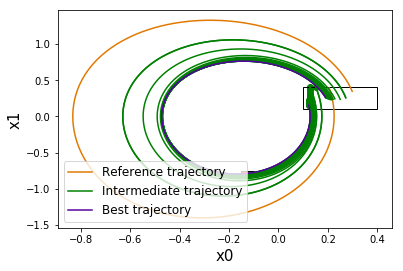

Time taken: 9.872886896133423
19.0
-0.017694068280867538
19.0
0.0


In [24]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC8')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
# dataObject.setSteps(150)

lowerBound = [-0.15, -0.8, 0.00, -0.60]
upperBound = [-0.10, -0.75, 0.05, -0.55]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.6, 0.8]

max_iter = 1
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[5],
                            scaling_factors=[0.2], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

In [11]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC9')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(120)

lowerBound = [-0.2, -1.05, 0.2, 0.25]
upperBound = [-0.15, -1.0, 0.25, 0.3]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.8, 1.0]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC9.txt
Idx *** 0
[[-0.19482810071450965, -1.0417905464314081, 0.2272626539400476, 0.2545378438265822]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17251143723070717
Best robustness -0.012673242839486898
Final distance 0.026279538538282337
Final simulation: 2
Time taken: 2.7383313179016113
Idx *** 1
[[-0.16848975522460885, -1.0269545909506221, 0.22652142312701304, 0.2853552826581417]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14109892688050665
Best robustness -0.01014574020

Best robustness -0.008728202248673073
Final distance 0.027951453852335356
Final simulation: 2
Time taken: 2.1571497917175293
Idx *** 15
[[-0.190398701284374, -1.0292779994161345, 0.2471992553762656, 0.2610460830120204]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18994668611186155
Best robustness -0.0018641412099491272
Final distance 0.01389869183228648
Final simulation: 8
Time taken: 15.15792179107666
Idx *** 16
[[-0.17421582681227638, -1.0442826066011863, 0.21419075987533354, 0.26167308996074784]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.34152294775

[[-0.17652406122915787, -1.0322790045325467, 0.23306852320869972, 0.2821612199631408]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09127013211123314
Best robustness -0.0013933105462563544
Final distance 0.023955113391464413
Final simulation: 2
Time taken: 2.37754487991333
Idx *** 32
[[-0.15579553596179135, -1.038339816089641, 0.22406763972913105, 0.27812344613359824]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2649109021522391
Best robustness -0.0022062816856960044
Final distance 0.007026595678683247
Final simulation: 8
Time taken: 15.786499738693237
Id

Best robustness -0.0008622188518867813
Final distance 0.009409352081969942
Final simulation: 3
Time taken: 4.201719045639038
Idx *** 48
[[-0.19515581465170373, -1.027181420671186, 0.22277427561218513, 0.2823176330214124]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
93
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19470222332357975
Best robustness -0.003701636694551036
Final distance 0.009710440521458637
Final simulation: 3
Time taken: 4.433038234710693
Idx *** 49
[[-0.15057559413012478, -1.008072925202628, 0.22138828688436954, 0.28926663714739953]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1196907461

Best robustness -0.006101466553192603
Final distance 0.010870579656492099
Final simulation: 3
Time taken: 4.622489929199219
Idx *** 63
[[-0.1784086952982981, -1.0465488201863988, 0.20787199173671, 0.2862239291734354]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
85
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15967929293054767
Best robustness -0.0032567900498735314
Final distance 0.022854551074517608
Final simulation: 2
Time taken: 2.122910261154175
Idx *** 64
[[-0.17603393771050696, -1.013937372768349, 0.21821932279973505, 0.2883250985449663]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18632502301283

Best robustness -0.006974788259676262
Final distance 0.0013788645455018035
Final simulation: 34
Time taken: 73.60634160041809
Idx *** 70
[[-0.18914757371039184, -1.0345183183117952, 0.23507870919827373, 0.2587262025561668]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09008423655631652
Best robustness -4.355814554030113e-05
Final distance 0.0006051504702124269
Final simulation: 26
Time taken: 56.487783432006836
Idx *** 71
[[-0.19065367037363917, -1.0198283145268314, 0.2038504438671602, 0.2662893238460297]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09228

Best robustness -0.00021027120888333917
Final distance 0.002981995589286866
Final simulation: 22
Time taken: 46.86897039413452
Idx *** 85
[[-0.16280997946542486, -1.0447258684442036, 0.21008869755050982, 0.2722040520872696]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1993518428462889
Best robustness -0.007734151977865644
Final distance 0.01594474795639031
Final simulation: 2
Time taken: 2.329364776611328
Idx *** 86
[[-0.19100754856399355, -1.0037443196573568, 0.20035020757554967, 0.26588038581072987]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25770813

Best robustness -0.003391019454365929
Final distance 0.01117061285299006
Final simulation: 4
Time taken: 6.7541749477386475
Idx *** 100
[[-0.19912221750562145, -1.010421051324001, 0.24889058057233174, 0.27773561792127666]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1693576001423696
Best robustness -7.140145195586034e-05
Final distance 0.016925403866459125
Final simulation: 3
Time taken: 4.402515411376953
Idx *** 101
[[-0.15839342020501584, -1.0060033283320853, 0.21231245787034342, 0.26961836457960897]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3070385

Best robustness -0.02944153090970436
Final distance 0.010159977802459462
Final simulation: 7
Time taken: 12.205377101898193
Idx *** 115
[[-0.1584510816172148, -1.0146376768593997, 0.20869644818726893, 0.28417125892982675]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
95
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.26353446437362443
Best robustness -0.004119180763150876
Final distance 0.04246002965318009
Final simulation: 2
Time taken: 2.365374803543091
Idx *** 116
[[-0.17702532591631243, -1.023916787470855, 0.24935915667663908, 0.2970722962163784]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2732176140

[[-0.16743231611181225, -1.003895692276176, 0.23971119597467191, 0.28617398754704215]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
97
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24844150493655232
Best robustness -0.0001925204142519954
Final distance 0.019610855751643907
Final simulation: 7
Time taken: 12.824756860733032
Idx *** 129
[[-0.18834479089108294, -1.0460224347903646, 0.226757438478495, 0.28484489956007436]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3431483801551589
Best robustness -0.0015248055448387754
Final distance 0.028314843074603444
Final simulation: 2
Time taken: 2.006035089492798
I

[[-0.16444098123211884, -1.0146214931542437, 0.2248284839056313, 0.28298919563978264]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3696637865975707
Best robustness -0.0007132510058900365
Final distance 0.016408976306845662
Final simulation: 3
Time taken: 4.56003212928772
Idx *** 138
[[-0.15304696613817104, -1.0280264416071467, 0.2041352948637957, 0.27827057738307]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2164297740825746
Best robustness -0.002537959974212911
Final distance 0.00252687959734642
Final simulation: 3
Time taken: 4.4317052364349365
Idx ***

Best robustness -0.007622371793167243
Final distance 0.010886423790599448
Final simulation: 10
Time taken: 18.603614807128906
Idx *** 154
[[-0.1565767818484729, -1.0343931521964378, 0.20337661938721008, 0.262840517659199]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1675955071721645
Best robustness -7.491112595203742e-05
Final distance 0.004960741007148945
Final simulation: 3
Time taken: 4.4866907596588135
Idx *** 155
[[-0.1826803311083136, -1.0130731026922428, 0.2162375538889599, 0.26163793091500775]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11978432

Best robustness -0.0014128321266698163
Final distance 0.010867551936769982
Final simulation: 2
Time taken: 2.1926589012145996
Idx *** 169
[[-0.1840655229152787, -1.0094202361196671, 0.21902724058288514, 0.2607860038667583]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2316228421573364
Best robustness -0.0055168859006475834
Final distance 0.010792225219305502
Final simulation: 13
Time taken: 26.12155055999756
Idx *** 170
[[-0.19269786692861585, -1.0491528856637036, 0.20752599710163297, 0.27850217423851104]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25102

Best robustness -0.02962190893675215
Final distance 0.02298196191748961
Final simulation: 4
Time taken: 6.149485111236572
Idx *** 184
[[-0.18978216494222755, -1.0467556661305195, 0.2160155324905587, 0.26117718943837454]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22086730443559613
Best robustness -0.0036702445720469545
Final distance 0.009160986640398844
Final simulation: 2
Time taken: 2.0960159301757812
Idx *** 185
[[-0.18274448946170319, -1.043325579148119, 0.23157873892609027, 0.25348277715543377]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.41777405

Best robustness -6.6889503505696e-05
Final distance 0.007895522402833104
Final simulation: 7
Time taken: 12.553924322128296
Idx *** 196
[[-0.15778488228818327, -1.0185700627768859, 0.21025490196864838, 0.2895330217928376]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3030516582712328
Best robustness -0.0007739641357755733
Final distance 0.011427932861950893
Final simulation: 14
Time taken: 28.231626510620117
Idx *** 197
[[-0.19928850153384103, -1.0144149149254424, 0.20511817427610254, 0.28102243661553533]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24466

Best robustness -0.000305646728314124
Final distance 0.005726588429792031
Final simulation: 16
Time taken: 32.187713861465454
Idx *** 211
[[-0.16862223654059577, -1.042788134587548, 0.2081301782291768, 0.2937299602734918]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
95
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.32817464494501297
Best robustness -0.0009835366354487007
Final distance 0.012070114521925353
Final simulation: 7
Time taken: 12.868673086166382
Idx *** 212
[[-0.1729657602046089, -1.0059719719297773, 0.21257054521332536, 0.2781955592637263]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2532429

Best robustness -0.004227956128657284
Final distance 0.03856074630361763
Final simulation: 2
Time taken: 2.065887689590454
Idx *** 226
[[-0.15872547214222132, -1.0141278066462645, 0.2294418339203365, 0.29650521129826024]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1883815041580181
Best robustness -0.009707244096496398
Final distance 0.012985845424218058
Final simulation: 10
Time taken: 18.848300457000732
Idx *** 227
[[-0.1586280608544518, -1.049434909605152, 0.23941509459814203, 0.26731598957354147]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.155911378

Best robustness -0.0006224194645893522
Final distance 0.014066717732001388
Final simulation: 12
Time taken: 24.14896535873413
Idx *** 241
[[-0.15160460392973935, -1.0157102888827108, 0.21898999650197337, 0.25281193852558853]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2648175628570611
Best robustness -0.0030788416657062667
Final distance 0.08041538613863487
Final simulation: 2
Time taken: 2.319944143295288
Idx *** 242
[[-0.17264301249560746, -1.0094101902607644, 0.24273737548743934, 0.2799539954258354]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.237504

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC9.txt
Idx *** 0
[[-0.15363627657963583, -1.036613112277673, 0.21846676046778468, 0.2917994747807131]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.2 correction steps 3
Starting distance: 0.26853106681359595
Best robustness -0.0036713775240933832
Final distance 0.03243993484820618
Final simulation: 4


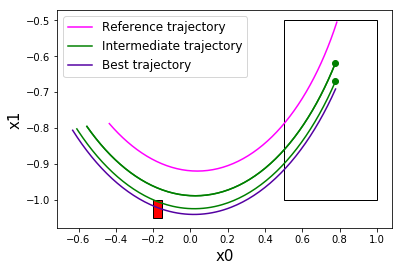

Time taken: 10.134140253067017
4.0
-0.0036713775240933832
4.0
0.0


In [2]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC9')

evalObject.setSimsBound(20)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

lowerBound = [-0.2, -1.05, 0.2, 0.25]
upperBound = [-0.15, -1.0, 0.25, 0.3]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.8, 1.0]

max_iter = 1
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[3],
                            scaling_factors=[0.2], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

In [14]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC9Sigmoid', act_fn='Sigmoid')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

lowerBound = [-0.55, 0.7, 0.65, 0.25]
upperBound = [-0.5, 0.75, 0.7, 0.3]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [1.0, 1.2]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC9Sigmoid.txt
Idx *** 0
[[-0.5203274336699549, 0.7040513804417048, 0.6647128835122353, 0.28169221002357814]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.41308765100190825
Best robustness -0.023561037332573365
Final distance 0.004232599586737843
Final simulation: 3
Time taken: 0.42810845375061035
Idx *** 1
[[-0.510561192674004, 0.7316841409557842, 0.6527908943612529, 0.27014317050515513]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Sta

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
115
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2879698443507829
Best robustness -0.0239048470270129
Final distance 0.004545608367575859
Final simulation: 3
Time taken: 0.38245368003845215
Idx *** 15
[[-0.5441633288658918, 0.7095604234440955, 0.6767006650126319, 0.2658930755381659]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
113
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.38414148763086886
Best robustness -0.024653377265345222
Final distance 0.0023936922850782117
Final simulation: 3
Time taken: 0.4194490909576416
Idx *** 16
[[-0.54887110869990

Best robustness -0.012666966528423473
Final distance 0.009598719316226448
Final simulation: 3
Time taken: 0.35753726959228516
Idx *** 25
[[-0.5333697583519149, 0.7097148256613978, 0.6583211985506494, 0.2707941751847303]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3566461527020604
Best robustness -0.036081860263230126
Final distance 0.006142867043664696
Final simulation: 3
Time taken: 0.44197988510131836
Idx *** 26
[[-0.5100166750866489, 0.7075802751809914, 0.656280797251868, 0.268067761741093]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_fact

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5690453546261015
Best robustness -0.014932009204030483
Final distance 0.004311577862041016
Final simulation: 3
Time taken: 0.4087560176849365
Idx *** 41
[[-0.5162522819547403, 0.722376856153373, 0.6512402598121536, 0.2823519119710768]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13343223086065448
Best robustness -0.0011920458444492077
Final distance 0.0045054164422156815
Final simulation: 3
Time taken: 0.42412257194519043
Idx *** 42
[[-0.531423682871

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.36872647566149785
Best robustness -0.014074825638706101
Final distance 0.006240893328654983
Final simulation: 3
Time taken: 0.4253113269805908
Idx *** 55
[[-0.5489364929565282, 0.7263411703170336, 0.651033891789142, 0.25789363097801293]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.29010510580407967
Best robustness -0.015976267587239135
Final distance 0.0035841272159746014
Final simulation: 3
Time taken: 0.3861880302429199
Idx *** 56
[[-0.512437550806

Best robustness -0.01809954602725583
Final distance 0.0015038820201928877
Final simulation: 3
Time taken: 0.393779993057251
Idx *** 66
[[-0.5107712653192549, 0.7463349554922859, 0.6657846669001287, 0.28076349388844435]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.44199928935408866
Best robustness -0.023798502788581866
Final distance 0.005762934705875296
Final simulation: 3
Time taken: 0.39655232429504395
Idx *** 67
[[-0.5032833379281526, 0.74257370075544, 0.6904158379036509, 0.26804402480562817]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_fac

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
111
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3605589791617308
Best robustness -0.031122356342461632
Final distance 0.003989214869905089
Final simulation: 3
Time taken: 0.4973030090332031
Idx *** 82
[[-0.5180474739379773, 0.7004284026507877, 0.6620173893106522, 0.2796367895440227]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.271697530018226
Best robustness -0.016290808358213504
Final distance 0.01399360546453471
Final simulation: 2
Time taken: 0.24584364891052246
Idx *** 83
[[-0.5199118677044953

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3915848701894372
Best robustness -0.010778780484110406
Final distance 0.0027898659838325626
Final simulation: 3
Time taken: 0.40522313117980957
Idx *** 92
[[-0.5445309501502339, 0.7054996573214638, 0.6680813759798705, 0.29470100191096427]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1769449216107969
Best robustness -0.009229279935531798
Final distance 0.009985680103389922
Final simulation: 3
Time taken: 0.4297308921813965
Idx *** 93
[[-0.517648114604

Best robustness -0.03113529411680016
Final distance 0.005274493721877369
Final simulation: 3
Time taken: 0.46337056159973145
Idx *** 104
[[-0.5455469055135966, 0.7149126937099318, 0.6818273379169013, 0.257338571832626]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.31856596043399243
Best robustness -0.018345718246557507
Final distance 0.004364579326333393
Final simulation: 2
Time taken: 0.2652459144592285
Idx *** 105
[[-0.51829173190108, 0.7431975397029691, 0.6702559455587654, 0.26831504720857446]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
103
True None
***** path idx 0 s_fac

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.502680061912748
Best robustness -0.023383469598882378
Final distance 0.0034067092826862155
Final simulation: 3
Time taken: 0.5000810623168945
Idx *** 120
[[-0.5495482135408215, 0.7133395314741148, 0.650507287442274, 0.27506991728989294]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3617024537862916
Best robustness -0.029444098930474394
Final distance 0.0247448993185088
Final simulation: 2
Time taken: 0.2767155170440674
Idx *** 121
[[-0.546322534934910

Best robustness -0.0008050453711541117
Final distance 0.005521921387482748
Final simulation: 3
Time taken: 0.4388563632965088
Idx *** 132
[[-0.5082888382344602, 0.7462448594893146, 0.6858500683200184, 0.25348293628417123]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24259776579911507
Best robustness -0.011136129540680217
Final distance 0.005946040523573558
Final simulation: 3
Time taken: 0.43422698974609375
Idx *** 133
[[-0.5293403876051598, 0.7195744362224125, 0.6977299049246246, 0.26964306319097603]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4391457825827919
Best robustness -0.01298220255966892
Final distance 0.005444452718395655
Final simulation: 3
Time taken: 0.41027092933654785
Idx *** 148
[[-0.5000741895738969, 0.7261080470407788, 0.6640407322672405, 0.2663165775363478]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
117
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2993074587194284
Best robustness -0.021828497081464504
Final distance 0.005880981685234232
Final simulation: 3
Time taken: 0.45559263229370117
Idx *** 149
[[-0.5453206310845661, 0.7117931275091213, 0.6854665493779213, 0.26373799381388263]]
/home/manishg/Research/NExG//eval-emsoft/e

Best robustness -0.007929261803303667
Final distance 0.0037218613576718343
Final simulation: 3
Time taken: 0.4441976547241211
Idx *** 163
[[-0.5175671769068668, 0.7434418901112579, 0.6697731371236468, 0.28151316074780475]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3014448635544795
Best robustness -0.022181640018322124
Final distance 0.004734614839479776
Final simulation: 3
Time taken: 0.4662952423095703
Idx *** 164
[[-0.5286857620950879, 0.7001485437336571, 0.6983337412813275, 0.2975283554226534]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_

Best robustness -0.020849075215484625
Final distance 0.004285572133759714
Final simulation: 3
Time taken: 0.41449499130249023
Idx *** 177
[[-0.5490417429218837, 0.7062955202179476, 0.6937402518303944, 0.26251195040553815]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.48035768842221244
Best robustness -0.006765237548420955
Final distance 0.006167972694972631
Final simulation: 3
Time taken: 0.4088246822357178
Idx *** 178
[[-0.5147180344637428, 0.7342697236284347, 0.6876932193060831, 0.2770664139045666]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.41393236012549295
Best robustness -0.04147738329042616
Final distance 0.03736889998197963
Final simulation: 2
Time taken: 0.22667765617370605
Idx *** 189
[[-0.5003233783050371, 0.7266303048704323, 0.655100953447485, 0.2845624420645957]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
113
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3830330309319837
Best robustness -0.01236005361407444
Final distance 0.00700895675647099
Final simulation: 3
Time taken: 0.4128224849700928
Idx *** 190
[[-0.5240151082732155

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
115
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3386303844146538
Best robustness -0.01002679098398429
Final distance 0.005751879785204906
Final simulation: 3
Time taken: 0.4774315357208252
Idx *** 199
[[-0.5291837622048667, 0.7063134826490773, 0.6586079536633549, 0.2918483701779319]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.42206493878425255
Best robustness -0.015292367420309705
Final distance 0.004955357552501369
Final simulation: 3
Time taken: 0.4548301696777344
Idx *** 200
[[-0.5338493261977

Best robustness -0.011350319420911914
Final distance 0.007102410469971243
Final simulation: 3
Time taken: 0.41491007804870605
Idx *** 214
[[-0.5150750863711775, 0.7361909884586199, 0.6716872158877045, 0.2858632339326254]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.073410795333508
Best robustness -0.022613130120446523
Final distance 0.018499078764320453
Final simulation: 2
Time taken: 0.263089656829834
Idx *** 215
[[-0.5135352869182672, 0.7159312540185998, 0.6757276015886416, 0.29344078376210697]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_fa

Best robustness -0.023084497046447106
Final distance 0.002594855511105244
Final simulation: 3
Time taken: 0.47821927070617676
Idx *** 227
[[-0.544886499254732, 0.7448002635231266, 0.6806142277141739, 0.29608439750826954]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5100701012291905
Best robustness -0.004384222607614285
Final distance 0.0031046233182745646
Final simulation: 3
Time taken: 0.4905283451080322
Idx *** 228
[[-0.5228804793418536, 0.7499842621914423, 0.679164585054299, 0.25728325460639545]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22711916661076303
Best robustness -0.01833984919958298
Final distance 0.012497855292992605
Final simulation: 2
Time taken: 0.23865771293640137
Idx *** 243
[[-0.5398548007832384, 0.7271713989700875, 0.6894960567893199, 0.2970745097772489]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Sigmoid_RBF_1_512_Sigmoid.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
116
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17431266551308114
Best robustness -0.007821677081927048
Final distance 0.003304974176369618
Final simulation: 3
Time taken: 0.3793654441833496
Idx *** 244
[[-0.53724493521

In [15]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC9Tanh')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(150)

lowerBound = [-0.55, 0.25, -0.05, -0.3]
upperBound = [-0.5, 0.3, 0.0, -0.25]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [1.0, 1.2]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC9Tanh.txt
Idx *** 0
[[-0.5192354536890857, 0.25986984878458835, -0.04668014424181489, -0.29121491005104083]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18790773510492798
Best robustness -0.001930552043916036
Final distance 0.015401114045608188
Final simulation: 3
Time taken: 0.38508129119873047
Idx *** 1
[[-0.5011137313493107, 0.28113663537267514, -0.03142344330521342, -0.2843134242405755]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting d

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.40530615568992984
Best robustness -0.010996236683217534
Final distance 0.0218289598269269
Final simulation: 3
Time taken: 0.42595982551574707
Idx *** 16
[[-0.5281244787337696, 0.26374213353757964, -0.022663213967785475, -0.2571253811870014]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
110
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.47874777162656523
Best robustness -0.009316093518577206
Final distance 0.0632702698749317
Final simulation: 2
Time taken: 0.2193615436553955
Idx *** 17
[[-0.5495392049721718, 0.2587126230660335, -0.0011701414437668978, -0.257077948680333]]
/home/manishg/Research/NExG//eval-emsoft/eva

Best robustness -0.007873962118180922
Final distance 0.006043402088955234
Final simulation: 3
Time taken: 0.42908596992492676
Idx *** 27
[[-0.5030949940949272, 0.27211095594529183, -0.01673334536850994, -0.2941271534911656]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.26867832621588333
Best robustness -0.020773361911601396
Final distance 0.02912180561133481
Final simulation: 2
Time taken: 0.23498177528381348
Idx *** 28
[[-0.5494966156610148, 0.2774311281337164, -0.02240391016862649, -0.25932314378417815]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor

Best robustness -0.001601450516482139
Final distance 0.001984573123931372
Final simulation: 4
Time taken: 0.6291990280151367
Idx *** 43
[[-0.512812944921201, 0.2547422781544623, -0.039405744274038534, -0.2543575185896955]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5923180462027363
Best robustness -0.004036521491328715
Final distance 0.03986600413764934
Final simulation: 2
Time taken: 0.24970698356628418
Idx *** 44
[[-0.5179234545137767, 0.2996851351409387, -0.011053815338716064, -0.2749337111346225]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.

Best robustness -0.012538383630834704
Final distance 0.007392812414397583
Final simulation: 3
Time taken: 0.4034535884857178
Idx *** 59
[[-0.5201617164416749, 0.2887708764438105, -0.030519133002084954, -0.29606297542451787]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.309975446031161
Best robustness -0.004012005958867165
Final distance 0.054533782127804034
Final simulation: 2
Time taken: 0.23500943183898926
Idx *** 60
[[-0.5406370812219712, 0.2523016503246791, -0.025121357075398205, -0.2935297297480705]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
115
True None
***** path idx 0 s_factor 

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.41094498097123866
Best robustness -0.0009892706788692807
Final distance 0.01966955378438408
Final simulation: 2
Time taken: 0.20357441902160645
Idx *** 75
[[-0.5354766353348474, 0.26975074940265215, -0.04425166737550704, -0.2507684045663615]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3007037061251515
Best robustness -0.007550813763467057
Final distance 0.019208437117150826
Final simulation: 2
Time taken: 0.19623017311096191
Idx *** 76
[[-0.5195709341444209, 0.29255403029067817, -0.018710506981577633, -0.2719466402972089]]
/home/manishg/Research/NExG//eval-emsoft

Best robustness -0.019886582052235927
Final distance 0.025869094869776857
Final simulation: 3
Time taken: 0.3570866584777832
Idx *** 83
[[-0.5367702083788815, 0.2686307072359061, -0.0072293596287439504, -0.2600359348042669]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
109
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22091367284532312
Best robustness 0.026609779986206505
Final distance 0.01585292336586347
Final simulation: 51
Time taken: 8.746262073516846
Idx *** 84
[[-0.5128757971932124, 0.25394496525696525, -0.032752443179484, -0.2982990621028537]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5

Best robustness -0.0009052615601449765
Final distance 0.0128431891264093
Final simulation: 5
Time taken: 0.7612369060516357
Idx *** 98
[[-0.5336400475228801, 0.29492323868474307, -0.013121214793481044, -0.26770841037070064]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5207870491758484
Best robustness -0.0024035665308564554
Final distance 0.008954407253779266
Final simulation: 3
Time taken: 0.3922605514526367
Idx *** 99
[[-0.526063769993853, 0.281198164437945, -0.0035379377202698556, -0.2861208414392403]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 

Best robustness -0.002035694479615057
Final distance 0.02913895294034614
Final simulation: 3
Time taken: 0.3415522575378418
Idx *** 112
[[-0.548793067806856, 0.2769117564899443, -0.023082200251800807, -0.28518664301776453]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5498539526439304
Best robustness -0.02108312951124508
Final distance 0.0067641091945988266
Final simulation: 3
Time taken: 0.3575174808502197
Idx *** 113
[[-0.5174566784256202, 0.26757251859907066, -0.03866886508492526, -0.25291501848029363]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.38294346496390863
Best robustness -0.010604772754607587
Final distance 0.04221719860984816
Final simulation: 3
Time taken: 0.904010534286499
Idx *** 124
[[-0.5497946815496854, 0.2643168187437589, -0.019756800914061595, -0.25502256563886194]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3037069850259577
Best robustness -0.021008045250275387
Final distance 0.006398891359777864
Final simulation: 3
Time taken: 0.3946089744567871
Idx *** 125
[[-0.537086917739445, 0.25

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.34799593802104645
Best robustness -0.023371470281557116
Final distance 0.004046968767551921
Final simulation: 3
Time taken: 0.37937331199645996
Idx *** 138
[[-0.5254160044267365, 0.27121027845396134, -0.023440440026306627, -0.28421245067479434]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7625010809972478
Best robustness -0.02003182024782646
Final distance 0.008578245001258426
Final simulation: 3
Time taken: 0.4142148494720459
Idx *** 139
[[-0.5011282103245869, 0.2626379710852313, -0.041754855488753566, -0.2884977017764755]]
/home/manishg/Research/NExG//eval-emsof

Best robustness -0.009459275095348108
Final distance 0.06019342353095605
Final simulation: 2
Time taken: 0.24043750762939453
Idx *** 150
[[-0.5113626641688769, 0.2770766021321757, -0.019375795818384434, -0.26975629731075634]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3439417072538983
Best robustness -0.013036822410467552
Final distance 0.0033740617202399326
Final simulation: 3
Time taken: 0.36974024772644043
Idx *** 151
[[-0.5173981979232869, 0.2523760929444496, -0.03671409648883317, -0.2809797160784065]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_fact

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
114
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.46424825159652017
Best robustness -0.015574800946865142
Final distance 0.04816276267555813
Final simulation: 2
Time taken: 0.22281599044799805
Idx *** 163
[[-0.5276218411234883, 0.2828746923830302, -0.0204789020780708, -0.2889947450457062]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5921878885481188
Best robustness -0.006636220777409385
Final distance 0.0625073107662079
Final simulation: 2
Time taken: 0.20343303680419922
Idx *** 164
[[-0.5388377679514043, 0.2917391658851137, -0.03771742845157698, -0.26645924644150315]]
/home/manishg/Research/NExG//eval-emsoft/eva

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.35920740270243323
Best robustness -0.0006512685602569797
Final distance 0.014329002015633729
Final simulation: 3
Time taken: 0.38941478729248047
Idx *** 176
[[-0.5343500120555172, 0.2520264496532337, -0.02602248830999744, -0.26305124912279826]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
115
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5605278146222148
Best robustness -0.006357643892067388
Final distance 0.06576526869231673
Final simulation: 2
Time taken: 0.21803879737854004
Idx *** 177
[[-0.5111531882836853, 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.533827360188123
Best robustness -0.002762344915121482
Final distance 0.019991501397452083
Final simulation: 3
Time taken: 0.35936498641967773
Idx *** 190
[[-0.5319745468658348, 0.2969613659326325, -0.0325055818285538, -0.27516570161752557]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
118
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3175241312206472
Best robustness 0.02800855565221655
Final distance 0.009108466971960149
Final simulation: 51
Time taken: 8.628907680511475
Idx *** 191
[[-0.5397262747506804, 0.2925

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4293007647477655
Best robustness -0.028886599274115507
Final distance 0.0023768729260333524
Final simulation: 4
Time taken: 0.5048575401306152
Idx *** 200
[[-0.524908612271803, 0.2912684745351251, -7.022224458633902e-05, -0.2804408376241909]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
117
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.273708551073268
Best robustness 0.03326031314071497
Final distance 0.008354018550203532
Final simulation: 51
Time taken: 8.114152669906616
Idx *** 201
[[-0.5475451449782364, 0.2646009779696625, -0.04939922508083816, -0.2565000200300623]]
/home/manishg/Research/NExG//eval-emsoft/eval

Best robustness -0.008653056379657686
Final distance 0.006035931999205571
Final simulation: 3
Time taken: 0.5291287899017334
Idx *** 212
[[-0.52193248815688, 0.2670072801562946, -0.005211600730158056, -0.2849725287071084]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
103
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3923750120333435
Best robustness -0.008371312322826396
Final distance 0.02556926713764307
Final simulation: 3
Time taken: 0.5185725688934326
Idx *** 213
[[-0.5090547210388263, 0.2900671530569836, -0.015653613109905297, -0.2727102756961711]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4766077490218225
Best robustness -0.013810364539318887
Final distance 0.021540988844538835
Final simulation: 3
Time taken: 0.3964698314666748
Idx *** 228
[[-0.5383168025971039, 0.2546867218226455, -0.019120442598075424, -0.2822959889617862]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
108
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.481246653976979
Best robustness -0.010161993817482114
Final distance 0.0384623749790357
Final simulation: 2
Time taken: 0.22725749015808105
Idx *** 229
[[-0.5299889897653668, 0.26788149948922535, -0.02248232922336041, -0.27456696363268385]]
/home/manishg/Research/NExG//eval-emsoft/ev

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.34336010145148044
Best robustness -0.0023772632948084738
Final distance 0.0011793839045319587
Final simulation: 4
Time taken: 0.567333459854126
Idx *** 238
[[-0.5293402598301861, 0.29397077783875936, -0.012550934783098454, -0.271304183507959]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3411704536317256
Best robustness -0.005435970982478167
Final distance 0.008055271791088402
Final simulation: 3
Time taken: 0.4177672863006592
Idx *** 239
[[-0.5488111328784672, 0

In [17]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC10')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
# dataObject.setSteps(150)

lowerBound = [8.4, -3.55, 2.5, 2.2]
upperBound = [8.45, -3.5, 2.55, 2.25]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.8, 1.0]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC10.txt
Idx *** 0
[[8.441058893830165, -3.5273136020416156, 2.5057953361115035, 2.237848867373235]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1404145038023312
Best robustness -0.0027848217294339506
Final distance 0.040735121590660894
Final simulation: 4
Time taken: 2.337427854537964
Idx *** 1
[[8.442468251076317, -3.5110597318397203, 2.5070838637370123, 2.226811293638149]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20938812041007807
Best robustness -0.00619890471859641


[[8.431136940422473, -3.519439433405901, 2.525480223090751, 2.21014342902245]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.44787414115856133
Best robustness -0.013075785328953149
Final distance 0.01353694993998602
Final simulation: 3
Time taken: 2.275120735168457
Idx *** 13
[[8.403311888153429, -3.5301179144386508, 2.5434097985540394, 2.2286015272100954]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11452891588346362
Best robustness -0.014973286075214531
Final distance 0.01108429096384093
Final simulation: 3
Time taken: 1.870812177658081
Idx *** 14
[[8.

Best robustness -0.0034570000731690698
Final distance 0.04773970018338639
Final simulation: 2
Time taken: 0.7728796005249023
Idx *** 20
[[8.421691646042662, -3.5004160244769613, 2.5478114528699214, 2.2457999633161445]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16987283153316307
Best robustness -0.0020821219080642273
Final distance 0.004007080600432434
Final simulation: 3
Time taken: 1.4932115077972412
Idx *** 21
[[8.400310584687874, -3.50224185245561, 2.5225206165328675, 2.23395619903433]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2586084661511782


/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.344643006590359
Best robustness -0.003360961386061234
Final distance 0.05848068535953701
Final simulation: 2
Time taken: 0.8629260063171387
Idx *** 34
[[8.440249555896544, -3.5421053885328564, 2.5345587876081925, 2.2248527330983277]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08818973073197325
Best robustness -0.014752604740767339
Final distance 0.045475810998957145
Final simulation: 2
Time taken: 0.8598537445068359
Idx *** 35
[[8.411289496722508, -3.5081387249070097, 2.5409493897265993, 2.2138386016551386]]

Best robustness -0.0015377627567065844
Final distance 0.015307811175726094
Final simulation: 5
Time taken: 3.4345407485961914
Idx *** 48
[[8.430241372245051, -3.521354455499729, 2.5180655666247693, 2.2039793974276747]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18053246444288323
Best robustness -0.016494799687177597
Final distance 0.016186260283511646
Final simulation: 4
Time taken: 2.5207231044769287
Idx *** 49
[[8.435903123448847, -3.5361585289729396, 2.523225459875195, 2.247952176340195]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1110982452229498

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24247316019046336
Best robustness -0.0016762989762764136
Final distance 0.02595461518905108
Final simulation: 6
Time taken: 3.975424289703369
Idx *** 59
[[8.422972579793509, -3.5010776688163254, 2.5335779008289476, 2.2475484755382]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17454850759101664
Best robustness -0.01801031448214241
Final distance 0.02616745279868263
Final simulation: 3
Time taken: 1.694307804107666
Idx *** 60
[[8.4210851836095, -3.529904927385398, 2.5024793308785944, 2.2004471117025983]]
/home/

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
87
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1495317845121576
Best robustness -0.008145361438713472
Final distance 0.016809311277380695
Final simulation: 4
Time taken: 2.261019706726074
Idx *** 74
[[8.43341855235423, -3.509045498507762, 2.5231550348316083, 2.235677015847154]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.07478269902580016
Best robustness -0.0004711400103776242
Final distance 0.026735863356216895
Final simulation: 2
Time taken: 0.783656120300293
Idx *** 75
[[8.433258032685343, -3.5295920609169964, 2.515151706489325, 2.221495630598856]]
/ho

Best robustness -0.005255796981099792
Final distance 0.05444128087703474
Final simulation: 2
Time taken: 1.2744545936584473
Idx *** 86
[[8.440871929916044, -3.517749889489766, 2.508311864543915, 2.207270014308548]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2694163078124048
Best robustness -0.0028999157579714385
Final distance 0.0433093213528133
Final simulation: 2
Time taken: 0.769228458404541
Idx *** 87
[[8.412561360094841, -3.500910653960099, 2.52215839006817, 2.208425418168932]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2919983083776109
Best rob

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20063285022336966
Best robustness -0.005674146655000101
Final distance 0.03384628281553103
Final simulation: 2
Time taken: 0.811302661895752
Idx *** 97
[[8.412605468682752, -3.5198369462260435, 2.5137850468825667, 2.2003354665079007]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21717425815648148
Best robustness -0.0015155927107777245
Final distance 0.02216401367580385
Final simulation: 3
Time taken: 1.475088357925415
Idx *** 98
[[8.439813650780486, -3.549157946549126, 2.5150615819486295, 2.228653298378954]]
/

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19104973608090348
Best robustness -0.020312808586955278
Final distance 0.015053599235978515
Final simulation: 4
Time taken: 2.48254656791687
Idx *** 109
[[8.436496645790443, -3.545851846317673, 2.5350353369962964, 2.2400576900119353]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02074149659893997
*********** Initial sample falsified ************
Best robustness -0.015061384198751249
Final distance 0.02074149659893997
Final simulation: 1
Time taken: 0.00015687942504882812
** either f_iter is 1 or rel_dist is 1.

[[8.408239513443808, -3.5233320694643453, 2.5201642419204395, 2.21775957688817]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
83
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15206272642750818
Best robustness -0.012702135322169905
Final distance 0.020548363823616633
Final simulation: 4
Time taken: 2.82537579536438
Idx *** 123
[[8.402109501021183, -3.5404493738716654, 2.5348220866143625, 2.2166758607894983]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.11804124941059126
Best robustness -0.019605567762551956
Final distance 0.005048107354653844
Final simulation: 4
Time taken: 2.7631282806396484
Idx *** 12

Best robustness -0.006634354321093383
Final distance 0.027776714680153972
Final simulation: 3
Time taken: 1.49253249168396
Idx *** 136
[[8.447260620016953, -3.5211930785765215, 2.5221874571135143, 2.216218837359867]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10097051645983955
Best robustness -0.007896003402008578
Final distance 0.027703453110116866
Final simulation: 2
Time taken: 0.9042346477508545
Idx *** 137
[[8.422572667147161, -3.523031858585278, 2.5168278349447797, 2.230264594218698]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.33302647475048236

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2366407444522452
Best robustness -0.0033087012051966624
Final distance 0.004155457266186137
Final simulation: 6
Time taken: 3.6424925327301025
Idx *** 153
[[8.411450550398165, -3.5043323712022327, 2.5268252841782255, 2.2255717767057552]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05855226592048118
Best robustness -0.01238042517192195
Final distance 0.036470517393742935
Final simulation: 2
Time taken: 0.7604737281799316
Idx *** 154
[[8.410884622217791, -3.5267937551466813, 2.5421831285484577, 2.23868283594663

Best robustness -0.015943691806342475
Final distance 0.01840575563556617
Final simulation: 2
Time taken: 0.79024338722229
Idx *** 163
[[8.444543350536225, -3.541208384821132, 2.5230542113849523, 2.217050777956248]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08727566487760713
Best robustness -0.01201479284263085
Final distance 0.0207190929608982
Final simulation: 3
Time taken: 1.5831069946289062
Idx *** 164
[[8.435281408949505, -3.5376527807152325, 2.528228356891505, 2.235640009662647]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1860466669530741
Best 

Best robustness -0.01866995101698654
Final distance 0.06775469643304106
Final simulation: 2
Time taken: 0.7662832736968994
Idx *** 177
[[8.421634745808724, -3.5368977152736325, 2.547491731066351, 2.2299814548834394]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
86
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06319689720959795
Best robustness -0.006745513642691492
Final distance 0.01682159065728429
Final simulation: 2
Time taken: 0.8256511688232422
Idx *** 178
[[8.40755357692567, -3.5217725174014736, 2.513369546276283, 2.22002064723638]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
93
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10094324320405741
Be

Best robustness -0.008353681520547607
Final distance 0.0523627060820811
Final simulation: 2
Time taken: 0.7496404647827148
Idx *** 184
[[8.406819803886265, -3.5381174733979437, 2.5418010219335487, 2.2152803387089635]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18123153069770925
Best robustness -0.011515008852352349
Final distance 0.017692513532664593
Final simulation: 5
Time taken: 3.1135575771331787
Idx *** 185
[[8.424249351784155, -3.513372206757244, 2.534720423638424, 2.211105983414526]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21560987155885264

Best robustness -0.019683452188984596
Final distance 0.02831162256865436
Final simulation: 3
Time taken: 1.6346306800842285
Idx *** 196
[[8.41202503317614, -3.529542316500621, 2.531125916077591, 2.214868083894068]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14075171351457158
Best robustness -0.007898761364784512
Final distance 0.03730190341728435
Final simulation: 3
Time taken: 1.4834985733032227
Idx *** 197
[[8.405383152208763, -3.526210499211989, 2.536777302789152, 2.210174118365882]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1475128590626223
Best

Best robustness -0.0071577533488085265
Final distance 0.024916517746243524
Final simulation: 4
Time taken: 2.404766082763672
Idx *** 211
[[8.437973534833349, -3.5193724105366493, 2.5140002026108252, 2.2434097203704613]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0951136149093626
Best robustness -0.0037122955416819536
Final distance 0.009667952828764868
Final simulation: 5
Time taken: 2.915059804916382
Idx *** 212
[[8.403259362115184, -3.522117556120251, 2.5406502758130185, 2.229100666204622]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.176246850704044

Best robustness -0.017953925506857704
Final distance 0.03080107991088941
Final simulation: 3
Time taken: 1.4323790073394775
Idx *** 224
[[8.410143831183024, -3.536880967528014, 2.533166281761365, 2.227922481987797]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18526177918944012
Best robustness -0.01224962685138209
Final distance 0.012869515602067155
Final simulation: 4
Time taken: 2.483295202255249
Idx *** 225
[[8.448993654773835, -3.543385203271408, 2.5057763563056588, 2.2310855458225003]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1402721493298147
Be

Best robustness -0.003261804222836062
Final distance 0.04207405270094666
Final simulation: 2
Time taken: 0.7634639739990234
Idx *** 236
[[8.419455802166617, -3.5082558964756836, 2.5211009215168336, 2.213980031074623]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17062440318163044
Best robustness -0.013869127776644063
Final distance 0.027502123803764704
Final simulation: 2
Time taken: 0.8487086296081543
Idx *** 237
[[8.446327528354406, -3.5400875869738693, 2.5244182391044365, 2.2305503421540203]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
84
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19661450269448

Best robustness -0.0034764081380447287
Final distance 0.04957213457960794
Final simulation: 2
Time taken: 0.7623357772827148
Idx *** 248
[[8.43304425167615, -3.517764336638773, 2.5132662001129127, 2.2271075943493592]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15020542479217128
Best robustness -0.008461515271387832
Final distance 0.031557829396591464
Final simulation: 2
Time taken: 0.6666457653045654
Idx *** 249
[[8.403270882196708, -3.505177221490525, 2.502089848771946, 2.2047995962814215]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC10_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2960352954142191

In [18]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='DoublePendulumLess')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()

lowerBound = [1.55, 0.25, -0.65, -1.2]
upperBound = [1.6, 0.3, -0.6, -1.15]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [1.0, 1.2]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_DoublePendulumLess.txt
Idx *** 0
[[1.5744886933158437, 0.2563519925458453, -0.6427325669574296, -1.180280388691314]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2794783655142603
Best robustness -0.00025959058929792
Final distance 0.005051563852266254
Final simulation: 5
Time taken: 4.219873428344727
Idx *** 1
[[1.596367801700472, 0.28615370930241263, -0.6021165510396584, -1.1502039925274055]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distanc

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18000980715245926
Best robustness -0.002182574770695611
Final distance 0.0031378171024460198
Final simulation: 3
Time taken: 2.604186773300171
Idx *** 12
[[1.5985448419368444, 0.2965394509048956, -0.6101118172453055, -1.1888209495817803]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09009267120124714
Best robustness -0.001203553218125597
Final distance 0.011909691988142025
Final simulation: 3
Time taken: 2.5264806747436523
Idx *** 13
[[1.5607520041750298, 0.2

[[1.5874291983143707, 0.26131454313320035, -0.6292044174082301, -1.1968765403963626]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17781107810093427
Best robustness -0.0008986577185572386
Final distance 0.014493506740952587
Final simulation: 5
Time taken: 3.967193603515625
Idx *** 25
[[1.596539195752884, 0.25433761812880296, -0.63194409487183, -1.1878609673920228]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.34859285764201
Best robustness -0.005621979682894684
Final distance 0.001981885075820611
Final 

Best robustness -0.0031708995569057485
Final distance 0.040777128785137784
Final simulation: 2
Time taken: 0.9762160778045654
Idx *** 37
[[1.550756191009428, 0.2828600430688336, -0.6177502285270697, -1.166968414565801]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.38665934662962637
Best robustness -0.0005478351959540273
Final distance 0.013123108980584363
Final simulation: 22
Time taken: 20.14083218574524
Idx *** 38
[[1.5869267076590123, 0.2867050784723854, -0.6385881486552218, -1.1727276886876983]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.

Best robustness -0.0058200437959269324
Final distance 0.03101023434979024
Final simulation: 2
Time taken: 1.0976943969726562
Idx *** 50
[[1.5601630609661234, 0.2747032391885836, -0.6439148163037066, -1.1587794181192206]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
108
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.35728680139931435
Best robustness -0.005944504887353874
Final distance 0.021695805468633828
Final simulation: 3
Time taken: 1.7662630081176758
Idx *** 51
[[1.5554089845337102, 0.29343175241819636, -0.6498588245364311, -1.1562875022756836]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0

Best robustness -0.003644601979084783
Final distance 0.03430613938004066
Final simulation: 5
Time taken: 3.9977734088897705
Idx *** 66
[[1.5595611180917812, 0.2804251860290419, -0.6008643228968145, -1.1632512466775842]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2698490310583662
Best robustness -0.0018028631240871729
Final distance 0.009613066552830245
Final simulation: 3
Time taken: 1.9434707164764404
Idx *** 67
[[1.5701178021278894, 0.2747898539142594, -0.6442497278021221, -1.1955698839453077]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0.5

[[1.5904573988635393, 0.25432798601340256, -0.6083694866366584, -1.151902545233674]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24151410528297787
Best robustness -0.0003275798847428568
Final distance 0.004859776248468214
Final simulation: 9
Time taken: 9.582951307296753
Idx *** 81
[[1.5706754539853711, 0.2854545201295286, -0.617248896505058, -1.1669633946680027]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4557590452905699
Best robustness -0.004016840314879033
Final distance 0.04008924078345331
Final

Best robustness -0.009558851280232261
Final distance 0.024525990721486774
Final simulation: 2
Time taken: 1.214205026626587
Idx *** 92
[[1.5855413802067826, 0.2705851192949969, -0.6179368074212, -1.1967412189063733]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
103
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2280626474268822
Best robustness -0.004197745763110827
Final distance 0.0075599096503437616
Final simulation: 4
Time taken: 3.4631597995758057
Idx *** 93
[[1.5564143789517246, 0.2973836911659713, -0.6253386678942285, -1.1612235577009655]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 co

[[1.5871513330435236, 0.2839916530891928, -0.6176807114845996, -1.1997039599054136]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19517597155795652
Best robustness -0.004807406757253774
Final distance 0.033102180777693516
Final simulation: 2
Time taken: 1.4079713821411133
Idx *** 104
[[1.5963010476399577, 0.27243306384940535, -0.6053082918218647, -1.1791861114667803]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.13951125929462135
Best robustness -0.003543308518457522
Final distance 0.015834587859951618


/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2997032798786955
Best robustness -0.0009026780869294537
Final distance 0.007981394406336618
Final simulation: 37
Time taken: 38.57343053817749
Idx *** 118
[[1.5749837810052838, 0.2563528749532336, -0.6341136332971845, -1.1631975444645029]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3068349915602576
Best robustness -0.008023475149145698
Final distance 0.029207551104914086
Final simulation: 4
Time taken: 3.1400606632232666
Idx *** 119
[[1.5630218423736428, 0.

Best robustness -0.00045538042383008737
Final distance 0.022363168798064034
Final simulation: 9
Time taken: 8.257986068725586
Idx *** 133
[[1.5633053952959945, 0.25378968861849494, -0.6469171804850893, -1.1601051410054855]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
105
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27313180669312226
Best robustness -0.002546841299643665
Final distance 0.01433947797219965
Final simulation: 3
Time taken: 2.128721237182617
Idx *** 134
[[1.5805995351117024, 0.2556893080817944, -0.6455841067552578, -1.1625556009825302]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 

Best robustness -0.003752893482012576
Final distance 0.018758122295154295
Final simulation: 3
Time taken: 2.152583360671997
Idx *** 146
[[1.5677807257027914, 0.2948451591943729, -0.62165423205437, -1.1518623086256923]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25348511797285866
Best robustness -0.0051630000807377785
Final distance 0.03516310124996101
Final simulation: 3
Time taken: 2.2054941654205322
Idx *** 147
[[1.5643741247945595, 0.2834024792440197, -0.6081574645747445, -1.1851003258089634]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5

[[1.5987857933555862, 0.29827246456038325, -0.6087055428187484, -1.189227922309651]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25404005621192927
Best robustness -0.0004942984036315767
Final distance 0.009684153376121067
Final simulation: 3
Time taken: 1.9584698677062988
Idx *** 161
[[1.557488698803568, 0.2867510074054661, -0.6278309340979723, -1.1673085495523499]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.42405049418974033
Best robustness -0.004969911728070153
Final distance 0.015891756063252566
F

Best robustness -0.0037837757498691005
Final distance 0.0024395342711187283
Final simulation: 3
Time taken: 2.383587598800659
Idx *** 176
[[1.58480567313725, 0.2752669868972878, -0.6300805247966494, -1.1659916090164968]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3417450602512065
Best robustness -0.0031575461131789773
Final distance 0.022017962854374944
Final simulation: 3
Time taken: 2.412851572036743
Idx *** 177
[[1.5894535521181536, 0.2622265364452887, -0.6457086967138831, -1.1646928033542687]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.

[[1.5868276439779199, 0.25572627308309726, -0.6259762282066863, -1.1792962731526424]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
106
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.0787215889566928
Best robustness -0.0058960238702863155
Final distance 0.00947530051325155
Final simulation: 2
Time taken: 1.1318600177764893
Idx *** 191
[[1.5655590685871537, 0.2505238179583703, -0.6198253317095717, -1.1751901954162869]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
104
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14503751742812476
Best robustness -0.0005569872936174169
Final distance 0.009094676846424904


/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1879553180313149
Best robustness -0.0014743769639549154
Final distance 0.019720505632514852
Final simulation: 3
Time taken: 2.2318451404571533
Idx *** 205
[[1.55641905307739, 0.29682847819716807, -0.619033695724447, -1.1500999147448476]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1156382432244106
Best robustness -0.006367330506320212
Final distance 0.022095546706063014
Final simulation: 2
Time taken: 1.069328784942627
Idx *** 206
[[1.5958699079274545, 0.269

[[1.5633724685685004, 0.2705345261627251, -0.6040961684310248, -1.1737031324761005]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21498558653239494
Best robustness -0.0004885403676977429
Final distance 0.04812954921071561
Final simulation: 3
Time taken: 2.4262611865997314
Idx *** 218
[[1.5608309332966057, 0.29906308779299057, -0.6239079280198172, -1.1907407434269028]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4155642281946106
Best robustness -0.0005563972559957664
Final distance 0.05207354707848362
F

Best robustness -0.0054270343219253725
Final distance 0.05428793576658381
Final simulation: 2
Time taken: 1.0415985584259033
Idx *** 233
[[1.5663506294143767, 0.2512624015103504, -0.6191707666488715, -1.1800680639527243]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
101
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3843700521594044
Best robustness -0.0019227210361477676
Final distance 0.015526292259626574
Final simulation: 5
Time taken: 4.106121063232422
Idx *** 234
[[1.5723514632655502, 0.2749093922035194, -0.6118618113703392, -1.168542568693825]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
107
True None
***** path idx 0 s_factor 0.

[[1.5861489897700014, 0.2769490027531149, -0.6062996997345461, -1.1602479203910614]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
100
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2619785171923724
Best robustness -0.00017546927296807624
Final distance 0.021176829660204788
Final simulation: 12
Time taken: 12.07616376876831
Idx *** 245
[[1.556728134402463, 0.2988624443215434, -0.6081955900236403, -1.1914915321372546]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumLess_RBF_1_512_ReLU.h5
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
102
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23117263776817948
Best robustness -0.0009712286021474892
Final distance 0.029244199430946027


In [19]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='DoublePendulumMore')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()

lowerBound = [0.90, 0.65, -1.8, -1.2]
upperBound = [0.95, 0.7, -1.75, -1.15]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.4, 0.6]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_DoublePendulumMore.txt
Idx *** 0
[[0.9430363391980721, 0.6517454611475824, -1.7702064292429676, -1.1564790320303877]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
55
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.449059865399627
Best robustness -0.015882866844537546
Final distance 0.02682479700988123
Final simulation: 7
Time taken: 7.359241008758545
Idx *** 1
[[0.9480024178242529, 0.6810037536402913, -1.7899408437956292, -1.174781783659886]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3768314181031456
Best robustness -0.00

[[0.9185491365427554, 0.6967489382218294, -1.773951974846867, -1.1954337468110912]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2769208060480024
Best robustness -0.0019392803185827034
Final distance 0.00670760439729598
Final simulation: 4
Time taken: 3.925497055053711
Idx *** 17
[[0.9231967072080329, 0.6912493611261828, -1.7748816721804432, -1.1752170746374637]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
49
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25806403260186384
Best robustness -0.00964353311218602
Final distance 0.02865593834506017
Final simulation: 3
Time taken: 2.741312503814697

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
49
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14372146122769003
Best robustness -8.225882206569501e-05
Final distance 0.028581918681888786
Final simulation: 3
Time taken: 1.9565515518188477
Idx *** 33
[[0.9346792420116107, 0.6553145772365127, -1.7524893668227761, -1.1788187503089773]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
52
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12457520202639696
Best robustness -0.004426792902914034
Final distance 0.03889039663420354
Final simulation: 2
Time taken: 1.2221486568450928
Idx *** 34
[[0.9438504307646112, 0.6790548893542927, -1.7995081644607578, -1.1

[[0.90120052580398, 0.6658468034025353, -1.7756811142311697, -1.1907948030852982]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
57
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.20030347200736334
Best robustness -0.03538347165159872
Final distance 0.016105459095193498
Final simulation: 9
Time taken: 8.440467119216919
Idx *** 45
[[0.931694194418489, 0.6781051877499132, -1.7753985637023186, -1.1674855549861247]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
52
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17319305858315526
Best robustness -0.010629707315207293
Final distance 0.02171522699109032
Final simulation: 3
Time taken: 1.9805712699890137

Best robustness -0.0030615042335264686
Final distance 0.01395131393255044
Final simulation: 3
Time taken: 1.8400728702545166
Idx *** 61
[[0.913779946653378, 0.6885880456834536, -1.7772550884059874, -1.1572527205524874]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
58
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.37406387052281426
Best robustness -0.031162109617712708
Final distance 0.02348350317036278
Final simulation: 5
Time taken: 3.9588022232055664
Idx *** 62
[[0.939514950997878, 0.6558798841213382, -1.7942833145291468, -1.1990705220164766]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
51
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.343

[[0.9235316568294999, 0.69982200817721, -1.7914834833646192, -1.1659574164815094]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
47
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3293383732915143
Best robustness -0.005134651022178582
Final distance 0.006489281368672466
Final simulation: 3
Time taken: 1.9639854431152344
Idx *** 78
[[0.906362794093064, 0.6783932059608491, -1.7626601313586145, -1.157659368551138]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
51
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3611356431743122
Best robustness -0.00022654359900764476
Final distance 0.030569665668670233
Final simulation: 3
Time taken: 1.99934601783752

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3746276299768758
Best robustness -0.01014331181747552
Final distance 0.016516485168715397
Final simulation: 3
Time taken: 1.9296624660491943
Idx *** 94
[[0.9353452538603166, 0.6704048265014119, -1.7633073237679724, -1.1535071100237002]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18075676200501176
Best robustness -0.0007495027532882226
Final distance 0.03160190295569969
Final simulation: 2
Time taken: 1.063218593597412
Idx *** 95
[[0.9374218003698307, 0.6905265036048, -1.759402029537607, -1.18963704

Best robustness -0.007458193747916897
Final distance 0.041661229739674024
Final simulation: 3
Time taken: 2.3591012954711914
Idx *** 110
[[0.9376831974798504, 0.6653386447850428, -1.7931474261248506, -1.1836811445549582]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.31793150560018396
Best robustness -0.0007098768007638423
Final distance 0.05219791627450922
Final simulation: 2
Time taken: 1.002927541732788
Idx *** 111
[[0.9035946907207113, 0.6827455505349047, -1.7512255174183888, -1.1693795904178956]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
55
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0

Best robustness -0.009606278332735751
Final distance 0.025207392202517758
Final simulation: 3
Time taken: 2.1241614818573
Idx *** 125
[[0.9194995850316412, 0.6987821292292676, -1.7983449590469627, -1.1987566937775451]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
49
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1324839173991836
Best robustness -0.019325457058280593
Final distance 0.00874858569104644
Final simulation: 6
Time taken: 5.0685484409332275
Idx *** 126
[[0.9487893127608603, 0.6711704997508072, -1.7887125548028426, -1.1737973781309903]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
51
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.035

Best robustness -0.01331915985471932
Final distance 0.033027340960780145
Final simulation: 3
Time taken: 2.477527379989624
Idx *** 140
[[0.9071864692161999, 0.6782650642814595, -1.763575109033949, -1.1996082617716433]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
51
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27238407399846964
Best robustness 0.04307868218111399
Final distance 0.006443691254595041
Final simulation: 51
Time taken: 52.444599628448486
Idx *** 141
[[0.9439871731879916, 0.6991412855694045, -1.783598775610459, -1.1690780214801566]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
47
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.303

[[0.9355538337698367, 0.6737973903700355, -1.7810435455802915, -1.1510464478484081]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
51
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.23440434520791764
Best robustness -0.017434298985870123
Final distance 0.02158716528850299
Final simulation: 3
Time taken: 2.3294286727905273
Idx *** 157
[[0.9437260005543598, 0.6646034943919261, -1.7803792306420565, -1.151115811849979]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
49
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.35133405382801686
Best robustness -0.012100765405250735
Final distance 0.04333877524784548
Final simulation: 2
Time taken: 1.286890983581

Best robustness -0.004720932108043474
Final distance 0.022822902277071018
Final simulation: 3
Time taken: 2.445044994354248
Idx *** 171
[[0.9027439525920135, 0.6810431464912132, -1.7882786633157168, -1.153417803449951]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
53
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.35477989854880126
Best robustness -0.007771600602631601
Final distance 0.042853563486483566
Final simulation: 3
Time taken: 2.3517162799835205
Idx *** 172
[[0.9327788572549656, 0.656733476439837, -1.7805072591145992, -1.1710977758039778]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
51
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4

Best robustness -0.004123791599462301
Final distance 0.020971374305551477
Final simulation: 3
Time taken: 2.6357932090759277
Idx *** 183
[[0.9180505355873196, 0.6839738514191928, -1.7886880406093286, -1.1600403841342346]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2258399624962557
Best robustness -0.01445779163339811
Final distance 0.023685089134056904
Final simulation: 10
Time taken: 11.176941633224487
Idx *** 184
[[0.9109327392013201, 0.6902633420147946, -1.7941044252594496, -1.1695984430446553]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
54
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0

Best robustness -0.004327913551160467
Final distance 0.004814180534136872
Final simulation: 4
Time taken: 3.506659746170044
Idx *** 198
[[0.9178261850092349, 0.6732985232280251, -1.7841197425890567, -1.1551293208384525]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
53
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08209851374771095
Best robustness -0.028309954523838776
Final distance 0.015781315035773517
Final simulation: 4
Time taken: 3.962019205093384
Idx *** 199
[[0.91938768918257, 0.6993424487486979, -1.763389511040999, -1.1789367255979772]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.201

[[0.9121615249520593, 0.6791768854374546, -1.778609495791444, -1.1573692607668395]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
50
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24152717576964158
Best robustness -0.020108501974726356
Final distance 0.004294262372976914
Final simulation: 8
Time taken: 8.507205486297607
Idx *** 215
[[0.942790426935435, 0.6892204434738033, -1.7815487866674429, -1.1871809373661235]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
54
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2771990472029599
Best robustness 0.03581288935043214
Final distance 0.014985368459709842
Final simulation: 51
Time taken: 62.2726323604583

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
50
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09129929441585033
Best robustness -0.030041239330189873
Final distance 0.022141645590597024
Final simulation: 5
Time taken: 4.39799690246582
Idx *** 231
[[0.9294938635753867, 0.6817155997222835, -1.783212676709754, -1.1709900869570034]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
48
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.17576859898783262
Best robustness -0.008252930903506095
Final distance 0.02003873346425204
Final simulation: 2
Time taken: 1.088674783706665
Idx *** 232
[[0.9013641959883982, 0.668109137996291, -1.764989817217419, -1.172836

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
55
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2760265719206763
Best robustness -0.02145146922790575
Final distance 0.017104636274275185
Final simulation: 7
Time taken: 7.538967132568359
Idx *** 246
[[0.9165912766140909, 0.690244171721749, -1.7899050928365452, -1.1886256962121398]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_DoublePendulumMore_RBF_1_512_ReLU.h5
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
50
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.37274907630459814
Best robustness -0.012041446110830467
Final distance 0.027031026810767727
Final simulation: 2
Time taken: 1.1232197284698486
Idx *** 247
[[0.9441597491292301, 0.6816051443834105, -1.763476583607842, -1.1715

In [21]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='InvPendulumC')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()

lowerBound = [0.05, -0.05, -0.05, 0.0]
upperBound = [0.1, -0.0, -0.00, 0.05]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.8, 1.0]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_InvPendulumC.txt
Idx *** 0
[[0.0855297713298234, -0.035805063018705494, -0.036072244746833, 0.04157832175188619]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5687437177917122
Best robustness -0.00503490499140985
Final distance 0.007835469862385366
Final simulation: 8
Time taken: 0.8710107803344727
Idx *** 1
[[0.055973173552583716, -0.04042425205413847, -0.04930656286279408, 0.04724874593100289]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16169644790669122
Best robustness -0.005525193

Best robustness -0.00040620857160063306
Final distance 0.047394457452784984
Final simulation: 2
Time taken: 0.14955878257751465
Idx *** 11
[[0.08964257625511768, -0.047278281900478475, -0.033253491241269174, 0.04657647619485525]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.22317144087517107
Best robustness -0.0003075561251219411
Final distance 0.010731504403134903
Final simulation: 49
Time taken: 5.5144243240356445
Idx *** 12
[[0.055937374694532915, -0.038033743726838695, -0.0020043465837064484, 0.03785793435814684]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dista

Best robustness -0.00020146624962553983
Final distance 0.038572369597984144
Final simulation: 3
Time taken: 0.28694844245910645
Idx *** 23
[[0.08842696781985726, -0.024885819199959948, -0.0185458422293205, 0.004908709529026273]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3023152205328907
Best robustness -2.768066938874103e-05
Final distance 0.007590051231549295
Final simulation: 21
Time taken: 2.5463080406188965
Idx *** 24
[[0.08070572674867801, -0.01235391609763424, -0.025965096106518218, 0.025831570954029427]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance:

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12022550030996715
Best robustness 0.00498717775891902
Final distance 0.10050665427812464
Final simulation: 51
Time taken: 6.078658580780029
Idx *** 40
[[0.09831737300078232, -0.012732389476915129, -0.022189603150808004, 0.007266248862007319]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3005353469520843
Best robustness 0.006226656700721381
Final distance 0.028051281943254132
Final simulation: 51
Time taken: 5.936965465545654
Idx *** 41
[[0.09865634708240793, -0.04806553453937414, -0.010708806730178592, 0.03684332362402564]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.25937298137764614
Best robustness -0.0006550717928822947
Final distance 0.04367958489682354
Final simulation: 2
Time taken: 0.19549274444580078
Idx *** 54
[[0.09143276600373368, -0.022692506234482514, -0.006631668190231414, 0.039677092782828105]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2348095064863442
Best robustness -0.0035413479840922663
Final distance 0.02126150233573765
Final simulation: 2
Time taken: 0.145585298538208
Idx *** 55
[[0.07384987936414816, -0.021021459076563206, -0.040523644489877775, 0.037201250538086345]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC

Best robustness -0.00041960327525814023
Final distance 0.02480746565104912
Final simulation: 4
Time taken: 0.33474230766296387
Idx *** 66
[[0.08038410320998078, -0.012588017010115686, -0.004325003071293507, 0.008639896864517877]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05936467831546022
Best robustness -0.011405658164411388
Final distance 0.025421797755181726
Final simulation: 2
Time taken: 0.14952898025512695
Idx *** 67
[[0.08914296083586024, -0.0031135124724952085, -0.0077499152789777676, 0.014018161197163488]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dista

Best robustness -0.0038673049579156754
Final distance 0.029236150995095266
Final simulation: 2
Time taken: 0.1654343605041504
Idx *** 78
[[0.09246962637400896, -0.0285332759669006, -0.028485146525955154, 0.027808349725334764]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2388824327545207
Best robustness -0.00020758727946888766
Final distance 0.0035509387364040614
Final simulation: 10
Time taken: 1.0940799713134766
Idx *** 79
[[0.06127999254704223, -0.03686878988223796, -0.01474705145575405, 0.038464778705004914]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 

Best robustness -0.00020715786184123675
Final distance 0.016308464691092473
Final simulation: 26
Time taken: 2.852586269378662
Idx *** 87
[[0.07180462118266223, -0.02783124625803698, -0.04005085393920085, 0.040316051833659744]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.609209318429337
Best robustness -0.0029883258740071444
Final distance 0.03738385128817821
Final simulation: 2
Time taken: 0.13600420951843262
Idx *** 88
[[0.065654927024754, -0.0219292985330686, -0.03162555050264429, 0.00301007476286414]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.40176

Best robustness -0.004559856483639629
Final distance 0.06227128805036118
Final simulation: 2
Time taken: 0.15254783630371094
Idx *** 102
[[0.06511608940618512, -0.023277543589406192, -0.042952409488844184, 0.01366665908494098]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4821012736072918
Best robustness -0.002487733211704965
Final distance 0.05135380637227785
Final simulation: 2
Time taken: 0.15229153633117676
Idx *** 103
[[0.09825095458605437, -0.01997556369461319, -0.0278477620875564, 0.02658596084819564]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.08

Best robustness -0.00020356745803043474
Final distance 0.01961427278377704
Final simulation: 2
Time taken: 0.14135980606079102
Idx *** 111
[[0.07115576380111871, -0.04639352594897428, -0.010430191533592599, 0.006287457898135524]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3835046986199133
Best robustness -0.0012857875680443037
Final distance 0.021282798346804587
Final simulation: 2
Time taken: 0.14887547492980957
Idx *** 112
[[0.08024204931456233, -0.018851205576252136, -0.049726540826817545, 0.04846090269201804]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distanc

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1419845705407022
Best robustness -0.004611008970776347
Final distance 0.03761424608839406
Final simulation: 2
Time taken: 0.1640017032623291
Idx *** 120
[[0.08034309617974879, -0.04148126286125362, -0.012685563969082207, 0.026835679545218767]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2960611422164311
Best robustness -0.010129794683574297
Final distance 0.012694181432122913
Final simulation: 2
Time taken: 0.16445374488830566
Idx *** 121
[[0.08428426334700524, -0.017729712049788675, -0.021702484560037053, 0.03498056552091584]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_

Best robustness -0.007158169023448463
Final distance 0.03747959406104795
Final simulation: 2
Time taken: 0.16541576385498047
Idx *** 132
[[0.09972121724770501, -0.01793553433415771, -0.03330076456938781, 0.04598229100366421]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.32532803907563684
Best robustness 0.010546333557510251
Final distance 0.12152870604196259
Final simulation: 51
Time taken: 6.660958290100098
Idx *** 133
[[0.09054360930985901, -0.03249010955968296, -0.006006626382775583, 0.018009371076072245]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.28737847391133886
Best robustness -5.10752996041447e-05
Final distance 0.017313889661513163
Final simulation: 5
Time taken: 0.5399537086486816
Idx *** 144
[[0.058597402475455446, -0.03724547459264972, -0.02458051510585371, 0.010287575239121006]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5180346464222882
Best robustness -0.004509175309351665
Final distance 0.02558253138979376
Final simulation: 2
Time taken: 0.17806029319763184
Idx *** 145
[[0.05042364445896192, -0.033817642817235524, -0.022028399368928527, 0.03455490970464549]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15256225456248174
Best robustness -0.0067995019114955105
Final distance 0.026551376863885173
Final simulation: 2
Time taken: 0.19034242630004883
Idx *** 158
[[0.05332508385030582, -0.01853551441799283, -0.03978324396102989, 0.03283978738338726]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4097770532035722
Best robustness -0.011431617343210356
Final distance 0.04071872630413976
Final simulation: 3
Time taken: 0.33081984519958496
Idx *** 159
[[0.0911685410750628, -0.03595638025301886, -0.04537632209360498, 0.037872166323122874]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_R

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5184659378587733
Best robustness -0.0003316056122144584
Final distance 0.018265868369518604
Final simulation: 4
Time taken: 0.5808348655700684
Idx *** 167
[[0.06919616544633178, -0.024709147141786084, -0.017364703930916874, 0.03374563758434928]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.31621058288115683
Best robustness -0.012232952279280552
Final distance 0.012405376330616953
Final simulation: 2
Time taken: 0.21520495414733887
Idx *** 168
[[0.06382682309143199, -0.03553379743704946, -0.017670619259878437, 0.031167407701020045]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulu

** either f_iter is 1 or rel_dist is 1.0 **
Idx *** 181
[[0.07692548031650648, -0.017536867376096374, -0.029178390268494066, 0.03537594414299711]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3371057290318838
Best robustness 0.0045493927866474895
Final distance 0.024974070800453427
Final simulation: 51
Time taken: 6.711437463760376
Idx *** 182
[[0.07265327936577462, -0.0038199591152495924, -0.033472739433809615, 0.03933305176927844]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2760742966089124
Best robustness -0.01136233391990186
Final distance 0.01565798

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.27551282444067593
Best robustness -0.0016491410885772079
Final distance 0.02271941934277431
Final simulation: 3
Time taken: 0.32044410705566406
Idx *** 195
[[0.07979371878221134, -0.034507818456345596, -0.03738298228273724, 0.01897961989028021]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2765021793457934
Best robustness -0.0003201467957331394
Final distance 0.03961962376403357
Final simulation: 3
Time taken: 0.28374481201171875
Idx *** 196
[[0.057810472821052665, -0.03419655724690544, -0.04040369499688499, 0.00485620033201365]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06426533568035396
Best robustness -0.0016375671612368328
Final distance 0.0328652933592462
Final simulation: 2
Time taken: 0.19591808319091797
Idx *** 210
[[0.05330028287155643, -0.025010263483569713, -0.03905678239644313, 0.028876565619474104]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.24497074751330628
Best robustness -0.00854032769902852
Final distance 0.04007595747350009
Final simulation: 2
Time taken: 0.211622953414917
Idx *** 211
[[0.0650518590599984, -0.03234309403055306, -0.045527117647838844, 0.02489185138807658]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF

Best robustness 0.009972532125603043
Final distance 0.026336028669917747
Final simulation: 51
Time taken: 7.1298604011535645
Idx *** 217
[[0.05690019632503046, -0.026499984101667602, -0.034375095863510986, 0.030717153911791258]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.39522126275343555
Best robustness -0.01164799084112085
Final distance 0.03807486405614072
Final simulation: 2
Time taken: 0.16116547584533691
Idx *** 218
[[0.05466020187957453, -0.0005723998826158289, -0.013486257864248972, 0.011929899214654194]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4202897766038672
Best robustness -0.009982376523089101
Final distance 0.019407149169564132
Final simulation: 5
Time taken: 0.6388680934906006
Idx *** 228
[[0.08921965815906667, -0.044568565536023494, -0.0488556988300094, 0.034722965556288204]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3236302063063363
Best robustness -0.0002506620559795947
Final distance 0.03892747271118811
Final simulation: 2
Time taken: 0.19957613945007324
Idx *** 229
[[0.08266502046236862, -0.047405908501438915, -0.007062786424677718, 0.0478079234481478]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_R

Best robustness -1.0525624650661869e-05
Final distance 0.021600546453734663
Final simulation: 3
Time taken: 0.33931565284729004
Idx *** 241
[[0.07590419749530003, -0.008777071620842923, -0.008982746899640223, 0.026670757298247368]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.16856329150633242
Best robustness -0.00021469389822277585
Final distance 0.014243335473604233
Final simulation: 5
Time taken: 0.5238313674926758
Idx *** 242
[[0.08858424396571218, -0.04969996482959158, -0.021641966802379533, 0.04925632722114266]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_InvPendulumC_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
98
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting dista

In [36]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='ACCNonLinear3L')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
# dataObject.setLowerBound([90.0, 32.0, -0.01, 10.0, 30.0, -0.01])
# dataObject.setUpperBound([92.0, 32.5, 0.01, 11.0, 30.5, 0.01])

# smaller unsafe set
# lowerBound = [113.6, 31.3, -1.6, 32.1, 29.95, -0.10]
# upperBound = [113.7, 31.4, -1.55, 32.2, 30.05, -0.05]

lowerBound = [113.5, 31.3, -1.6, 32.0, 29.5, -0.10]
upperBound = [114.0, 31.4, -1.55, 32.5, 30.0, -0.05]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_ACCNonLinear3L.txt
Idx *** 0
[[113.99531513903096, 31.363588446739264, -1.5659435650439564, 32.43621352038152, 29.80942933718575, -0.05281063861287379]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5113955118059054
Best robustness 0.02402933949107934
Final distance 0.05657560370288958
Final simulation: 51
Time taken: 8.531235456466675
Idx *** 1
[[113.58268094765494, 31.38903411188765, -1.5539254072790438, 32.18364639019933, 29.500577812250818, -0.09580471029004024]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5633846207892883
Best robustness -0.009261879461828215
Final distance 0.07831940520891416
Final simulation: 16
Time taken: 2.736870050430298
Idx *** 16
[[113.87288603007832, 31.344402225232546, -1.569967908208291, 32.116414396822584, 29.756983087755295, -0.06507441359048233]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6425111851221347
Best robustness -0.004712565722602369
Final distance 0.22917569721769016
Final simulation: 2
Time taken: 0.23117852210998535
Idx *** 17
[[113.83595322537556, 31.3594570958531

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7715893878068162
Best robustness -0.012483190632764263
Final distance 0.11003922157028721
Final simulation: 7
Time taken: 1.4225339889526367
Idx *** 30
[[113.7923554536809, 31.344001686766507, -1.5515575682788516, 32.075718718668995, 29.56335487082777, -0.08583168029893724]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8418444921646046
Best robustness -0.012391982902911991
Final distance 0.09437106592381067
Final simulation: 4
Time taken: 0.7499499320983887
Idx *** 31
[[113.8241165538585, 31.31946895527396, 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9103464652454543
Best robustness -0.004731902488726014
Final distance 0.12940366576733792
Final simulation: 8
Time taken: 1.4730384349822998
Idx *** 44
[[113.94995686876976, 31.3318533192799, -1.5859549436528424, 32.45716743393733, 29.80848105961031, -0.0873301705180224]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8050913405896863
Best robustness -0.0061749585234913695
Final distance 0.05135455559897552
Final simulation: 7
Time taken: 1.2776873111724854
Idx *** 45
[[113.90580800415584, 31.345468205681794, 

Best robustness -0.0024699502062617285
Final distance 0.08512971396527126
Final simulation: 4
Time taken: 0.6408560276031494
Idx *** 59
[[113.64042147057253, 31.312904521828155, -1.5955245781352203, 32.2266729655643, 29.506825635165242, -0.06032449982230037]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 1.102529096149702
Best robustness -0.004717070535281032
Final distance 0.08472189092225639
Final simulation: 3
Time taken: 0.5023925304412842
Idx *** 60
[[113.59427526522181, 31.39303795388222, -1.564871648825853, 32.29580576444955, 29.552271786994215, -0.08237799621724874]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
****

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8283817667699348
Best robustness -0.014566998799969477
Final distance 0.045473043623202335
Final simulation: 46
Time taken: 10.34166932106018
Idx *** 75
[[113.88297885947983, 31.312190845277193, -1.5554983884305353, 32.38648691625517, 29.586582882004254, -0.0951371434178833]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3920688101882138
Best robustness -0.024140673808109137
Final distance 0.3920688101882138
Final simulation: 2
Time taken: 0.3071177005767822
** either f_iter is 1 or rel_dist is 1.0 **
Idx ***

Best robustness -0.00459274295183798
Final distance 0.0838454991555435
Final simulation: 2
Time taken: 0.2913398742675781
Idx *** 89
[[113.73046829127148, 31.332491741306832, -1.5776757810960773, 32.241928760205795, 29.846525654443624, -0.06786597606335623]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6888895228322411
Best robustness -0.011779604897434126
Final distance 0.14370429204105312
Final simulation: 5
Time taken: 0.9877772331237793
Idx *** 90
[[113.91071998168644, 31.35750979247883, -1.5710454346939744, 32.49248700070305, 29.801860003911067, -0.07682476984899751]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8475056164877531
Best robustness -0.004637183613676266
Final distance 0.061038254772662115
Final simulation: 3
Time taken: 0.5687615871429443
Idx *** 105
[[113.62923736447543, 31.361258861743146, -1.562314815389245, 32.41108108408628, 29.717111243034115, -0.06004634610577597]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9967350672544094
Best robustness 0.03173500921066624
Final distance 0.04587963308930892
Final simulation: 51
Time taken: 13.840577125549316
Idx *** 106
[[113.86601666398226, 31.3344360709090

Best robustness -0.0020164824158044325
Final distance 0.04882021226623111
Final simulation: 5
Time taken: 0.8625698089599609
Idx *** 120
[[113.88826963889731, 31.395459109508668, -1.5815630214852612, 32.15021682668237, 29.96510356323517, -0.05376501891299952]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5648673587261513
Best robustness 0.02805947066901146
Final distance 0.13617251902572275
Final simulation: 51
Time taken: 10.299541234970093
Idx *** 121
[[113.99951982261125, 31.33603008552627, -1.5870382695351044, 32.40066084665787, 29.94898678921127, -0.06086018624156947]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
**

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7610636683831171
Best robustness -0.002533142141022182
Final distance 0.3663042790831183
Final simulation: 3
Time taken: 0.46056365966796875
Idx *** 136
[[113.84704420021666, 31.337085416843017, -1.5843302644997281, 32.084545948380054, 29.645301144772475, -0.06181767582276108]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.922908206250113
Best robustness -0.004752772164143826
Final distance 0.34864992155105307
Final simulation: 2
Time taken: 0.27628588676452637
Idx *** 137
[[113.93401875832285, 31.35376504809

Best robustness -0.007222404962853091
Final distance 0.025726617182415493
Final simulation: 3
Time taken: 0.4305577278137207
Idx *** 151
[[113.66291631849508, 31.342524925775315, -1.5689324437138912, 32.33599320712739, 29.962900278363293, -0.07635098744166324]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7699140793686546
Best robustness -0.011935075610157497
Final distance 0.0502863222572144
Final simulation: 7
Time taken: 1.2668039798736572
Idx *** 152
[[113.97590413716146, 31.3901766265051, -1.5789908167349709, 32.45799859725712, 29.551009354654077, -0.061099252443042]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9834833575428381
Best robustness -0.004704554158185159
Final distance 0.06999738593080514
Final simulation: 7
Time taken: 1.3169350624084473
Idx *** 167
[[113.65841184220334, 31.34216508299246, -1.567675676728912, 32.17172669048712, 29.695323909303774, -0.05975351146517626]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9583372877490256
Best robustness -0.004641699200098159
Final distance 0.3278798441136847
Final simulation: 2
Time taken: 0.24305129051208496
Idx *** 168
[[113.87056264383335, 31.37132737182303

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
72
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5813005792873939
Best robustness 0.027468164801210213
Final distance 0.041659346701928585
Final simulation: 51
Time taken: 9.791344404220581
Idx *** 181
[[113.9699006130333, 31.315563935101267, -1.5632104391431696, 32.23293464182028, 29.73534946586897, -0.07676737881865683]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7571858471001455
Best robustness -0.014535385617295837
Final distance 0.07272067001993109
Final simulation: 4
Time taken: 0.5926830768585205
Idx *** 182
[[113.5856022463711, 31.352132283802817

Best robustness -0.014907370809837062
Final distance 0.04299843932473498
Final simulation: 5
Time taken: 0.7714943885803223
Idx *** 196
[[113.71722251576455, 31.345150096191396, -1.5548397911427398, 32.11672313187846, 29.868267663481692, -0.09139780658433676]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4644278176172504
Best robustness -0.007794169753132962
Final distance 0.11767069797610437
Final simulation: 3
Time taken: 0.40004563331604004
Idx *** 197
[[113.85214326307874, 31.315681552797248, -1.5969812159764334, 32.339968510016234, 29.563003140645627, -0.08934429560795405]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True No

Best robustness -0.004726715299221862
Final distance 0.08248957375346942
Final simulation: 9
Time taken: 1.384962797164917
Idx *** 212
[[113.63195362722246, 31.30022892824381, -1.586211644800973, 32.206018253854914, 29.811305531527164, -0.0958286516841605]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9881373816984922
Best robustness -0.004688832275422827
Final distance 0.2804932663736608
Final simulation: 2
Time taken: 0.19909954071044922
Idx *** 213
[[113.83218653781077, 31.32686145960713, -1.567379300795828, 32.079061564258495, 29.50357313611928, -0.057938516520800336]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
73
True None
***

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
74
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.756278978833564
Best robustness -0.02742867429724244
Final distance 0.07947189018027154
Final simulation: 4
Time taken: 0.5505170822143555
Idx *** 228
[[113.96485744560619, 31.344438446532696, -1.570340371428524, 32.15268552376404, 29.870272572720175, -0.06663693180061347]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8061255627961569
Best robustness 0.02358267487237954
Final distance 0.10968162135052138
Final simulation: 51
Time taken: 8.474804162979126
Idx *** 229
[[113.56251357970402, 31.36975075150616, -

Best robustness -0.0008174388552326661
Final distance 0.06173034029322058
Final simulation: 8
Time taken: 1.2129647731781006
Idx *** 243
[[113.92496085180035, 31.33336729373302, -1.5695632646838849, 32.40492482722167, 29.803203071030616, -0.09619555422845588]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.876221538897636
Best robustness -0.004712498359699557
Final distance 0.20326845266523905
Final simulation: 2
Time taken: 0.20964932441711426
Idx *** 244
[[113.593700658774, 31.335958679267073, -1.5913131956728417, 32.41818826598182, 29.629037925956357, -0.09369718268445304]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear3L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
70
True None
*

In [33]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='ACCNonLinear5L')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
ref_traj = dataObject.generateTrajectories(samples=1)[0]


# smaller unsafe set
# lowerBound = [116.9, 31.6, -1.65, 34.5, 29.9, -0.45]
# upperBound = [117.0, 31.65, -1.6, 35.0, 30.0, -0.35]

lowerBound = [116.5, 31.6, -1.65, 34.5, 29.5, -0.45]
upperBound = [117.0, 31.7, -1.6, 35.0, 30.0, -0.35]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.7, 0.9]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_ACCNonLinear5L.txt
Idx *** 0
[[116.90798934224063, 31.613430742944946, -1.6219489805249734, 34.83939203817193, 29.847402898607875, -0.36793560842952117]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2980244822214706
Best robustness -0.011380101494229466
Final distance 0.03974438465984595
Final simulation: 2
Time taken: 0.30661916732788086
Idx *** 1
[[116.77086034965643, 31.60296297875563, -1.6206334660236514, 34.883488953542354, 29.60198773139033, -0.36947556615704025]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correct

Best robustness -0.021816455909328958
Final distance 0.05953313765986725
Final simulation: 3
Time taken: 0.7241222858428955
Idx *** 14
[[116.51154496383342, 31.614458385178676, -1.6447948776896688, 34.74982793512253, 29.986531121570728, -0.3538988551051754]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4422833767562004
Best robustness -0.023461310855296347
Final distance 0.038981943097887606
Final simulation: 7
Time taken: 1.947251796722412
Idx *** 15
[[116.64198915639092, 31.60521450953629, -1.6108033161100206, 34.74503627056861, 29.677980892330815, -0.36916706410351835]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***

[[116.97839999092993, 31.60300291442981, -1.6252230574970614, 34.85034736220521, 29.653443243998893, -0.3780761766597162]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7291415212858047
Best robustness -0.0022808960655910093
Final distance 0.19327682005791633
Final simulation: 2
Time taken: 0.3065452575683594
Idx *** 30
[[116.88770412839217, 31.674575770443166, -1.6005561639066863, 34.665486177615925, 29.72563760368805, -0.36621986138113494]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5138781028975113
Best robustness 0.019490174941851957
Final distanc

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.48941166191843577
Best robustness -0.00967880485539846
Final distance 0.067691137765148
Final simulation: 2
Time taken: 0.3902592658996582
Idx *** 45
[[116.60902755204125, 31.69301550928976, -1.6088278011099586, 34.99102638137969, 29.835173556913944, -0.35972014501760374]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5715886963967876
Best robustness -0.012466180219346257
Final distance 0.07568953649272074
Final simulation: 3
Time taken: 0.6326503753662109
Idx *** 46
[[116.71828250435718, 31.616344552305122, 

Best robustness 0.035199896850809764
Final distance 0.03308888310521708
Final simulation: 51
Time taken: 14.844021797180176
Idx *** 57
[[116.91276566301293, 31.679197824963367, -1.6354809669167913, 34.944441311116904, 29.520001482513283, -0.3657434991982791]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8329744674483606
Best robustness -0.006921109433949413
Final distance 0.37879024705640385
Final simulation: 2
Time taken: 0.30257678031921387
Idx *** 58
[[116.76055878113108, 31.61761391110446, -1.636846887382034, 34.55113476983085, 29.551455315943585, -0.4124456491302304]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***

Best robustness -0.0004883564258130191
Final distance 0.3725731203031543
Final simulation: 2
Time taken: 0.3283262252807617
Idx *** 71
[[116.88108350973255, 31.669967100740827, -1.6080097762354777, 34.66274529351638, 29.95070433683195, -0.3648045364362487]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4493940298799521
Best robustness -0.0191936369402555
Final distance 0.07614227953801987
Final simulation: 3
Time taken: 0.5596368312835693
Idx *** 72
[[116.70006380267169, 31.638205019130293, -1.6070575272848506, 34.85850932282308, 29.719574799878295, -0.4064733565731662]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3807359982789338
Best robustness -0.016515439772483875
Final distance 0.06969251319364932
Final simulation: 2
Time taken: 0.2971353530883789
Idx *** 84
[[116.53881800176515, 31.61833493965683, -1.6067219139298654, 34.93935949433643, 29.596703278013962, -0.4430570891766535]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8429144514031577
Best robustness -0.009966806518329874
Final distance 0.24216737614684775
Final simulation: 2
Time taken: 0.2773277759552002
Idx *** 85
[[116.70062657575312, 31.67788202720312, 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.592829879874373
Best robustness -0.0011631015550179202
Final distance 0.39597814012211086
Final simulation: 2
Time taken: 0.2767605781555176
Idx *** 91
[[116.79632121529956, 31.625424893639757, -1.6452809601032143, 34.94017044632127, 29.882549024845165, -0.4258566896163281]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5253202882809483
Best robustness -0.006489676770115693
Final distance 0.21982648415129646
Final simulation: 2
Time taken: 0.28286290168762207
Idx *** 92
[[116.81255118102601, 31.61518505899743

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7242822825577396
Best robustness -0.005006060601957407
Final distance 0.12738700634863062
Final simulation: 4
Time taken: 0.7570533752441406
Idx *** 102
[[116.62702719862902, 31.67381315802746, -1.637854287722177, 34.892714528496846, 29.862944461644727, -0.4348050331678487]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.41020113746093256
Best robustness -0.006489696377631304
Final distance 0.2125428219910862
Final simulation: 2
Time taken: 0.28696370124816895
Idx *** 103
[[116.76946180062507, 31.6724116233264

Best robustness -0.02952668193699992
Final distance 0.040864464506596386
Final simulation: 14
Time taken: 3.685267925262451
Idx *** 115
[[116.83795025446392, 31.666972077169547, -1.6104456048840297, 34.570644177730195, 29.672924227509995, -0.43682568806788885]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6247303356125994
Best robustness 0.020121314318131023
Final distance 0.037007042691526854
Final simulation: 51
Time taken: 12.229620695114136
Idx *** 116
[[116.55113542995198, 31.688681634667255, -1.607657374187309, 34.913961130080416, 29.798572543145088, -0.39742713035840704]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True No

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5543927098348378
Best robustness -0.00627244783284675
Final distance 0.07316076414270867
Final simulation: 3
Time taken: 0.5264899730682373
Idx *** 131
[[116.56311312295533, 31.626422838838295, -1.610191064235264, 34.81279796212123, 29.946577500127358, -0.36492121336551225]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4332141590062304
Best robustness 0.04669735197742192
Final distance 0.049220525981684506
Final simulation: 51
Time taken: 12.191231727600098
Idx *** 132
[[116.53461439791232, 31.69552503833385

Best robustness -0.004460955836748104
Final distance 0.3304098100635507
Final simulation: 2
Time taken: 0.27261877059936523
Idx *** 146
[[116.74191573619947, 31.678029483284103, -1.6033270599177087, 34.9490046803745, 29.577989020813163, -0.4151630410539371]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.624559951190292
Best robustness -0.018628580407222095
Final distance 0.054219924093121825
Final simulation: 13
Time taken: 2.7715535163879395
Idx *** 147
[[116.5767944436183, 31.658295724898622, -1.6236390657239403, 34.63714645383539, 29.84273636875099, -0.4244570470641942]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***

Best robustness -0.011010469289865543
Final distance 0.024239491272447348
Final simulation: 5
Time taken: 1.056051254272461
Idx *** 160
[[116.73149032134346, 31.611149039301882, -1.61906035745548, 34.57063977147546, 29.793790571807932, -0.4259614898551625]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.49703752164894904
Best robustness -0.009694718998993657
Final distance 0.14491592827595046
Final simulation: 2
Time taken: 0.2965731620788574
Idx *** 161
[[116.63803617404618, 31.646731170672965, -1.619680008239428, 34.66687995645407, 29.987799149455018, -0.434196701934029]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
****

[[116.816698026211, 31.615585165425227, -1.6080515418574501, 34.895325650136094, 29.880746859197327, -0.44726965269057595]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
82
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5280285784734362
Best robustness 0.0333614905852071
Final distance 0.08921206446940548
Final simulation: 51
Time taken: 13.004502296447754
Idx *** 174
[[116.67440543250339, 31.621808682260134, -1.6104568000979556, 34.766386220323895, 29.877795324200576, -0.3914788047969729]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7790455714010197
Best robustness -0.025907763344806933
Final distanc

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6686810731029627
Best robustness -0.019195178139788827
Final distance 0.06474382400085421
Final simulation: 2
Time taken: 0.27424073219299316
Idx *** 189
[[116.86878630861969, 31.626175972898903, -1.63247816411796, 34.79308565920142, 29.714559533655347, -0.42006817010011877]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8598983358908433
Best robustness -0.00397181899829574
Final distance 0.14648915564514453
Final simulation: 4
Time taken: 0.8081669807434082
Idx *** 190
[[116.83486187952909, 31.62395037087335

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.40791041843401954
Best robustness 0.017587441825410666
Final distance 0.026206385402089305
Final simulation: 51
Time taken: 15.784631729125977
Idx *** 204
[[116.81739224622288, 31.61872273121525, -1.6436468547596768, 34.78086178140925, 29.890086888290146, -0.38234133253774316]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.34716245463166756
Best robustness -0.010122204553890013
Final distance 0.09432010553823568
Final simulation: 2
Time taken: 0.36456823348999023
Idx *** 205
[[116.85560991864317, 31.63958978657923, -1.6215490370735843, 34.8036993007103, 29.654341002986733, -0.3572627827342215]]
/home/manishg/

Best robustness -0.006021685152679368
Final distance 0.0574428634347635
Final simulation: 4
Time taken: 0.9744741916656494
Idx *** 212
[[116.8169083695128, 31.66435949445079, -1.6215872671692844, 34.66700282437002, 29.724389817769104, -0.4017062133884392]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8077234485819447
Best robustness -0.004106144166695247
Final distance 0.14599664590493092
Final simulation: 3
Time taken: 0.6084976196289062
Idx *** 213
[[116.98918290708389, 31.630596580829234, -1.6089956508302903, 34.85319333632399, 29.641468367882975, -0.3673643112848246]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
81
True None
****

[[116.83284004777735, 31.65001454215446, -1.6412184965595646, 34.776326388296596, 29.81330023178736, -0.4360766252757291]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6763854667643494
Best robustness 0.02131028547531355
Final distance 0.08753084385025668
Final simulation: 51
Time taken: 14.103228330612183
Idx *** 227
[[116.69565299655301, 31.65832109763464, -1.6140028787492473, 34.68344402923708, 29.767152115236705, -0.41771521292714975]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
79
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.584551671453267
Best robustness -0.0014801369571063039
Final distance

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
80
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.617422496272232
Best robustness -0.0037972795161915762
Final distance 0.10837922667829113
Final simulation: 2
Time taken: 0.3184635639190674
Idx *** 242
[[116.64277476362606, 31.617194832444817, -1.6063157720221304, 34.53309213003281, 29.748259733389364, -0.42029780928580773]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear5L_RBF_1_512_ReLU.h5
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
78
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5024966374774495
Best robustness 0.018810127820702294
Final distance 0.01684122750278963
Final simulation: 51
Time taken: 14.175363540649414
Idx *** 243
[[116.62698636592897, 31.60181936291918, -1.6019167034919282, 34.77765479329656, 29.71039406362013, -0.35043901716671033]]
/home/manishg/Re

In [32]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='ACCNonLinear7L')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
ref_traj = dataObject.generateTrajectories(samples=1)[0]

# Smaller unsafe set
# lowerBound = [120.2, 31.1, -1.75, 37.5, 30.5, 0.1]
# upperBound = [120.3, 31.15, -1.7, 38.0, 30.6, 0.2]

lowerBound = [120.0, 31.1, -1.75, 37.0, 30.5, 0.1]
upperBound = [120.3, 31.2, -1.7, 38.0, 31.0, 0.2]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.8, 1.0]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    print(ref_traj[90])
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_ACCNonLinear7L.txt
Idx *** 0
[119.90587432  31.2795867   -1.71146031  38.40348847  30.5312208
   0.19978588]
[[120.05485943837638, 31.170501773666082, -1.7214110138544512, 37.192253254455736, 30.690248775003933, 0.15841862934543796]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 1.0051923563866922
Best robustness -0.004341895258673789
Final distance 0.16008003223418027
Final simulation: 3
Time taken: 0.8592112064361572
Idx *** 1
[118.78951508  31.25204492  -1.71138732  37.41410547  30.318664
   0.24844046]
[[120.03992672864898, 31.176144819081873, -1.7310162860706013, 37.21123914162205, 30.63798329638773, 0.1767736835460345]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLi

Best robustness -0.017795581882894318
Final distance 0.10719614353629957
Final simulation: 2
Time taken: 0.43518924713134766
Idx *** 11
[119.97574286  31.09573448  -1.71097427  37.4870904   30.44825765
   0.20747873]
[[120.26847600902416, 31.104415098543754, -1.7049305474162562, 37.91932118922102, 30.790517799965503, 0.17947082294614625]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3661253320863288
Best robustness -0.017716761507896805
Final distance 0.22258160640115998
Final simulation: 2
Time taken: 0.3972783088684082
Idx *** 12
[119.2438209   31.21017235  -1.71127646  37.98929201  30.16866435
   0.28559543]
[[120.14752753699153, 31.194594820943358, -1.7017665912472706, 37.55885847550425, 30.676866072850217, 0.1064689256564246]]
/home/manishg/Research/NExG//eval-ems

Best robustness -0.009257967153690316
Final distance 0.08786560603777166
Final simulation: 3
Time taken: 0.8484556674957275
Idx *** 22
[119.51066592  31.04418955  -1.71083849  37.76073037  30.60460183
   0.19947453]
[[120.15620389933612, 31.10654807587031, -1.7115202649944723, 37.252400438088785, 30.811921148679968, 0.18775229665657567]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
90
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8497801861404163
Best robustness -0.011138012619668736
Final distance 0.3294664443371125
Final simulation: 2
Time taken: 0.4056258201599121
Idx *** 23
[120.14655928  31.01235922  -1.71075479  37.18982301  30.16618069
   0.25807795]
[[120.09439075534367, 31.15702987398763, -1.7080144775622403, 37.867325610733666, 30.68844914506172, 0.13022850799739685]]
/home/manishg/Research/NExG//eval-emsof

Best robustness -0.017841394917116338
Final distance 0.5395742112959884
Final simulation: 2
Time taken: 0.4329681396484375
Idx *** 33
[119.60585118  31.13616468  -1.71108091  37.48909234  30.43698112
   0.21609943]
[[120.11500561517163, 31.100978649599714, -1.7315596469202768, 37.76504965611569, 30.72779603063358, 0.16222286376796227]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.35613449905576217
Best robustness -0.01776525344272195
Final distance 0.1357005425108393
Final simulation: 2
Time taken: 0.42215394973754883
Idx *** 34
[119.47829782  31.25024293  -1.71138258  38.43865006  30.60310008
   0.19955159]
[[120.15404742179308, 31.187837899991468, -1.729947678156243, 37.03732255880235, 30.59381151933728, 0.19283569106084075]]
/home/manishg/Research/NExG//eval-emsoft/

Best robustness -0.017749461905129715
Final distance 0.2678693764347264
Final simulation: 3
Time taken: 1.0016794204711914
Idx *** 44
[120.34142698  31.18580659  -1.71121203  38.17814936  30.4731361
   0.20340219]
[[120.02006324898329, 31.111626203888633, -1.733164454251118, 37.84322163010845, 30.58843140385167, 0.10189415987831148]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1843398895064904
Best robustness 0.025217612065564166
Final distance 0.09284132896631477
Final simulation: 51
Time taken: 22.537598371505737
Idx *** 45
[118.76143085  31.14835108  -1.71111308  37.84188742  30.48747971
   0.23542009]
[[120.01669199630332, 31.103701665089684, -1.7300176166654353, 37.160032632438075, 30.924014655109747, 0.17471005877649604]]
/home/manishg/Research/NExG//eval-emsoft

Best robustness -0.0043749102091714676
Final distance 0.08724610182792006
Final simulation: 4
Time taken: 1.3126928806304932
Idx *** 55
[119.08304547  31.4772406   -1.71198612  37.7073857   30.31457902
   0.2264132 ]
[[120.01743542812649, 31.108334944335585, -1.7487880008265322, 37.57165167582699, 30.756046513532734, 0.18969854849121812]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9463853806656416
Best robustness -0.01789764449401776
Final distance 0.27851149285423243
Final simulation: 3
Time taken: 1.0807044506072998
Idx *** 56
[119.14628185  31.36052688  -1.71167527  37.94546767  30.47699939
   0.21008086]
[[120.02189161499263, 31.140457990330876, -1.7214494190039302, 37.4131962356416, 30.622428908049017, 0.10500627717688711]]
/home/manishg/Research/NExG//eval-emso

[120.1225298   31.3997719   -1.71177966  37.87517702  30.41919415
   0.19232675]
[[120.19329309240527, 31.15098736775298, -1.700142784402916, 37.13030322149839, 30.79513480827382, 0.11585968538314691]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7493025017813488
Best robustness -0.004245166103913345
Final distance 0.22170724953210863
Final simulation: 3
Time taken: 0.8630821704864502
Idx *** 69
[118.67787247  31.09320766  -1.71096761  37.3962984   30.25374179
   0.27809423]
[[120.10918304114097, 31.166628341595505, -1.7027019978642046, 37.844224313205565, 30.70678734479779, 0.10279659955735825]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.771486943458725
Best robustness -0.004132688145335184
Final distance 0.43389667864499987
Final simulation: 2
Time taken: 0.4053490161895752
Idx *** 82
[119.72940882  31.15349903  -1.71112667  37.80130899  30.31377925
   0.2442733 ]
[[120.18240737976139, 31.179576618949692, -1.7057609936262403, 37.20765099052066, 30.76609622917341, 0.1944189119708522]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
90
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8748842547268852
Best robustness -0.011173064481346584
Final distance 0.11532883874047119
Final simulation: 3
Time

Best robustness -0.011124877202723038
Final distance 0.39048447145558496
Final simulation: 3
Time taken: 0.9261579513549805
Idx *** 90
[118.78824773  31.16317804  -1.71115226  37.64050653  30.55522595
   0.21466926]
[[120.25502664490024, 31.175465343716226, -1.7494383085319039, 37.66428920524436, 30.94137842358759, 0.1791363077630296]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
92
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 1.0987025062958036
Best robustness -0.015084246059217321
Final distance 0.5213853903724435
Final simulation: 4
Time taken: 1.1358206272125244
Idx *** 91
[118.87089129  31.25576815  -1.71139715  38.11504024  30.47950264
   0.23095728]
[[120.26148254583667, 31.15682035307581, -1.7473212593930432, 37.93512875921107, 30.86081279472101, 0.15703063230989278]]
/home/manishg/Research/NExG//eval-emsoft/e

Best robustness -0.004235007925603496
Final distance 0.12951726779186198
Final simulation: 3
Time taken: 0.813232421875
Idx *** 102
[120.56699306  31.40648806  -1.71179749  37.34524735  30.41364657
   0.16872124]
[[120.15243102641071, 31.157406473638805, -1.7129892533089008, 37.43439270550446, 30.879986417308253, 0.10281533643282731]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6774157483167834
Best robustness -0.0032214606344602714
Final distance 0.3663525582800872
Final simulation: 2
Time taken: 0.44338154792785645
Idx *** 103
[119.11779001  31.11869682  -1.71103479  38.13004988  30.41456654
   0.25103313]
[[120.13609531926028, 31.132575787289873, -1.701003959546869, 37.1825813595481, 30.550115644953383, 0.10255952931272187]]
/home/manishg/Research/NExG//eval-emsoft

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 1.5624237132187857
Best robustness -0.017830302176677915
Final distance 0.232469783060685
Final simulation: 3
Time taken: 1.1603584289550781
Idx *** 112
[120.28756997  31.36966633  -1.71169952  38.13398462  30.41317046
   0.1988097 ]
[[120.29444846366493, 31.16348406355645, -1.7302217835172549, 37.92459605041475, 30.67465570864815, 0.10077776207624445]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
90
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.40586929982170106
Best robustness -0.011206571234480878
Final distance 0.12109929315698563
Final simulation: 2
Tim

Best robustness -0.01099593368672211
Final distance 0.04830574612523968
Final simulation: 4
Time taken: 1.1057183742523193
Idx *** 125
[119.68287363  31.29164797  -1.71149232  37.82469084  30.56340378
   0.18331142]
[[120.19556668430184, 31.195790435914503, -1.7137788559726856, 37.866147339763884, 30.937202688340182, 0.16784557709073836]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5045660810698102
Best robustness -0.01791858191644158
Final distance 0.35551517539360106
Final simulation: 3
Time taken: 0.8384232521057129
Idx *** 126
[119.05333827  31.12158001  -1.71104241  38.42561416  30.60253059
   0.22202401]
[[120.12567202858345, 31.116270841813044, -1.72175787662408, 37.880148576646015, 30.903388289091847, 0.18201681248889148]]
/home/manishg/Research/NExG//eval-ems

[119.56034128  31.33061842  -1.71159574  37.46755089  30.38350367
   0.21007106]
[[120.2784885019362, 31.176907043622116, -1.7184080196242408, 37.75940108836951, 30.69371947199723, 0.14179402320941664]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
92
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4702535204429024
Best robustness -0.015866868759091213
Final distance 0.052496977683176085
Final simulation: 4
Time taken: 1.0740675926208496
Idx *** 139
[120.44776951  31.36446488  -1.71168566  37.5629242   30.27496122
   0.20903428]
[[120.1799363533876, 31.13047155277423, -1.7305023417479015, 37.308916117248934, 30.889738117657817, 0.1054814205531256]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6793394272542154
Best robustness -0.017486434539835782
Final distance 0.4589348277169021
Final simulation: 3
Time taken: 0.7682595252990723
Idx *** 152
[119.86466441  31.10917013  -1.71100969  37.44656681  30.21764026
   0.25458934]
[[120.21168257321082, 31.169100048279184, -1.702684178387744, 37.5144408780975, 30.512577075179454, 0.12749085360452295]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4053717060937282
Best robustness -0.011190752317533637
Final distance 0.038122449439352654
Final simulation: 25
T

Best robustness -0.00783317054147048
Final distance 0.21048547484228097
Final simulation: 6
Time taken: 1.8293368816375732
Idx *** 165
[119.55589468  31.3029334   -1.71152225  37.39609137  30.14407761
   0.2592856 ]
[[120.26651287594402, 31.171862983584727, -1.710472508368447, 37.44263474631116, 30.52600971028298, 0.1760354054144051]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
91
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6222610373972388
Best robustness -0.011183300215812375
Final distance 0.09858913265080625
Final simulation: 10
Time taken: 3.023858070373535
Idx *** 166
[120.20884188  31.4993701   -1.71204514  37.42692093  30.15060418
   0.22356233]
[[120.1089554216135, 31.11621029948137, -1.7094731921870538, 37.995800429066854, 30.507433344028783, 0.17371437872115025]]
/home/manishg/Research/NExG//eval-emsoft

[120.16302029  31.35706783  -1.71166602  37.75026905  30.25977641
   0.22456786]
[[120.29711276010826, 31.1342911760041, -1.7286320971792224, 37.222869809053435, 30.919833361967893, 0.19836530454118323]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8650864464025816
Best robustness -0.0042200748650043085
Final distance 0.34671148049185024
Final simulation: 3
Time taken: 1.1277318000793457
Idx *** 179
[119.58172048  31.38995022  -1.71175344  37.67141792  30.2763921
   0.23039913]
[[120.09958667636825, 31.170750509270114, -1.7395095171602675, 37.23283530164697, 30.73421423321448, 0.11112354004842977]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97

[118.89221368  31.02035167  -1.71077579  37.4583792   30.32220884
   0.26639339]
[[120.07619684756665, 31.1092202746705, -1.7236655485879235, 37.64291753726539, 30.6888402001028, 0.15068410248779304]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
92
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.8097887116573219
Best robustness -0.017918689606758464
Final distance 0.062148723217552694
Final simulation: 17
Time taken: 5.439897775650024
Idx *** 191
[118.80567264  31.16715528  -1.71116269  37.38844639  30.37705882
   0.2433852 ]
[[120.09108951557542, 31.13569484482823, -1.7460746875139403, 37.02429996283462, 30.870143045046923, 0.19515430669228168]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
90
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6819302599720343
Best robustness -0.011101601453698207
Final distance 0.07526375382190581
Final simulation: 5
Time taken: 1.373098373413086
Idx *** 204
[120.86425858  31.50627563  -1.71206357  37.64735489  30.47197763
   0.14732807]
[[120.05944858679312, 31.112302947542542, -1.7246085690754833, 37.48070985057045, 30.67900585597185, 0.18247605735731043]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
88
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6751779596953081
Best robustness -0.004318237537482172
Final distance 0.1741976854601868
Final simulation: 2
Tim

Best robustness -0.011150553783762174
Final distance 0.05449199092625919
Final simulation: 5
Time taken: 1.3715124130249023
Idx *** 216
[119.72748391  31.11975229  -1.71103757  37.85730064  30.31652401
   0.24806451]
[[120.15904523812338, 31.18503741270438, -1.7034427149558544, 37.058236548362544, 30.78006396496358, 0.14102181220857682]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 1.0141121786037024
Best robustness -0.004315517492196275
Final distance 0.23003326073302643
Final simulation: 4
Time taken: 1.0416486263275146
Idx *** 217
[119.74760279  31.24953814  -1.7113807   38.31430312  30.48390292
   0.21390636]
[[120.29667896842909, 31.156588827688765, -1.7233795051470302, 37.850692988194545, 30.92707106098477, 0.14279480015742754]]
/home/manishg/Research/NExG//eval-em

[120.31428056  31.3479057   -1.71164171  37.72078526  30.28252337
   0.21633857]
[[120.29281026638125, 31.195962884731532, -1.7193762324248023, 37.54768505920513, 30.82529220560294, 0.1562982666431961]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
90
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5931053391624891
Best robustness -0.011061480702713844
Final distance 0.26956204659616567
Final simulation: 2
Time taken: 0.3690218925476074
Idx *** 230
[119.83737197  31.41640419  -1.71182391  38.03680125  30.34614595
   0.21629352]
[[120.29981053436234, 31.18106050556896, -1.724356900748499, 37.48137927234238, 30.73918409198781, 0.16502001289502533]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9

[119.68052679  31.47602591  -1.71198288  38.26422083  30.38722253
   0.21086309]
[[120.24677192057031, 31.133633965385716, -1.7326354968688626, 37.30100658550278, 30.860540333257436, 0.1893130387069622]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
89
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 1.251987620246022
Best robustness -0.004307211331191718
Final distance 0.31172681891753373
Final simulation: 3
Time taken: 0.771369457244873
Idx *** 242
[119.28066418  31.43842048  -1.71188263  37.08370331  30.1436886
   0.2453562 ]
[[120.21542849845207, 31.169122271158052, -1.7321933717613014, 37.389137426233, 30.599462635030658, 0.14461459545841798]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear7L_RBF_1_512_ReLU.h5
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98

In [31]:
import matplotlib
%matplotlib inline
import numpy as np

import sys
sys.path.append('../../../core')
sys.path.append('../../../configuration-setup/')
sys.path.append('../../../core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='ACCNonLinear10L')

evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
ref_traj = dataObject.generateTrajectories(samples=1)[0]


lowerBound = [112.8, 31.7, -1.55, 31.0, 30.1, 0.0]
upperBound = [112.9, 31.8, -1.5, 31.5, 30.2, 0.1]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
stl_time_interval = [0.6, 0.8]

max_iter = 250
f_simulations = np.zeros(max_iter)
min_dists = np.zeros(max_iter)
idx = 0
while idx < max_iter:
    print("Idx *** " + str(idx))
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    print(ref_traj[70])
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    print(dests)
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, correction_steps=[2],
                            scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations[idx] = f_sims
        min_dists[idx] = min_dist
        idx = idx + 1
    else:
        print("** either f_iter is 1 or rel_dist is 1.0 **")
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/max_iter)
print(np.sum(min_dists)/max_iter)
print(np.max(f_simulations))
print(np.var(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_ACCNonLinear10L.txt
Idx *** 0
[113.87269025  31.43893934  -1.54484727  31.25582851  30.25516622
   0.11935863]
[[112.8638620681236, 31.796383664843518, -1.5340640700962707, 31.245725381379135, 30.13325815571556, 0.011459787089355378]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7940773386087985
Best robustness 0.021717761628020346
Final distance 0.12530533851306286
Final simulation: 51
Time taken: 21.080726623535156
Idx *** 1
[ 1.13621187e+02  3.14680369e+01 -1.54491700e+00  3.20470686e+01
  3.01879417e+01  8.46661816e-02]
[[112.80196659632388, 31.75055822442768, -1.5104417581887326, 31.05056822288256, 30.111403998231026, 0.055342490189756045]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/mode

Best robustness 0.05185404979414804
Final distance 0.3243503315486104
Final simulation: 51
Time taken: 25.6376953125
Idx *** 13
[113.87473279  31.83395594  -1.54579931  32.27058101  30.50477689
   0.19529103]
[[112.82367648457708, 31.73220891000635, -1.5002597421019124, 31.042731731882334, 30.141457562976257, 0.08652599960358838]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
66
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4620509145524528
Best robustness 0.052095658115126675
Final distance 0.2060872198968651
Final simulation: 51
Time taken: 26.96055293083191
Idx *** 14
[114.27893623  31.50749093  -1.54501163  31.23274363  30.33630724
   0.15202025]
[[112.85830317737322, 31.74758800082686, -1.5098184544433264, 31.248559630214405, 30.1655399921978, 0.059368603721854846]]
/home/manishg/Research/NExG//eval-emsoft/eval-

[ 1.12709182e+02  3.17382630e+01 -1.54556759e+00  3.17334387e+01
  3.00862123e+01  4.82715994e-02]
[[112.85677264168129, 31.733365094455323, -1.512030005138121, 31.17232892833393, 30.197727133525397, 0.09040721046359279]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5470954061234591
Best robustness -0.035259295783728106
Final distance 0.11427821111423503
Final simulation: 2
Time taken: 0.5482523441314697
Idx *** 27
[ 1.12924762e+02  3.13444816e+01 -1.54462134e+00  3.12362619e+01
  3.01147075e+01  6.11399681e-02]
[[112.86569443859871, 31.745853074980886, -1.5043781029264816, 31.270760383486156, 30.127446833572385, 0.04463329697607004]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67,

[ 1.12624927e+02  3.18000240e+01 -1.54571716e+00  3.17190483e+01
  3.02383515e+01  9.81293649e-02]
[[112.84583278444263, 31.772843516210433, -1.5290170321854972, 31.06631164164645, 30.1851817430963, 0.07537010813781263]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6467726789648638
Best robustness 0.016970128172298843
Final distance 0.08395618841003737
Final simulation: 51
Time taken: 23.935790061950684
Idx *** 40
[ 1.14043496e+02  3.15649903e+01 -1.54514981e+00  3.12022626e+01
  3.01787614e+01  9.17656505e-02]
[[112.84986084277644, 31.786419573845084, -1.5074018405086838, 31.31697544209876, 30.102798274510207, 0.01169474609208019]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 6

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
67
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.9171243412789726
Best robustness 0.023108481342808115
Final distance 0.10453291954674698
Final simulation: 51
Time taken: 21.616278648376465
Idx *** 53
[ 1.14334680e+02  3.16128641e+01 -1.54526501e+00  3.19237322e+01
  3.00818292e+01  5.30342223e-02]
[[112.82155551434255, 31.754243653454154, -1.5428570968645752, 31.090720942695416, 30.138836945843398, 0.014078870999880977]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
66
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4594960642565524
Best robustness 0.01538799311930679
Final distance 0.349549364367921
Fin

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4072855037350736
Best robustness 0.046777648326276344
Final distance 0.1933160341241484
Final simulation: 51
Time taken: 20.41451621055603
Idx *** 66
[113.26368653  31.5636387   -1.54514647  31.72289525  30.40320241
   0.15515487]
[[112.82846976386176, 31.775175292471733, -1.525825883233026, 31.00092414398632, 30.12609972344611, 0.045578157655826526]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4132485180224684
Best robustness 0.013541075051311427
Final distance 0.17548675759588694
Final simulation: 51
Ti

Best robustness 0.029527431986392322
Final distance 0.22344107766200222
Final simulation: 51
Time taken: 21.728320360183716
Idx *** 79
[113.13878596  31.56391342  -1.54514715  31.76174905  30.36373281
   0.14025462]
[[112.89326623419001, 31.798591323674835, -1.50458731168636, 31.43698048095915, 30.14001265558806, 0.0816979734765442]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.32725889257881463
Best robustness -0.018778093633976242
Final distance 0.05446092122227349
Final simulation: 2
Time taken: 0.45993804931640625
Idx *** 80
[112.49117828  31.59858486  -1.54523059  32.18746858  30.43780283
   0.15100326]
[[112.82501415181873, 31.761446717080354, -1.5206279050200413, 31.383951246449364, 30.178155057950743, 0.023368705893334077]]
/home/manishg/Research/NExG//eval-em

Best robustness 0.074819654403042
Final distance 0.45970947515813665
Final simulation: 51
Time taken: 25.742254972457886
Idx *** 92
[ 1.12696555e+02  3.18156553e+01 -1.54575499e+00  3.11207958e+01
  3.01563106e+01  8.04364915e-02]
[[112.85573412450198, 31.73147381206464, -1.5324567655700843, 31.206746717854966, 30.143085238311, 0.008425536530798984]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.21295419712974767
Best robustness -0.008007533973469094
Final distance 0.026274540058309766
Final simulation: 43
Time taken: 19.31240677833557
Idx *** 93
[114.38018812  31.61162612  -1.545262    31.87070895  30.29621984
   0.13389071]
[[112.89057294398378, 31.761669387615626, -1.5152660389570565, 31.19058661414185, 30.18019018174319, 0.0015167372951413018]]
/home/manishg/Resear

Best robustness 0.015802056834784556
Final distance 0.09081276165908768
Final simulation: 51
Time taken: 25.309382915496826
Idx *** 105
[ 1.13363776e+02  3.18255564e+01 -1.54577897e+00  3.11934941e+01
  3.01503442e+01  8.47336553e-02]
[[112.89189331647955, 31.75321018988774, -1.5483799741458992, 31.395982234461563, 30.10671060883583, 0.06930910049326686]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
70
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5206317173712032
Best robustness 0.04454222820543796
Final distance 0.06392207044081047
Final simulation: 51
Time taken: 25.298237323760986
Idx *** 106
[ 1.14030886e+02  3.14796552e+01 -1.54494486e+00  3.12868311e+01
  3.01170076e+01  6.69249251e-02]
[[112.82292924533978, 31.759688630933773, -1.504320958363577, 31.08318985936548, 30.161932923861073, 0.06452902647502719]]
/

Best robustness -0.003953445971045966
Final distance 0.08947272676309856
Final simulation: 2
Time taken: 0.4981083869934082
Idx *** 117
[ 1.12586133e+02  3.13583023e+01 -1.54465436e+00  3.18064743e+01
  3.02540479e+01  9.43849859e-02]
[[112.85874077271889, 31.740889467745685, -1.5207672587235839, 31.152165270944472, 30.181076576299038, 0.033249500973824474]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7818571379594078
Best robustness -0.032685530932262286
Final distance 0.08381226998429446
Final simulation: 2
Time taken: 0.5459160804748535
Idx *** 118
[112.9727586   31.38291012  -1.54471317  31.41110544  30.54948858
   0.19977321]
[[112.8969986793686, 31.709607484967673, -1.5263823220496118, 31.433652276861118, 30.106009274528688, 0.024518455634010096]]
/home/manishg

Best robustness 0.01628478755717848
Final distance 0.10136399351928899
Final simulation: 51
Time taken: 23.030115842819214
Idx *** 130
[113.02829672  31.70563752  -1.54548876  31.76431433  30.31061761
   0.12426584]
[[112.83417950004501, 31.791840607763067, -1.5152942803780967, 31.359858771790286, 30.103906600518425, 0.07235635032685621]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2750007464675489
Best robustness -0.013390592690512904
Final distance 0.03558828104725056
Final simulation: 3
Time taken: 0.9583961963653564
Idx *** 131
[112.59760692  31.81965318  -1.54576467  31.73334015  30.57824731
   0.20937093]
[[112.83493792859595, 31.76208230123064, -1.523663728721921, 31.4238042586413, 30.15557229035825, 0.07908255499457224]]
/home/manishg/Research/NExG//eval-emso

Best robustness -0.004314674683676856
Final distance 0.06894306420489539
Final simulation: 4
Time taken: 1.3926465511322021
Idx *** 143
[ 1.12651816e+02  3.13425761e+01 -1.54461679e+00  3.10934958e+01
  3.01173438e+01  6.02882336e-02]
[[112.87786644380805, 31.749504183855755, -1.5199520049172446, 31.2553337850316, 30.153562399614874, 0.03450533580521834]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
71
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4567701396209322
Best robustness 0.04939203942102578
Final distance 0.13824040220354739
Final simulation: 51
Time taken: 21.769084453582764
Idx *** 144
[ 1.12483562e+02  3.15039464e+01 -1.54500315e+00  3.20141975e+01
  3.01381991e+01  5.48744529e-02]
[[112.84518481883048, 31.77874525471396, -1.5100093370922374, 31.160149610989812, 30.11647637024697, 0.09391244937151261]]
/

Best robustness 0.009146473499927185
Final distance 0.06818530170830964
Final simulation: 51
Time taken: 21.729730129241943
Idx *** 156
[ 1.12815975e+02  3.13687704e+01 -1.54467937e+00  3.20963743e+01
  3.02377800e+01  8.85065208e-02]
[[112.81288305156487, 31.7812439426347, -1.5134701596566291, 31.287080050744123, 30.17069326083313, 0.004909447134312617]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7230808060356951
Best robustness 0.011480988034183418
Final distance 0.36291409892673077
Final simulation: 51
Time taken: 24.015916109085083
Idx *** 157
[ 1.13762226e+02  3.15673851e+01 -1.54515553e+00  3.19041232e+01
  3.02348519e+01  1.04835827e-01]
[[112.8566787977063, 31.76062142193933, -1.5094805894723362, 31.10972493459312, 30.147026150887964, 0.07044522768238613]]
/

Best robustness 0.008545220023477573
Final distance 0.09815854442822648
Final simulation: 51
Time taken: 22.34461808204651
Idx *** 169
[114.1426598   31.45227889  -1.54487922  32.19695749  30.36123942
   0.14502322]
[[112.84955592346476, 31.732478153629923, -1.5038331708474377, 31.25846009873684, 30.106920262737106, 0.05824176351767105]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
66
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.44021905808316714
Best robustness -0.014262960128723412
Final distance 0.04441403080602821
Final simulation: 4
Time taken: 1.29246187210083
Idx *** 170
[ 1.12466757e+02  3.13715973e+01 -1.54468613e+00  3.19591255e+01
  3.01667257e+01  6.29719784e-02]
[[112.84381446977804, 31.74718191865088, -1.5374477447907293, 31.47292907028062, 30.15930600045191, 0.08635786998983414]]
/home/manishg/Resear

Best robustness 0.01587920843105846
Final distance 0.05761899028212879
Final simulation: 51
Time taken: 22.81893563270569
Idx *** 181
[113.86563213  31.54579395  -1.54510363  32.04962938  30.39615161
   0.15611557]
[[112.81073405843831, 31.72406333246557, -1.543182563245483, 31.094698816569824, 30.199206787455633, 0.019009571238787316]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
67
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2942413220141943
Best robustness 0.04895945505822877
Final distance 0.2942413220141943
Final simulation: 51
Time taken: 23.73707127571106
Idx *** 182
[114.20531263  31.40688836  -1.54477052  31.92951976  30.50112738
   0.19374532]
[[112.86854256936279, 31.73222761955823, -1.5072604697786782, 31.150133703066412, 30.132012380071025, 0.08372459241044382]]
/home/manishg/Research/NExG//eval-emsof

Best robustness -0.0035067230699965535
Final distance 0.031801209460543885
Final simulation: 3
Time taken: 0.8361067771911621
Idx *** 193
[ 1.13775765e+02  3.14805919e+01 -1.54494707e+00  3.11797089e+01
  3.01457665e+01  8.26296561e-02]
[[112.85571048595347, 31.712965968779052, -1.5241385772737166, 31.146779280971018, 30.17328589355991, 0.08404810598836694]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6712505100471826
Best robustness -0.018217728323327853
Final distance 0.013998696236504713
Final simulation: 7
Time taken: 2.813281536102295
Idx *** 194
[ 1.13170792e+02  3.14904751e+01 -1.54497082e+00  3.16203553e+01
  3.01031532e+01  5.73736692e-02]
[[112.80674689799284, 31.733313209323267, -1.5370408706740222, 31.455953532730486, 30.198900685380977, 0.005610047416948

Best robustness 0.009835979270570894
Final distance 0.041227343114348364
Final simulation: 51
Time taken: 22.014925718307495
Idx *** 206
[ 1.13712964e+02  3.16598058e+01 -1.54537814e+00  3.13827510e+01
  3.01900389e+01  9.80278705e-02]
[[112.88375673103808, 31.737245000026338, -1.5039109870691216, 31.063141065570342, 30.137957251410292, 0.005288530175455087]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3639724846898187
Best robustness -0.0068810533421057585
Final distance 0.035770886869472156
Final simulation: 9
Time taken: 3.3695614337921143
Idx *** 207
[ 1.14131877e+02  3.17792225e+01 -1.54566670e+00  3.18503079e+01
  3.01916517e+01  1.00317716e-01]
[[112.87159989361653, 31.7236587362773, -1.5077575595704629, 31.052359741790912, 30.126016563492318, 0.07283009473224

Best robustness 0.015159012969082397
Final distance 0.1617368895345848
Final simulation: 51
Time taken: 22.911213159561157
Idx *** 219
[113.74023954  31.64880239  -1.54535159  31.27364704  30.35936099
   0.15454891]
[[112.8116062035918, 31.737703997661846, -1.51102882154391, 31.000339517446577, 30.12477247602429, 0.0986202049084787]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
68
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5086342135748296
Best robustness 0.034704161632953145
Final distance 0.1771772228421106
Final simulation: 51
Time taken: 23.467089653015137
Idx *** 220
[112.94060348  31.33900892  -1.54460827  32.08935927  30.56251585
   0.19420144]
[[112.85662810875571, 31.78819199621839, -1.5024304750807003, 31.00791384256761, 30.16381319140877, 0.01768458675653969]]
/home/manishg/Research/NExG//eval-emsoft/e

[ 1.12825099e+02  3.17709854e+01 -1.54564677e+00  3.20035497e+01
  3.01231517e+01  5.89078581e-02]
[[112.89423483775165, 31.723010034801543, -1.5425913489579397, 31.080143882856177, 30.14499726001857, 0.026427765297781826]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7364827752485653
Best robustness -0.035289206763475134
Final distance 0.07349099878220937
Final simulation: 2
Time taken: 0.45032358169555664
Idx *** 233
[ 1.13532767e+02  3.14609208e+01 -1.54489994e+00  3.19786141e+01
  3.00621708e+01  4.38994631e-02]
[[112.86774604423283, 31.752879501556137, -1.5448733074942522, 31.42529111319399, 30.152864587669132, 0.00589165228956089]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 

[ 1.13072525e+02  3.17554262e+01 -1.54560909e+00  3.14141791e+01
  3.00836418e+01  5.66109908e-02]
[[112.81910898743007, 31.765880250313486, -1.510705295163026, 31.040201172369247, 30.158314132313706, 0.06709886517885495]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
69
True None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1260547051147653
Best robustness -0.0231392800646191
Final distance 0.06164108961618439
Final simulation: 2
Time taken: 0.4367358684539795
Idx *** 246
[113.54178663  31.64627462  -1.54534547  31.69288613  30.46758671
   0.18168645]
[[112.86830844606246, 31.751035999379777, -1.545122148260456, 31.020635753111886, 30.163938447791956, 0.014709856368362707]]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ACCNonLinear10L_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7